<a href="https://colab.research.google.com/github/dellaar/Della_Portofolio/blob/main/Prediksi_Penghasilan_US_Tahun_1994_dengan_Pendekatan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><strong><font color="blue">Install dan Import Modul</font></strong></h1></center>


In [ ]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 86.8 MB/s eta 0:00:00


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import time, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()
import sweetviz
import graphviz
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

#<h1><strong><font color="blue">Penelaahan data (EDA)</font></strong></h1></center>

<center><h1><font color="blue">Data Untuk Studi Kasus</font></h1></center>

* Data "Adult" ==> Hasil Sensus Penghasilan di US Tahun 1994
* Variabel Target: Apakah Penghasilan <=$50k atau lebih.
* Sumber, Kasus, dan Keterangan Data: http://archive.ics.uci.edu/dataset/2/adult
* Mirror Data dalam format CSV: https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv

<img alt="" src="https://github.com/taudataanalytics/eLearning/blob/master/images/us-census-bureau.png?raw=1"/>

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 01: Memuat Data & Tipe Data </font></strong></h1></center>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd

file_ = 'data/adult.csv'
try: # Running Locally
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-16 15:36:43--  https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5342628 (5.1M) [text/plain]
Saving to: ‘data/adult.csv’

adult.csv           100%[===================>]   5.09M  --.-KB/s    in 0.03s   

2023-11-16 15:36:43 (189 MB/s) - ‘data/adult.csv’ saved [5342628/5342628]

baris =  48842 , Kolom (jumlah variabel) =  15


Umur            Sektor  fnlwgt Pendidikan  KelasPendidikan  \
0    39         State-gov   77516  Bachelors               13   
1    50  Self-emp-not-inc   83311  Bachelors               13   
2    38           Private  215646    HS-grad                9   
3    53           Private  234721       11th                7   
4    28           Private  338409  Bachelors               13   

               Status          Pekerjaan   Relationship    Ras  Gender  Gain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male     0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male     0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male     0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K  
3     0              40  United-States       <=50K  
4     0              40           Cuba       <=50K

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Umur             48842 non-null  int64 
 1   Sektor           48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   Pendidikan       48842 non-null  object
 4   KelasPendidikan  48842 non-null  int64 
 5   Status           48842 non-null  object
 6   Pekerjaan        48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Ras              48842 non-null  object
 9   Gender           48842 non-null  object
 10  Gain             48842 non-null  int64 
 11  Loss             48842 non-null  int64 
 12  JamKerjaHarian   48842 non-null  int64 
 13  AsalNegara       48842 non-null  object
 14  Penghasilan      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

Sektor Pendidikan              Status          Pekerjaan  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    Relationship    Ras  Gender     AsalNegara Penghasilan  
0  Not-in-family  White    Male  United-States       <=50K  
1        Husband  White    Male  United-States       <=50K  
2  Not-in-family  White    Male  United-States       <=50K  
3        Husband  Black    Male  United-States       <=50K  
4           Wife  Black  Female           Cuba       <=50K

In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

#lakukan fitur selection, jika ada variabel yg tdk relevan tinngi badan-penghasilan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48842 non-null  int64   
 1   Sektor           48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   Pendidikan       48842 non-null  category
 4   KelasPendidikan  48842 non-null  int64   
 5   Status           48842 non-null  category
 6   Pekerjaan        48842 non-null  category
 7   Relationship     48842 non-null  category
 8   Ras              48842 non-null  category
 9   Gender           48842 non-null  category
 10  Gain             48842 non-null  int64   
 11  Loss             48842 non-null  int64   
 12  JamKerjaHarian   48842 non-null  int64   
 13  AsalNegara       48842 non-null  category
 14  Penghasilan      48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


                                             |          | [  0%]   00:00 -> (? left)


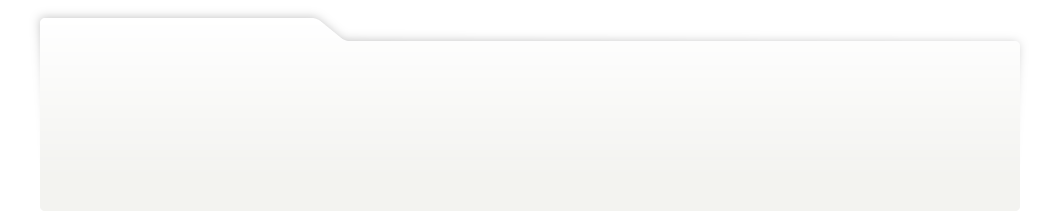
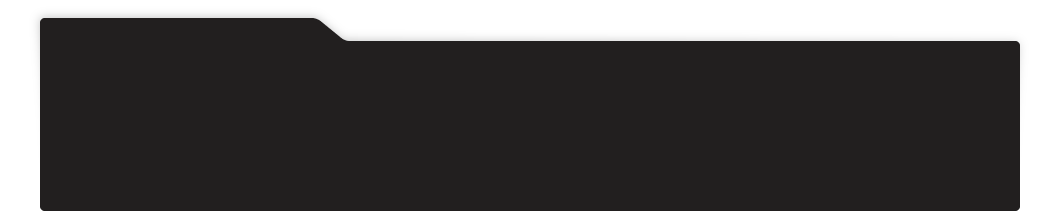
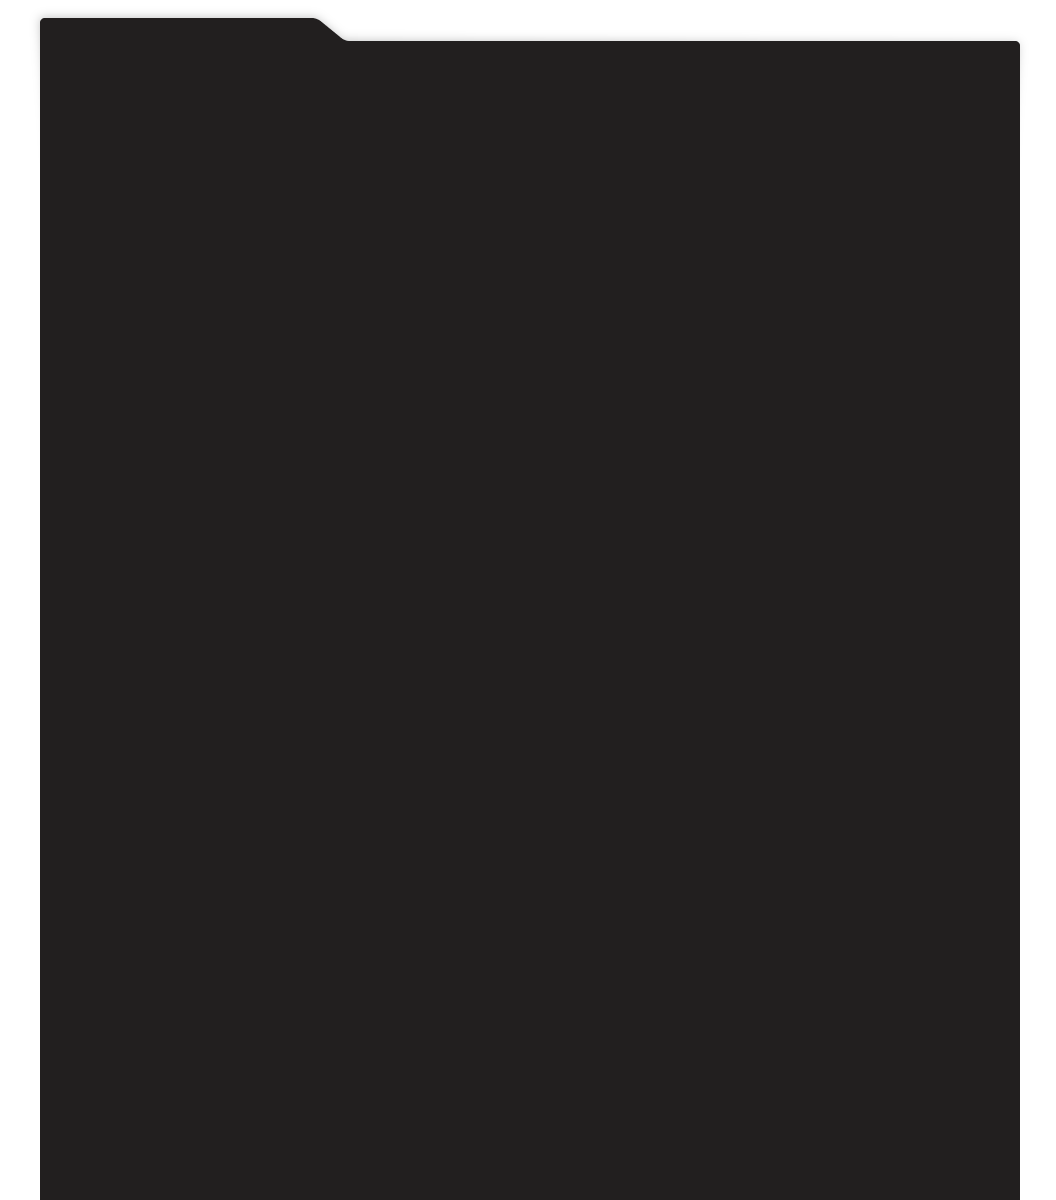
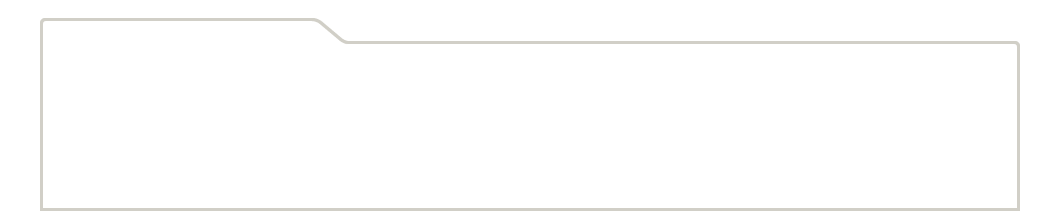
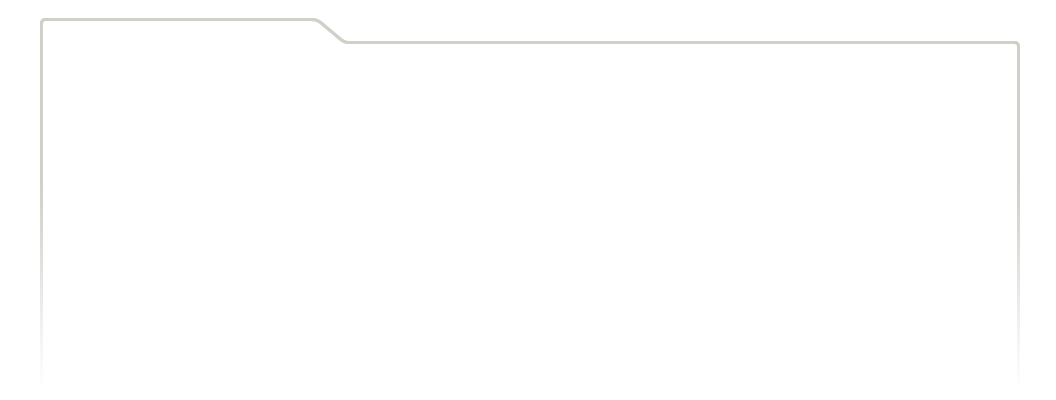
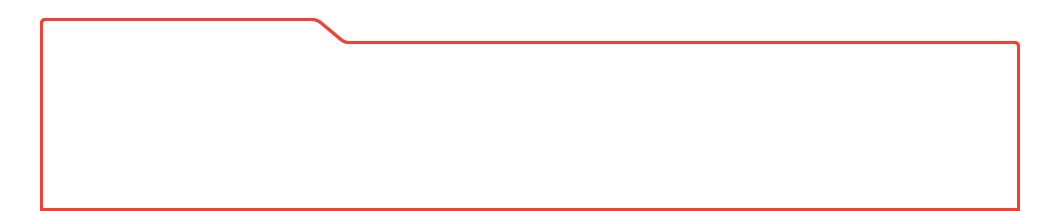
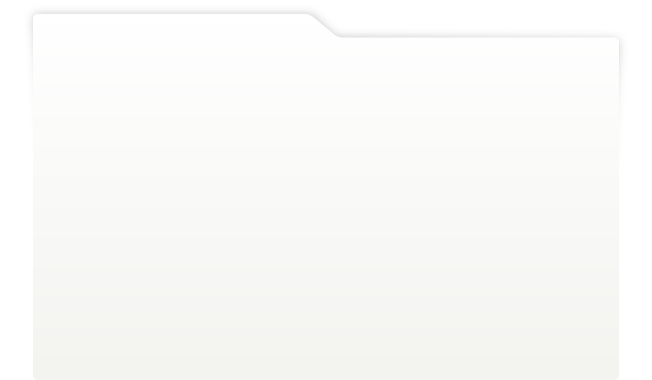
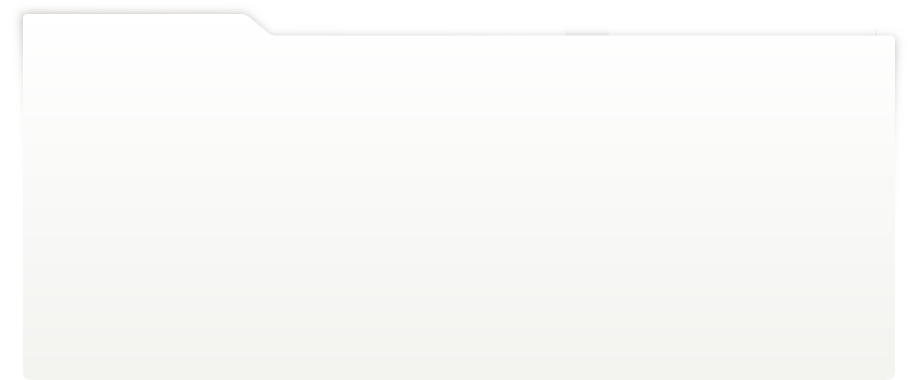
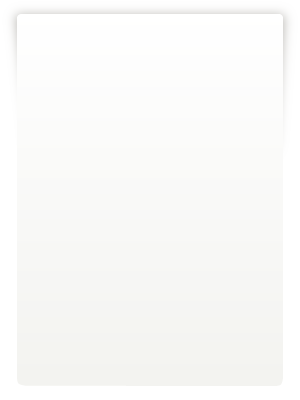
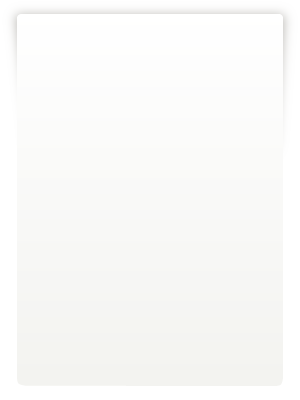
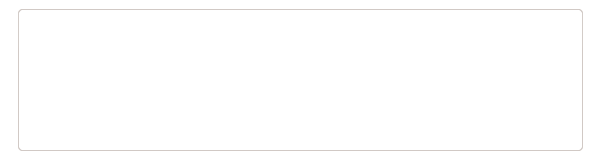
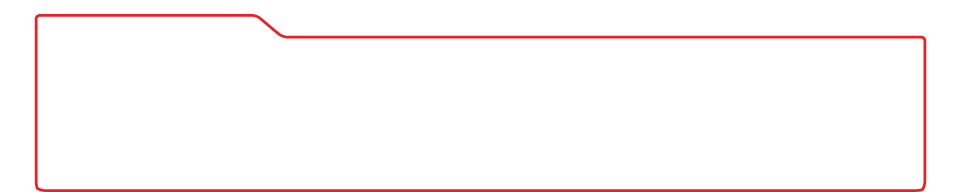
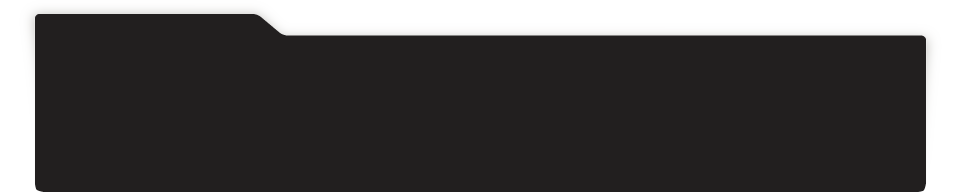
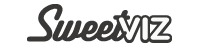
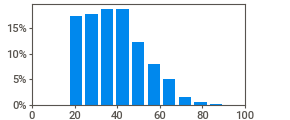
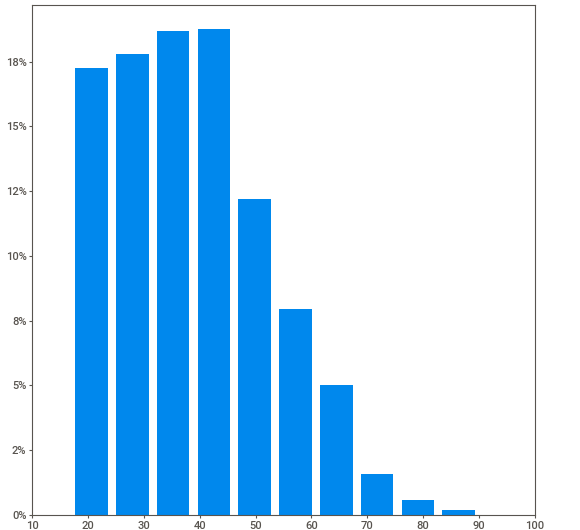
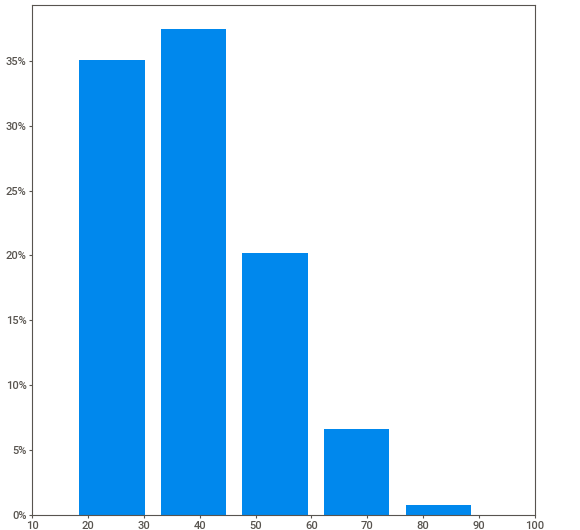
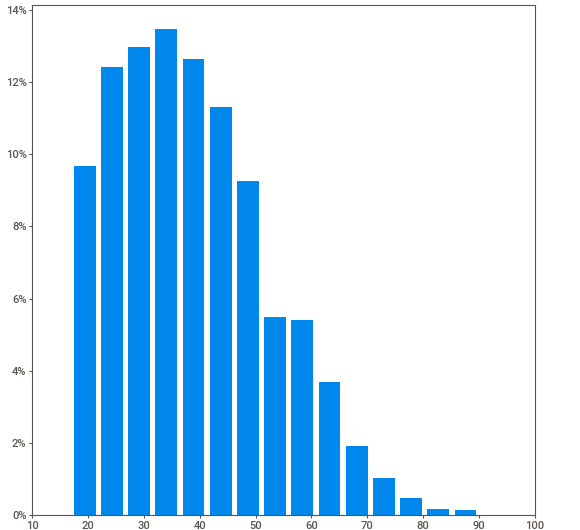
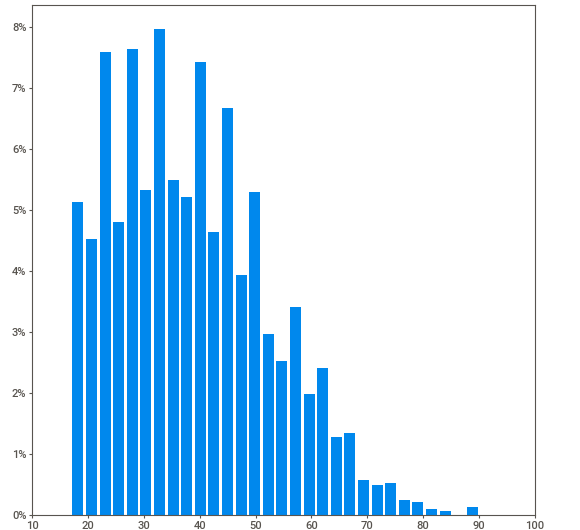
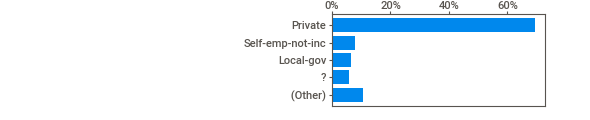
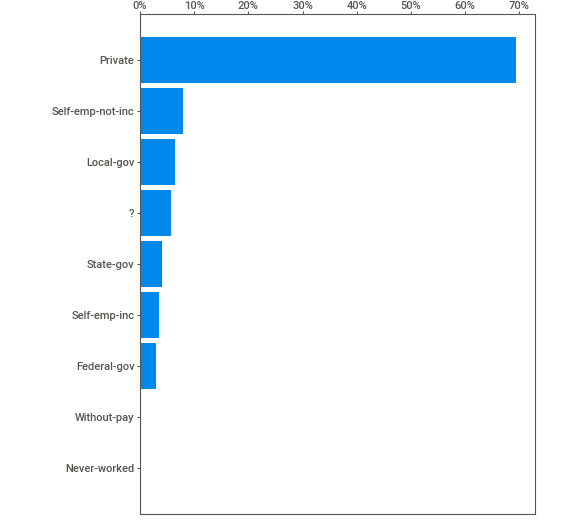
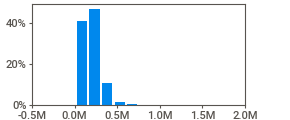
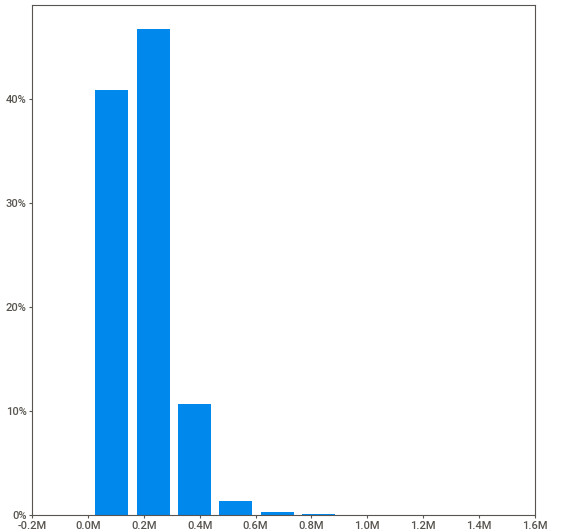
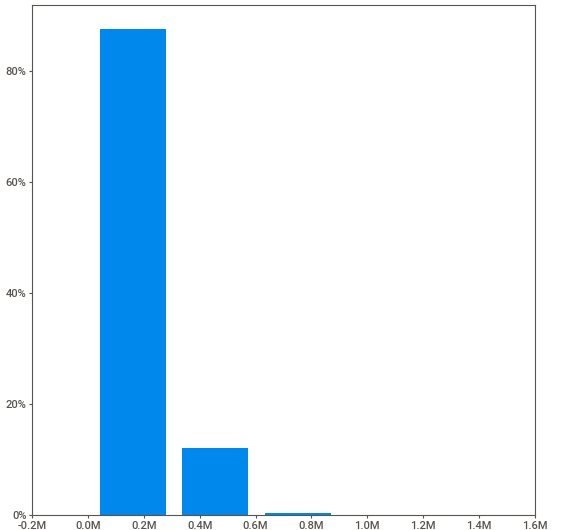
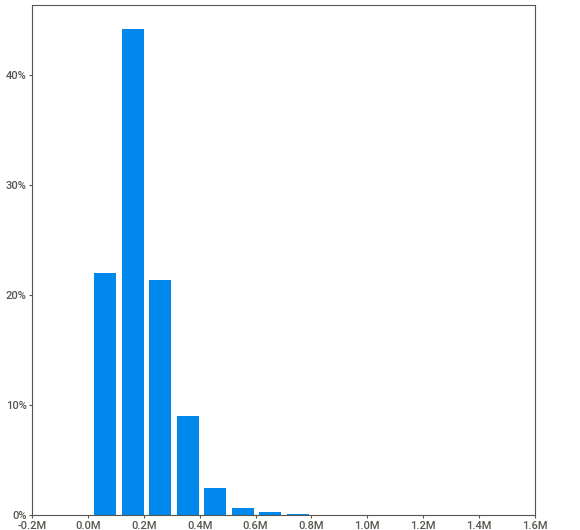
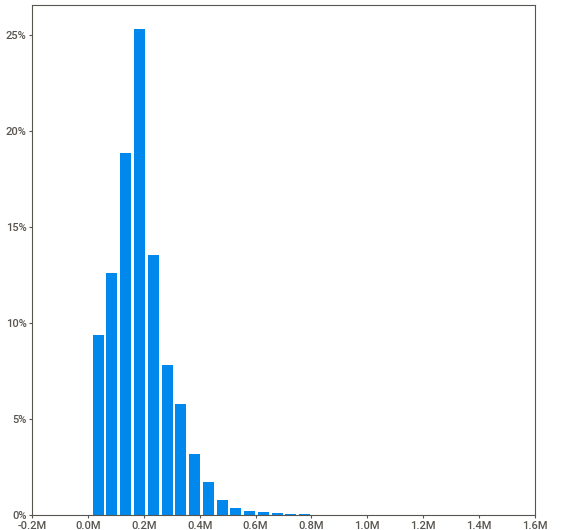
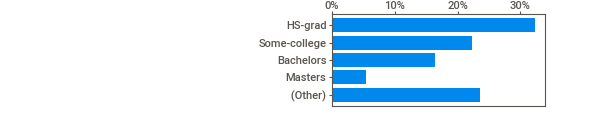
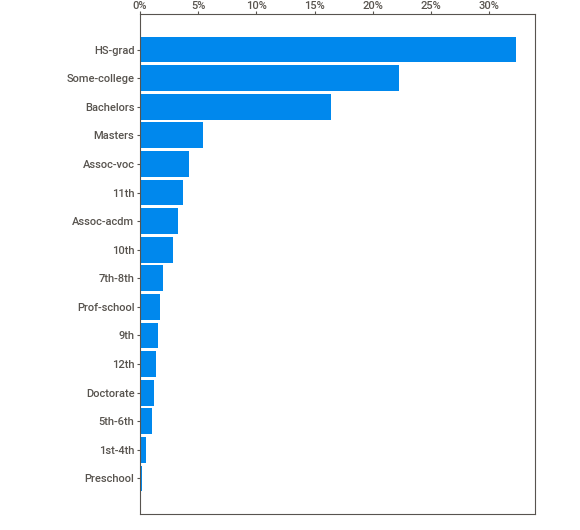
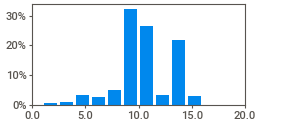
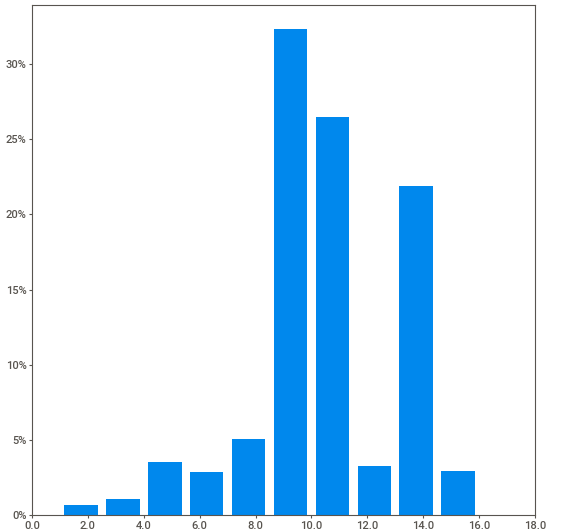
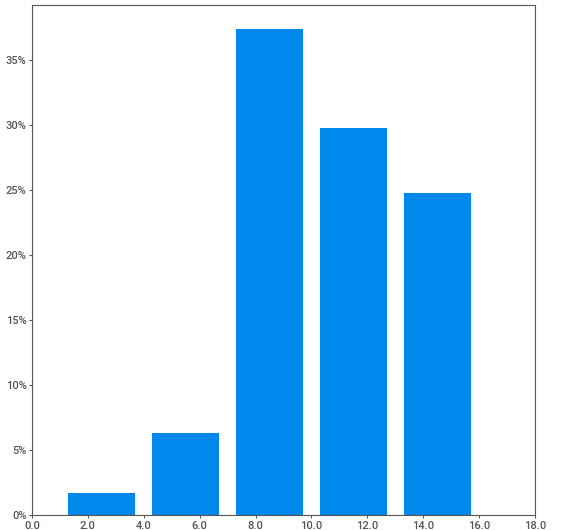
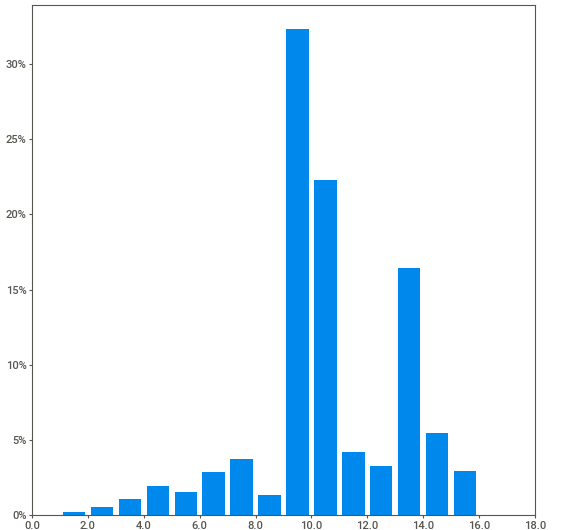
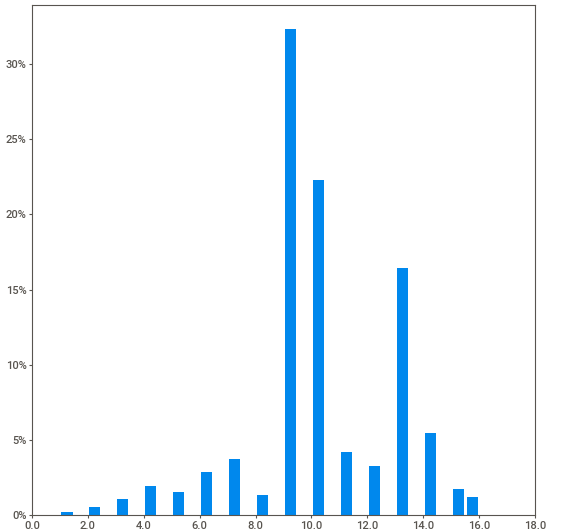
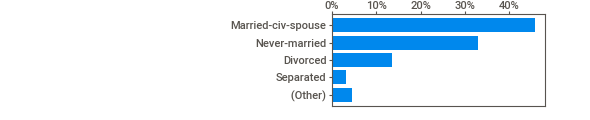
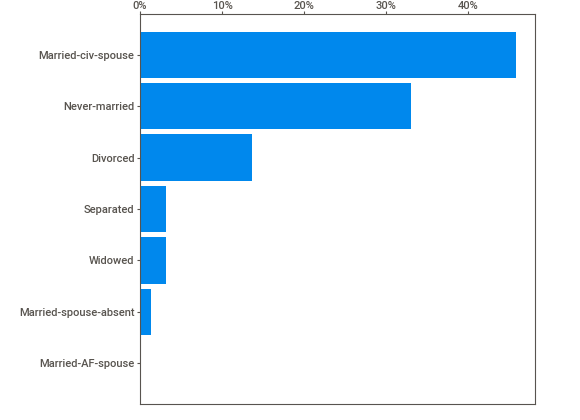
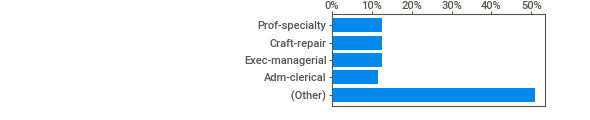
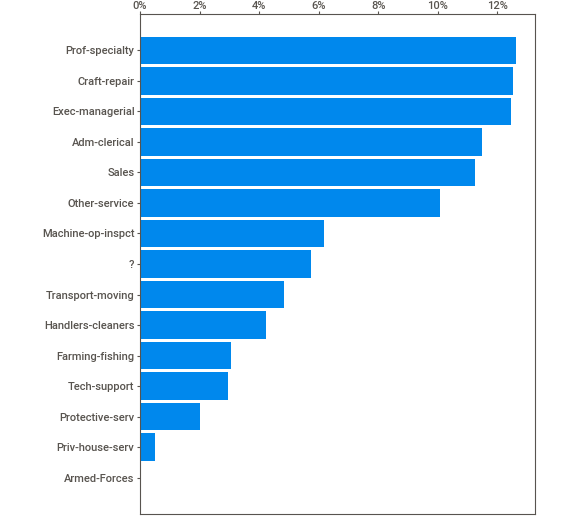
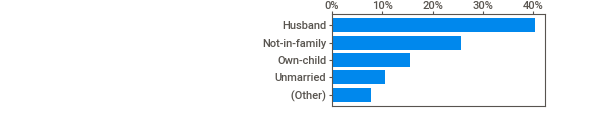
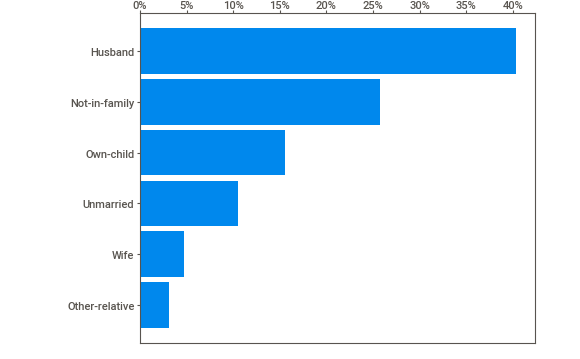
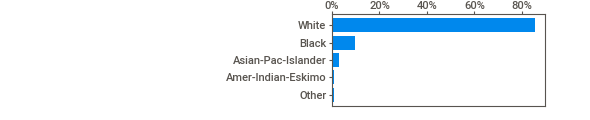
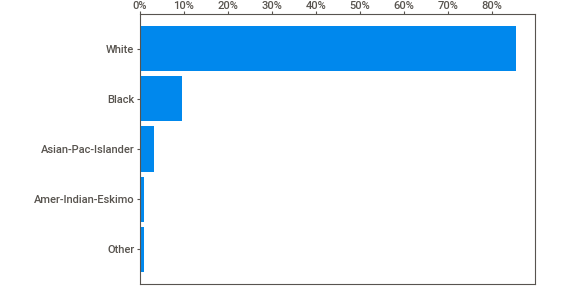
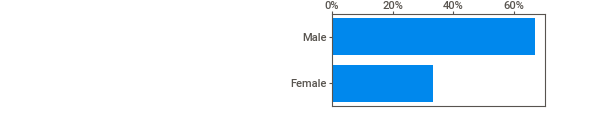
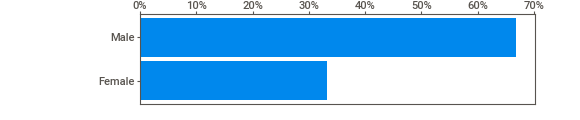
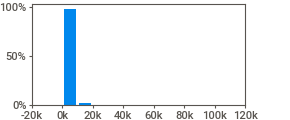
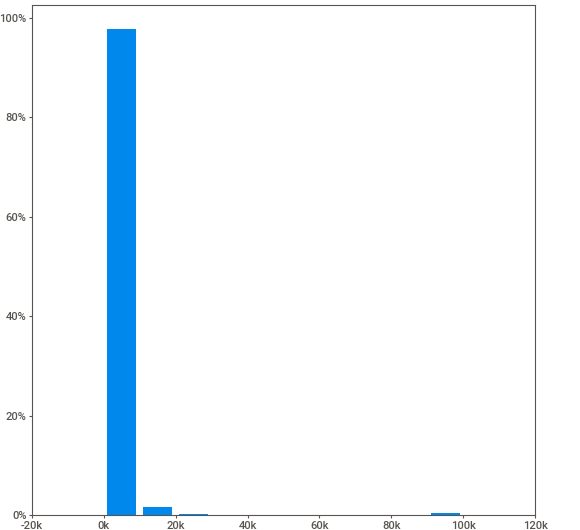
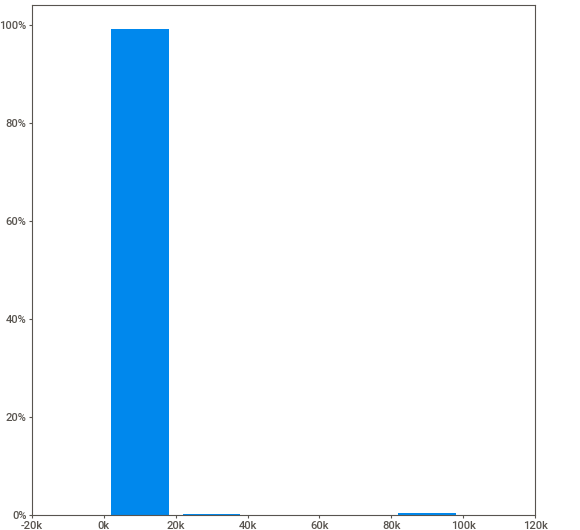
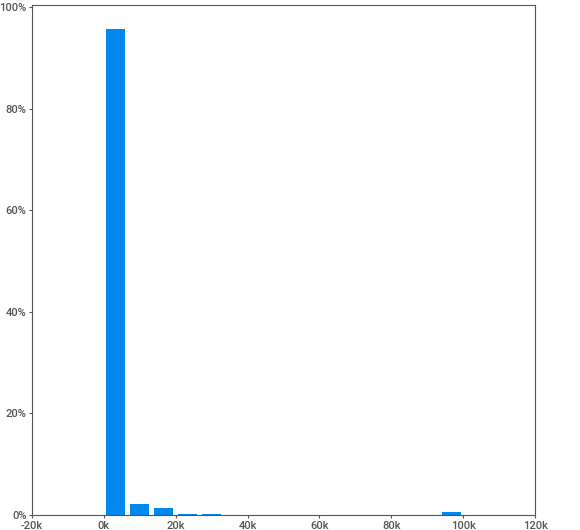
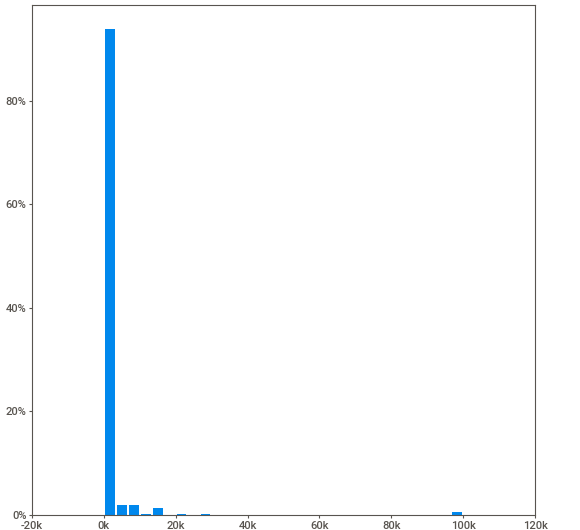
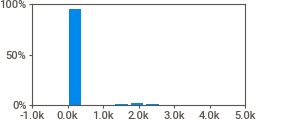
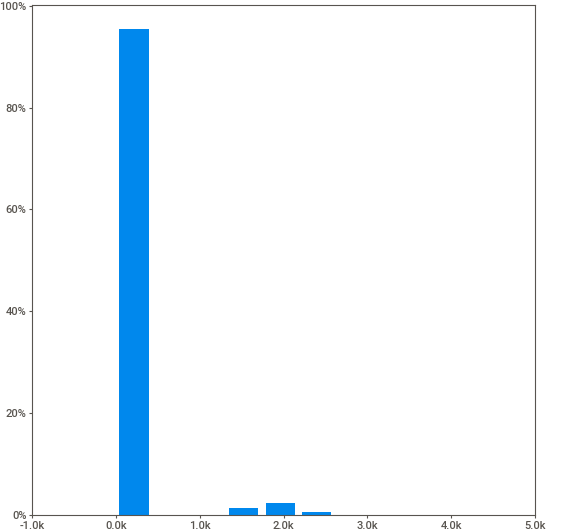
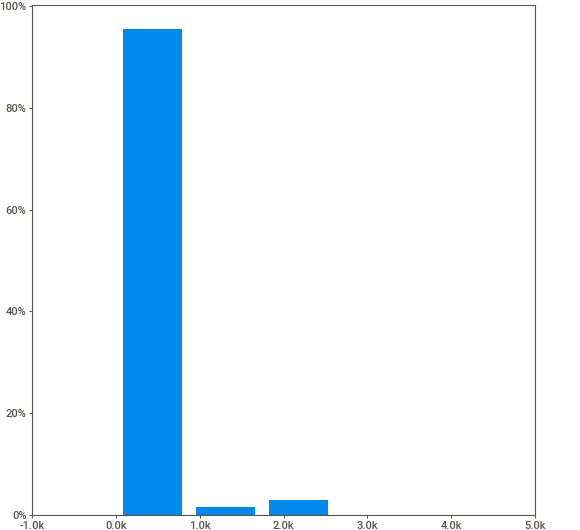
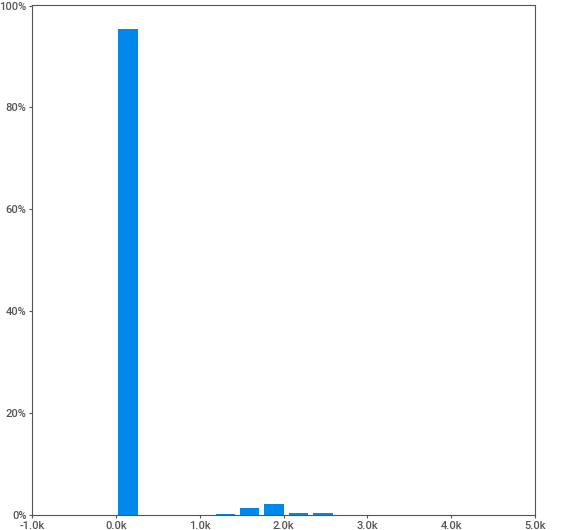
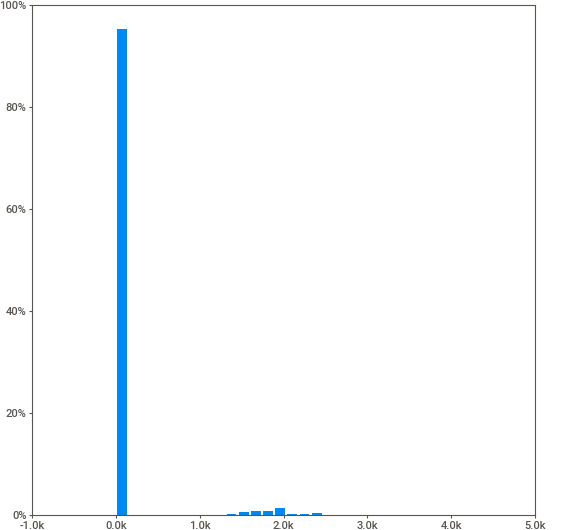
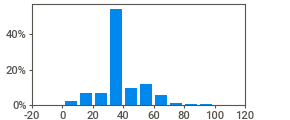
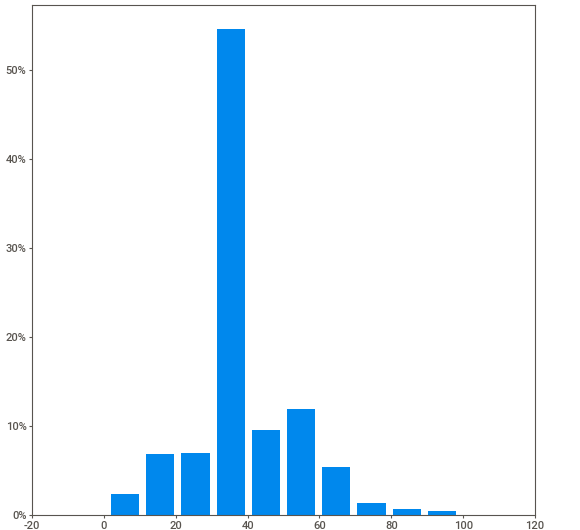
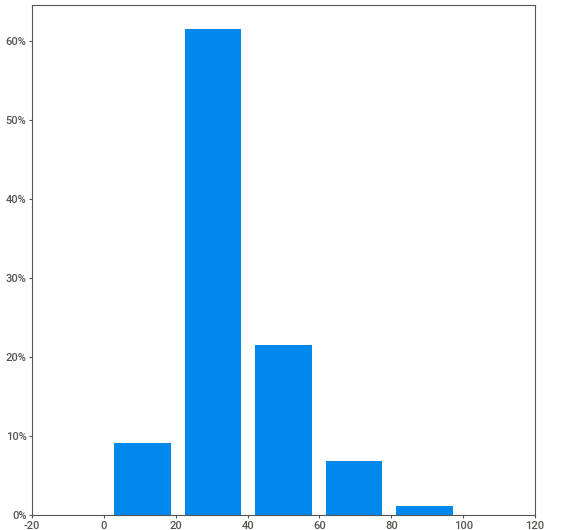
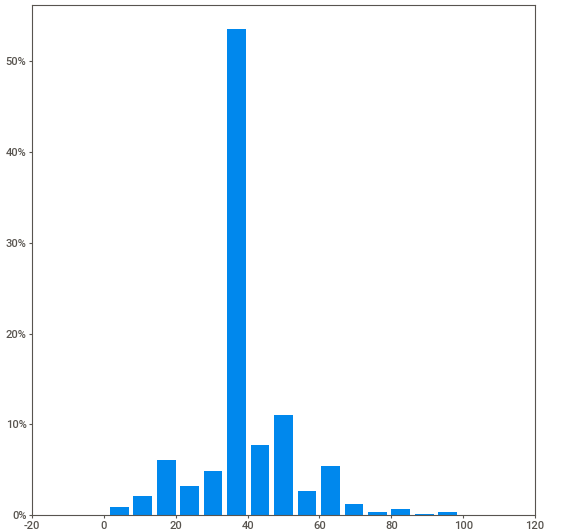
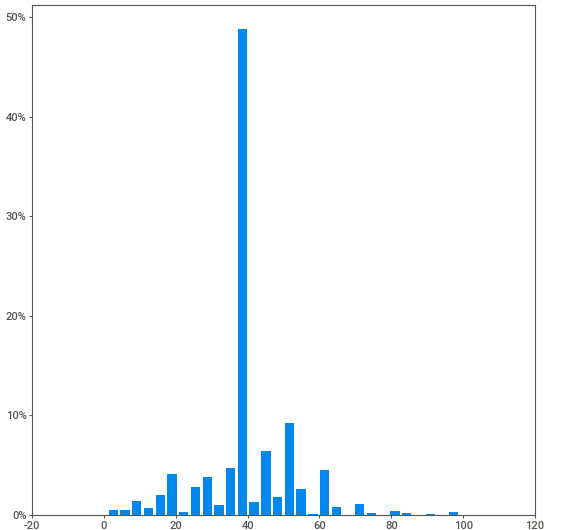
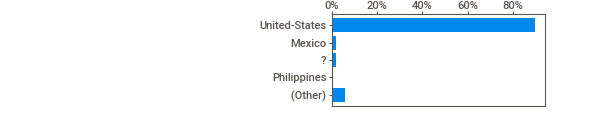
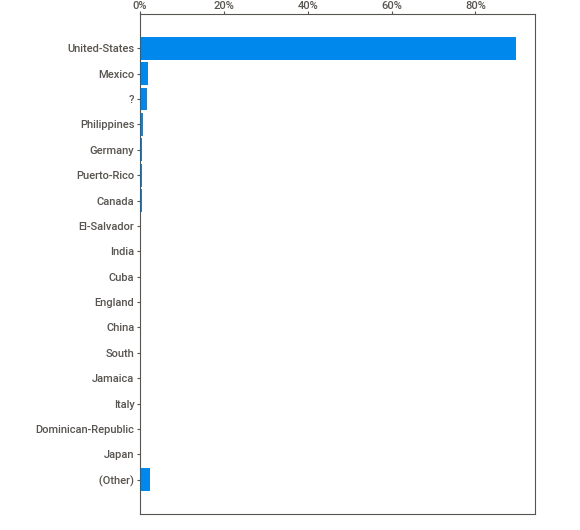
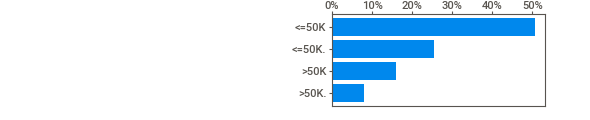
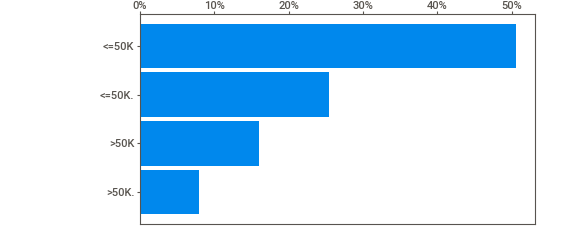
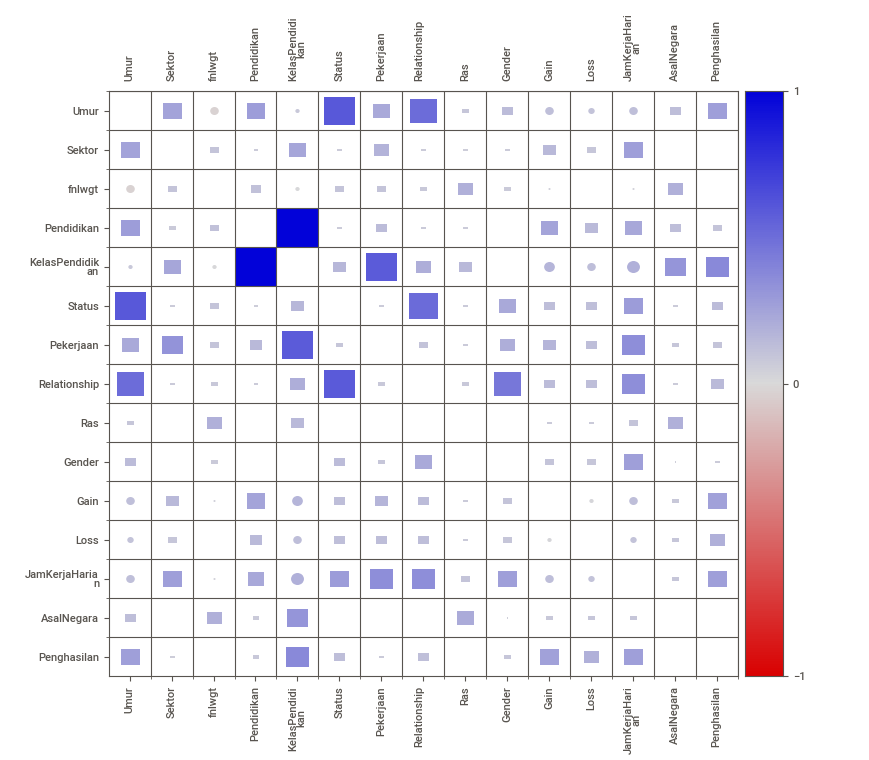
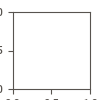

In [ ]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([df, 'laporan data penghasilan'])
report.show_notebook()
report

### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 01: Data Understanding dan Seleksi Fitur Pertama </font></strong></h1></center>

1. Data di atas memuat sebanyak 48842 baris dan 15 kolom atau jumlah variabel.
2. Berdasarkan info pada data, saya mengubah beberapa fitur bertipe "object" yang tidak sesuai, diubah menjadi tipe data "category".
3. Setelah diperiksa dan diseleksi berdasarkan business understanding/domain knowledge ada variabel/fitur yang tidak relevan/tidak informatif. Maka fitur tersebut dihapus (drop).
4. Variabel/fitur "fnlwgt" tidak ada keterangan di sumber data, saya asumsikan variabel ini bermanfaat, namun di dunia nyata akan saya tanyakan dan konfirmasi terlebih dahulu ke atasan, database administrator/data engineer.

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise </font></strong></h1></center>

1. Check via Deskriptif Statistik

In [ ]:
df.describe()

Umur        fnlwgt  KelasPendidikan          Gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

               Loss  JamKerjaHarian  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise di Variabel Numerik</font></strong></h1></center>

In [ ]:
print(df.columns)


Index(['Umur', 'Sektor', 'fnlwgt', 'Pendidikan', 'KelasPendidikan', 'Status',
       'Pekerjaan', 'Relationship', 'Ras', 'Gender', 'Gain', 'Loss',
       'JamKerjaHarian', 'AsalNegara', 'Penghasilan'],
      dtype='object')


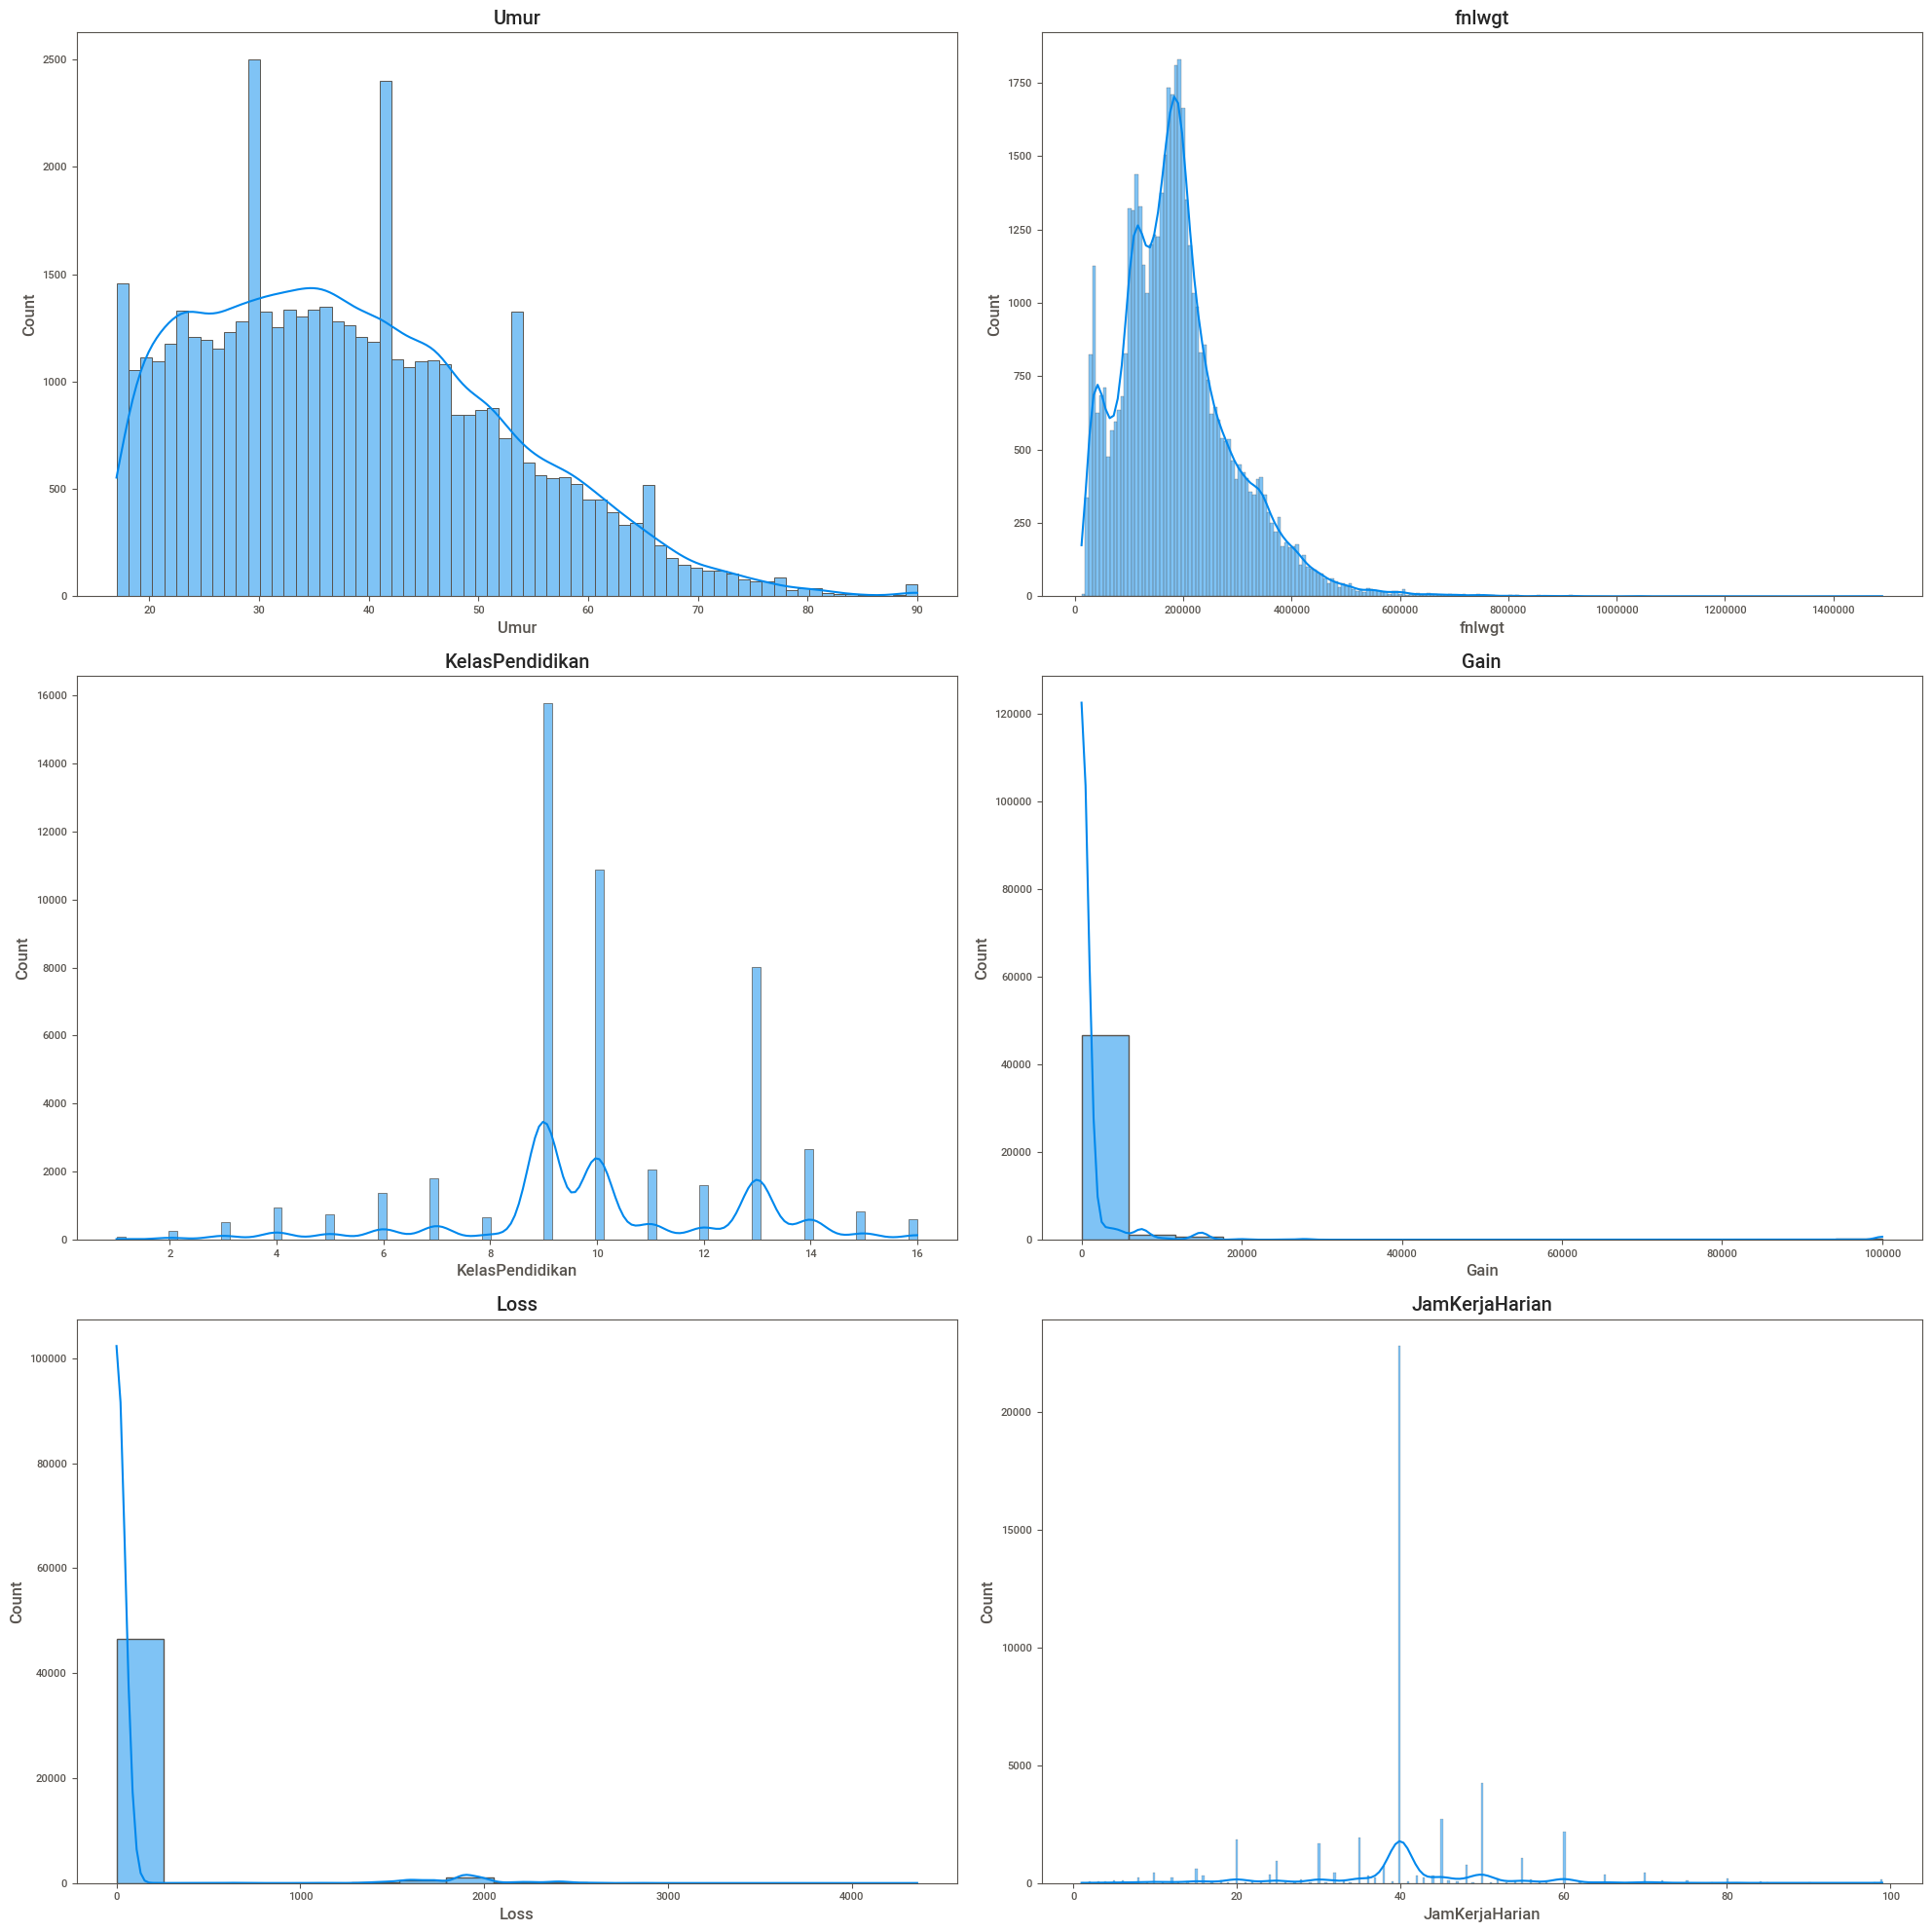

               Umur        fnlwgt  KelasPendidikan          Gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

               Loss  JamKerjaHarian  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [ ]:
# Create a figure and a 3x2 grid of axes
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

#create hitsplot untuk variabel numerik
sns.histplot(data=df, x='Umur', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Umur')
sns.histplot(data=df, x='fnlwgt', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('fnlwgt')
sns.histplot(data=df, x='KelasPendidikan', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('KelasPendidikan')
sns.histplot(data=df, x='Gain', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Gain')
sns.histplot(data=df, x='Loss', kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Loss')
sns.histplot(data=df, x='JamKerjaHarian', kde=True, ax=axs[2, 1])
axs[2, 1].set_title('JamKerjaHarian')

plt.tight_layout()
plt.show()

# Print the descriptive statistics
print(df[['Umur', 'fnlwgt', 'KelasPendidikan', 'Gain', 'Loss', 'JamKerjaHarian']].describe())


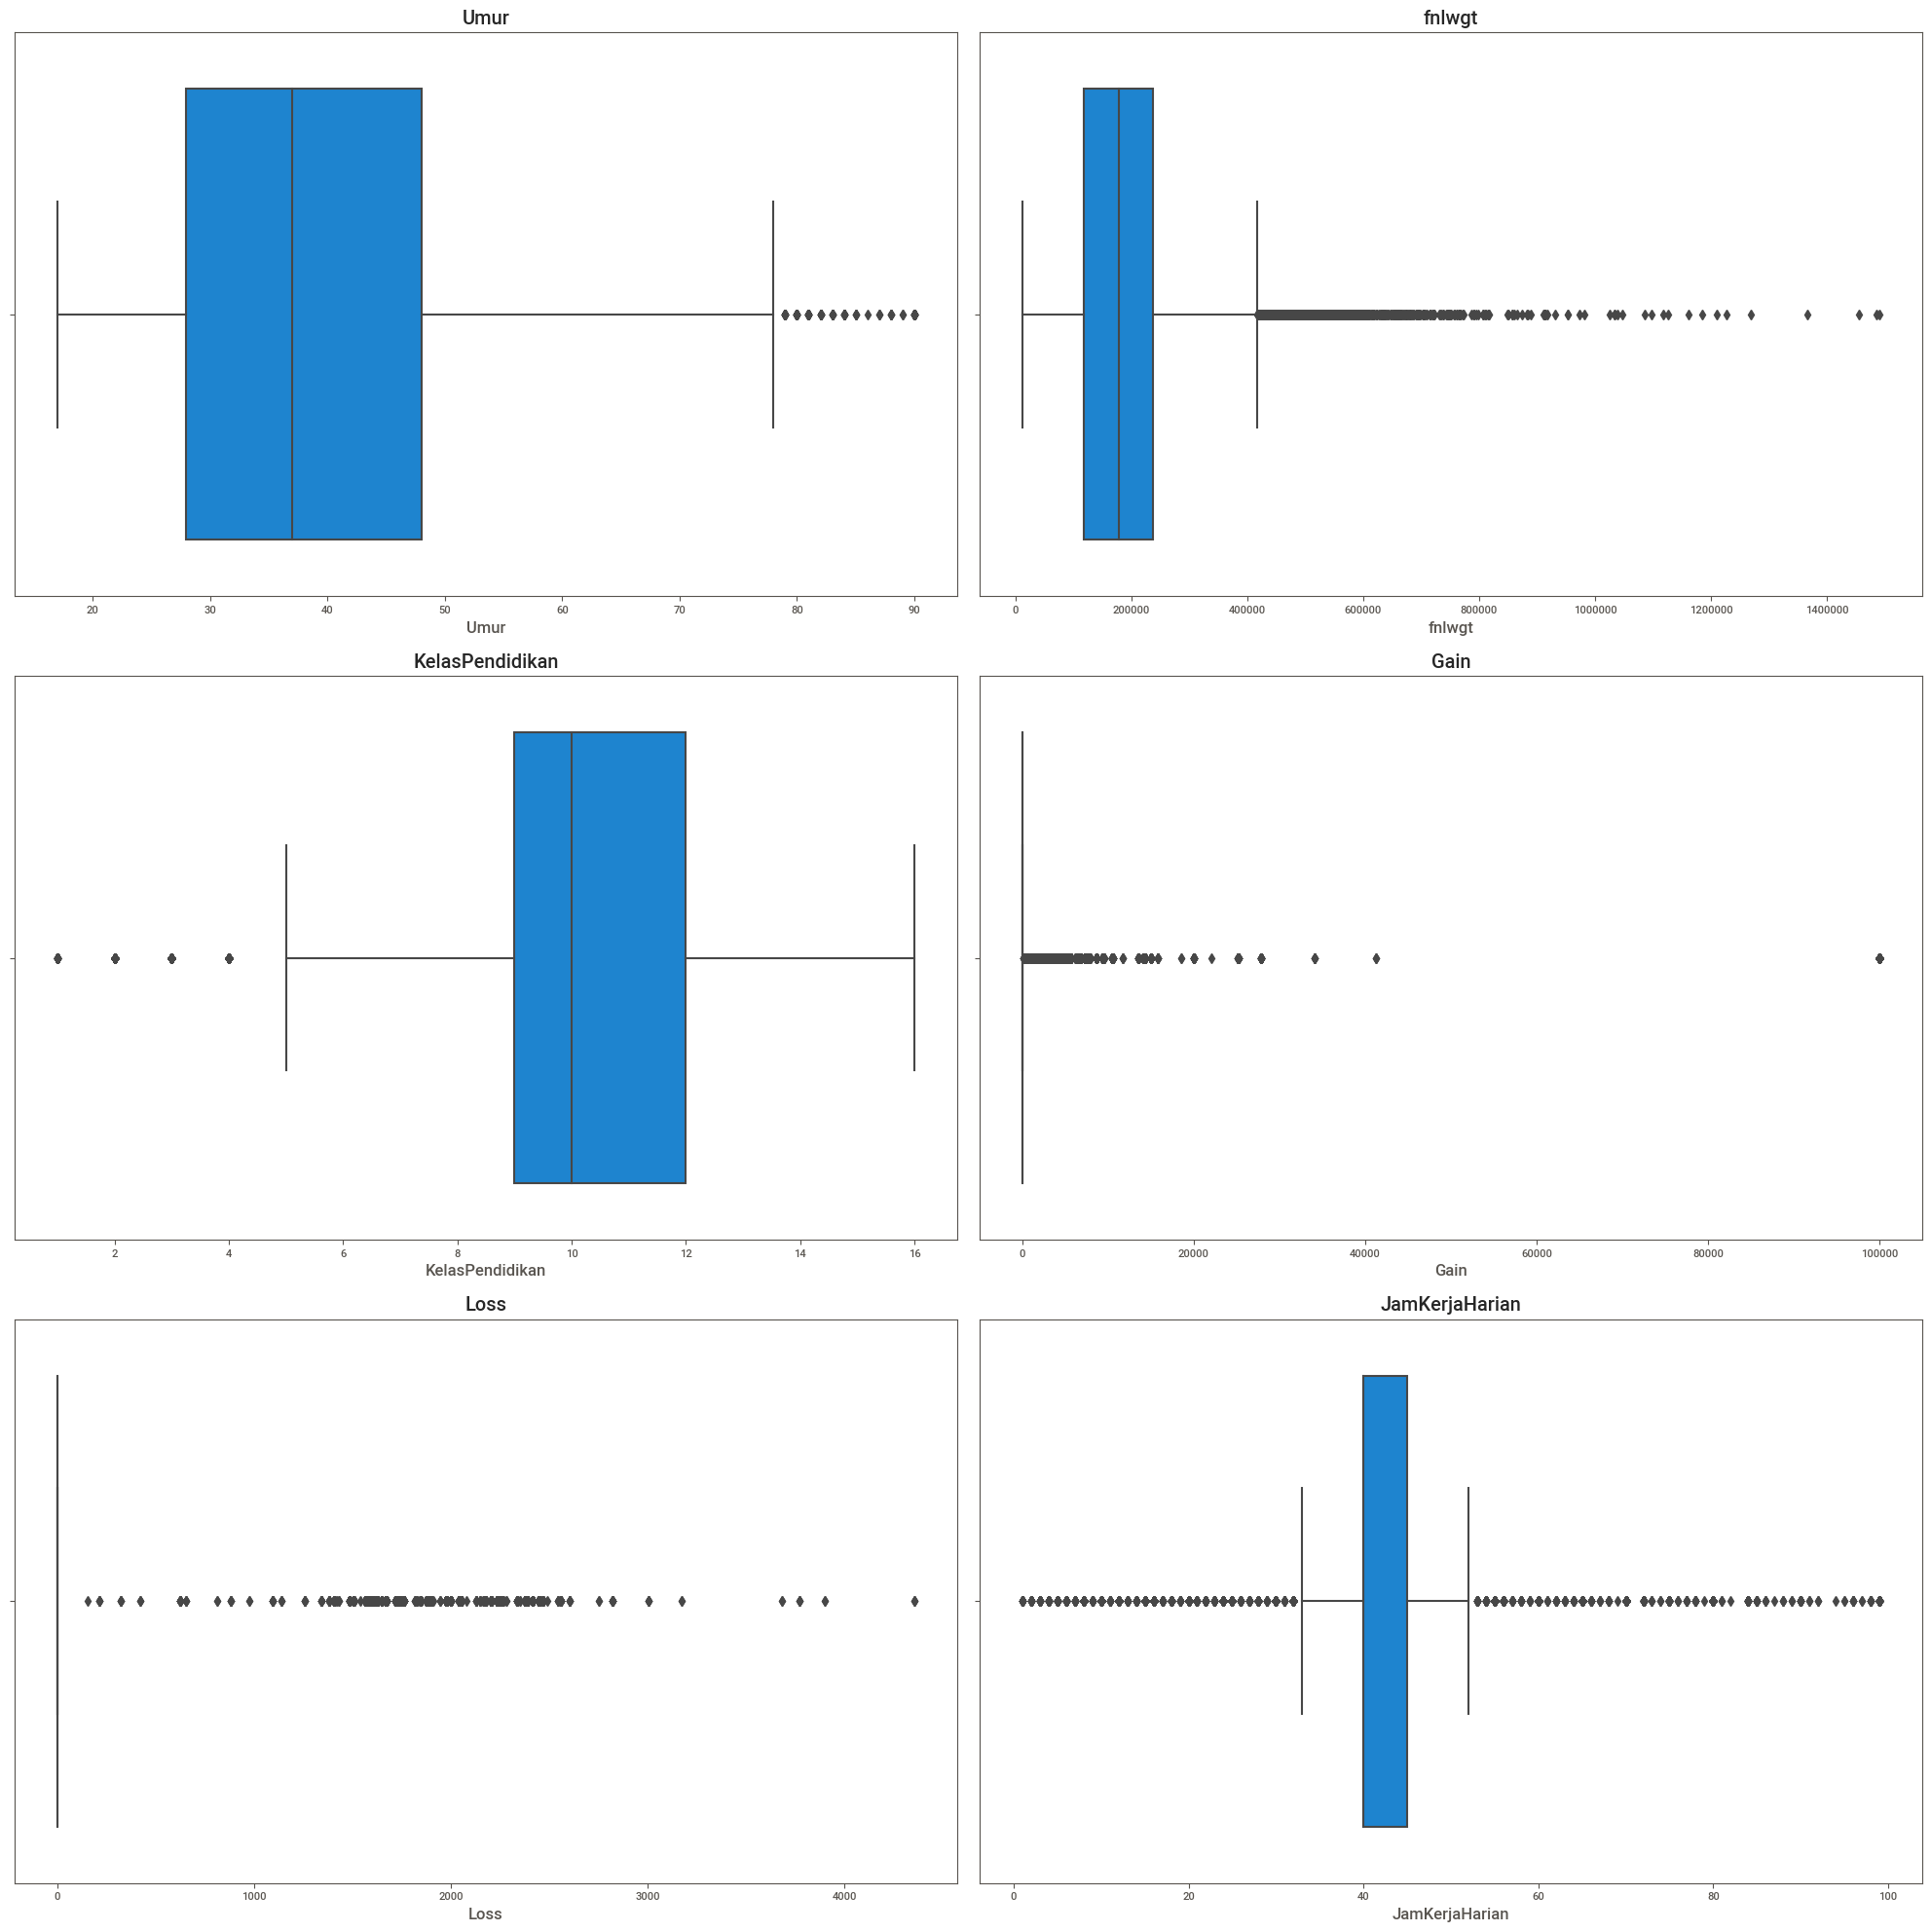

               Umur        fnlwgt  KelasPendidikan          Gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

               Loss  JamKerjaHarian  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dapatkan variabel numerik
variabel_numerik = df.select_dtypes(include='number').columns

# Create a figure and a grid of axes
fig, axs = plt.subplots(len(variabel_numerik) // 2, 2, figsize=(20, 20))

# Create boxplots for each numeric variable
for i, var in enumerate(variabel_numerik):
    sns.boxplot(data=df, x=var, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(var)

plt.tight_layout()
plt.show()

# Print the descriptive statistics
print(df[variabel_numerik].describe())


In [ ]:
#karena terdapat noise
try:
    df.drop(df[df['Gain'] == 99999.000000].index, inplace=True)
except Exception as err_:
    print(err_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.describe()

baris =  48598 , Kolom (jumlah variabel) =  15


Umur        fnlwgt  KelasPendidikan          Gain  \
count  48598.000000  4.859800e+04     48598.000000  48598.000000   
mean      38.603585  1.896848e+05        10.063295    582.412136   
std       13.712447  1.056303e+05         2.562932   2536.651465   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.782150e+05        10.000000      0.000000   
75%       48.000000  2.377130e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  41310.000000   

               Loss  JamKerjaHarian  
count  48598.000000    48598.000000  
mean      87.941644       40.371908  
std      403.967187       12.369769  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 02: Check Noise di Variabel kategorik</font></strong></h1></center>


In [ ]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-not-inc', 'State-gov', 'Never-worked', 'Self-emp-inc', 'Local-gov', 'Federal-gov', '?', 'Without-pay', 'Private'}
Pendidikan :  {'Prof-school', '12th', 'Some-college', 'HS-grad', 'Masters', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Preschool', '1st-4th', 'Bachelors', '10th', '11th', '5th-6th', '9th'}
Status :  {'Widowed', 'Separated', 'Never-married', 'Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse', 'Divorced'}
Pekerjaan :  {'Sales', 'Tech-support', 'Other-service', 'Machine-op-inspct', 'Priv-house-serv', 'Adm-clerical', 'Exec-managerial', 'Armed-Forces', 'Farming-fishing', 'Handlers-cleaners', 'Transport-moving', 'Craft-repair', 'Protective-serv', '?', 'Prof-specialty'}
Relationship :  {'Unmarried', 'Own-child', 'Husband', 'Other-relative', 'Wife', 'Not-in-family'}
Ras :  {'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'White'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'China', 'Laos', 'India', 'Portugal', '?', 'Italy'

<center><h1><strong><font color="red">Lihat Ada Noise?</font></strong></h1></center>

In [ ]:
import numpy as np

df['Penghasilan'] = df['Penghasilan'].replace(to_replace=">50K.", value=">50K")
df['Penghasilan'] = df['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
df['Sektor'] = df['Sektor'].replace(to_replace="?", value=np.nan)
df['Pekerjaan'] = df['Pekerjaan'].replace(to_replace="?", value=np.nan)
df['AsalNegara'] = df['AsalNegara'].replace(to_replace="?", value=np.nan)

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Self-emp-not-inc', nan, 'State-gov', 'Never-worked', 'Self-emp-inc', 'Local-gov', 'Federal-gov', 'Without-pay', 'Private'}
Pendidikan :  {'Prof-school', '12th', 'Some-college', 'HS-grad', 'Masters', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Preschool', '1st-4th', 'Bachelors', '10th', '11th', '5th-6th', '9th'}
Status :  {'Widowed', 'Separated', 'Never-married', 'Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse', 'Divorced'}
Pekerjaan :  {'Sales', 'Tech-support', 'Other-service', 'Machine-op-inspct', nan, 'Priv-house-serv', 'Adm-clerical', 'Exec-managerial', 'Armed-Forces', 'Farming-fishing', 'Handlers-cleaners', 'Transport-moving', 'Craft-repair', 'Protective-serv', 'Prof-specialty'}
Relationship :  {'Unmarried', 'Own-child', 'Husband', 'Other-relative', 'Wife', 'Not-in-family'}
Ras :  {'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'White'}
Gender :  {'Female', 'Male'}
AsalNegara :  {'China', 'Laos', nan, 'India', 'Portugal', 'Italy'

### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 02: Check Noise </font></strong></h1></center>

1.  Check Noise berdasarkan Deskriptif Statistik untuk setiap variabel numerik, diperoleh bahwa tidak ada noise yang terlihat karena "count/jumlah" sesuai dengan data awal, lalu "minimum" dan "maksimum" nilainya positif dan sesuai dengan domain knowledge.
2. Check Noise berdasarkan visualisasi untuk setiap variabel numerik, pada tahap ini diperoleh bahwa untuk variabel "gain" diduga dan saya **asumsikan** sebagai noise dengan nilai 99999.000000 , maka saya hapus, namun untuk validasi di dunia industri akan saya konfirmasi terlebih dahulu ke atasan terkait data ini.
3.  Check Noise berdasarkan code seleksi variabel untuk setiap variabel kategorik ketika diperhatikan setiap barisnya dengan data understanding, diperoleh bahwa pada variabel "penghasilan" terdapat noise kata yg tidak beraturan, maka direplace agar sesuai dengan kaidah bahasa, sementara untuk variabel "sektor", "pekerjaan", dan "asal negara" terdapat noise tanda baca yang random dan direplace menjadi 'nan' di python.

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 03: Memeriksa Duplikasi</font></strong></h1></center>
# <center><h2><font color="red">Removing Duplicate Data</font></h2></center>


In [ ]:
# Cek duplikasi data
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()

(48598, 15)
jumlah data yang duplikat 52


Umur   Sektor  fnlwgt    Pendidikan  KelasPendidikan         Status  \
4881     25  Private  308144     Bachelors               13  Never-married   
5104     90  Private   52386  Some-college               10  Never-married   
9171     21  Private  250051  Some-college               10  Never-married   
11631    20  Private  107658  Some-college               10  Never-married   
13084    25  Private  195994       1st-4th                2  Never-married   

             Pekerjaan   Relationship                 Ras  Gender  Gain  Loss  \
4881      Craft-repair  Not-in-family               White    Male     0     0   
5104     Other-service  Not-in-family  Asian-Pac-Islander    Male     0     0   
9171    Prof-specialty      Own-child               White  Female     0     0   
11631     Tech-support  Not-in-family               White  Female     0     0   
13084  Priv-house-serv  Not-in-family               White  Female     0     0   

       JamKerjaHarian     AsalNegara Penghasilan  
4881               40         Mexico       <=50K  
5104               35  United-States       <=50K  
9171               10  United-States       <=50K  
11631              10  United-States       <=50K  
13084              40      Guatemala       <=50K

In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print("jumlah data yang duplikat", df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

jumlah data yang duplikat 0
(48546, 15)


### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 03: Memeriksa Duplikasi </font></strong></h1></center>

Pada data ditemukan jumlah yang duplikat adalah 52 data, maka dihapus (drop), sehingga data memiliki 48546 dan 15 kolom.

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate)</font></strong></h1></center>

1. Distribusi Variabel kategorik
2. Distribusi Variabel Numerik

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate - kategorik)

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

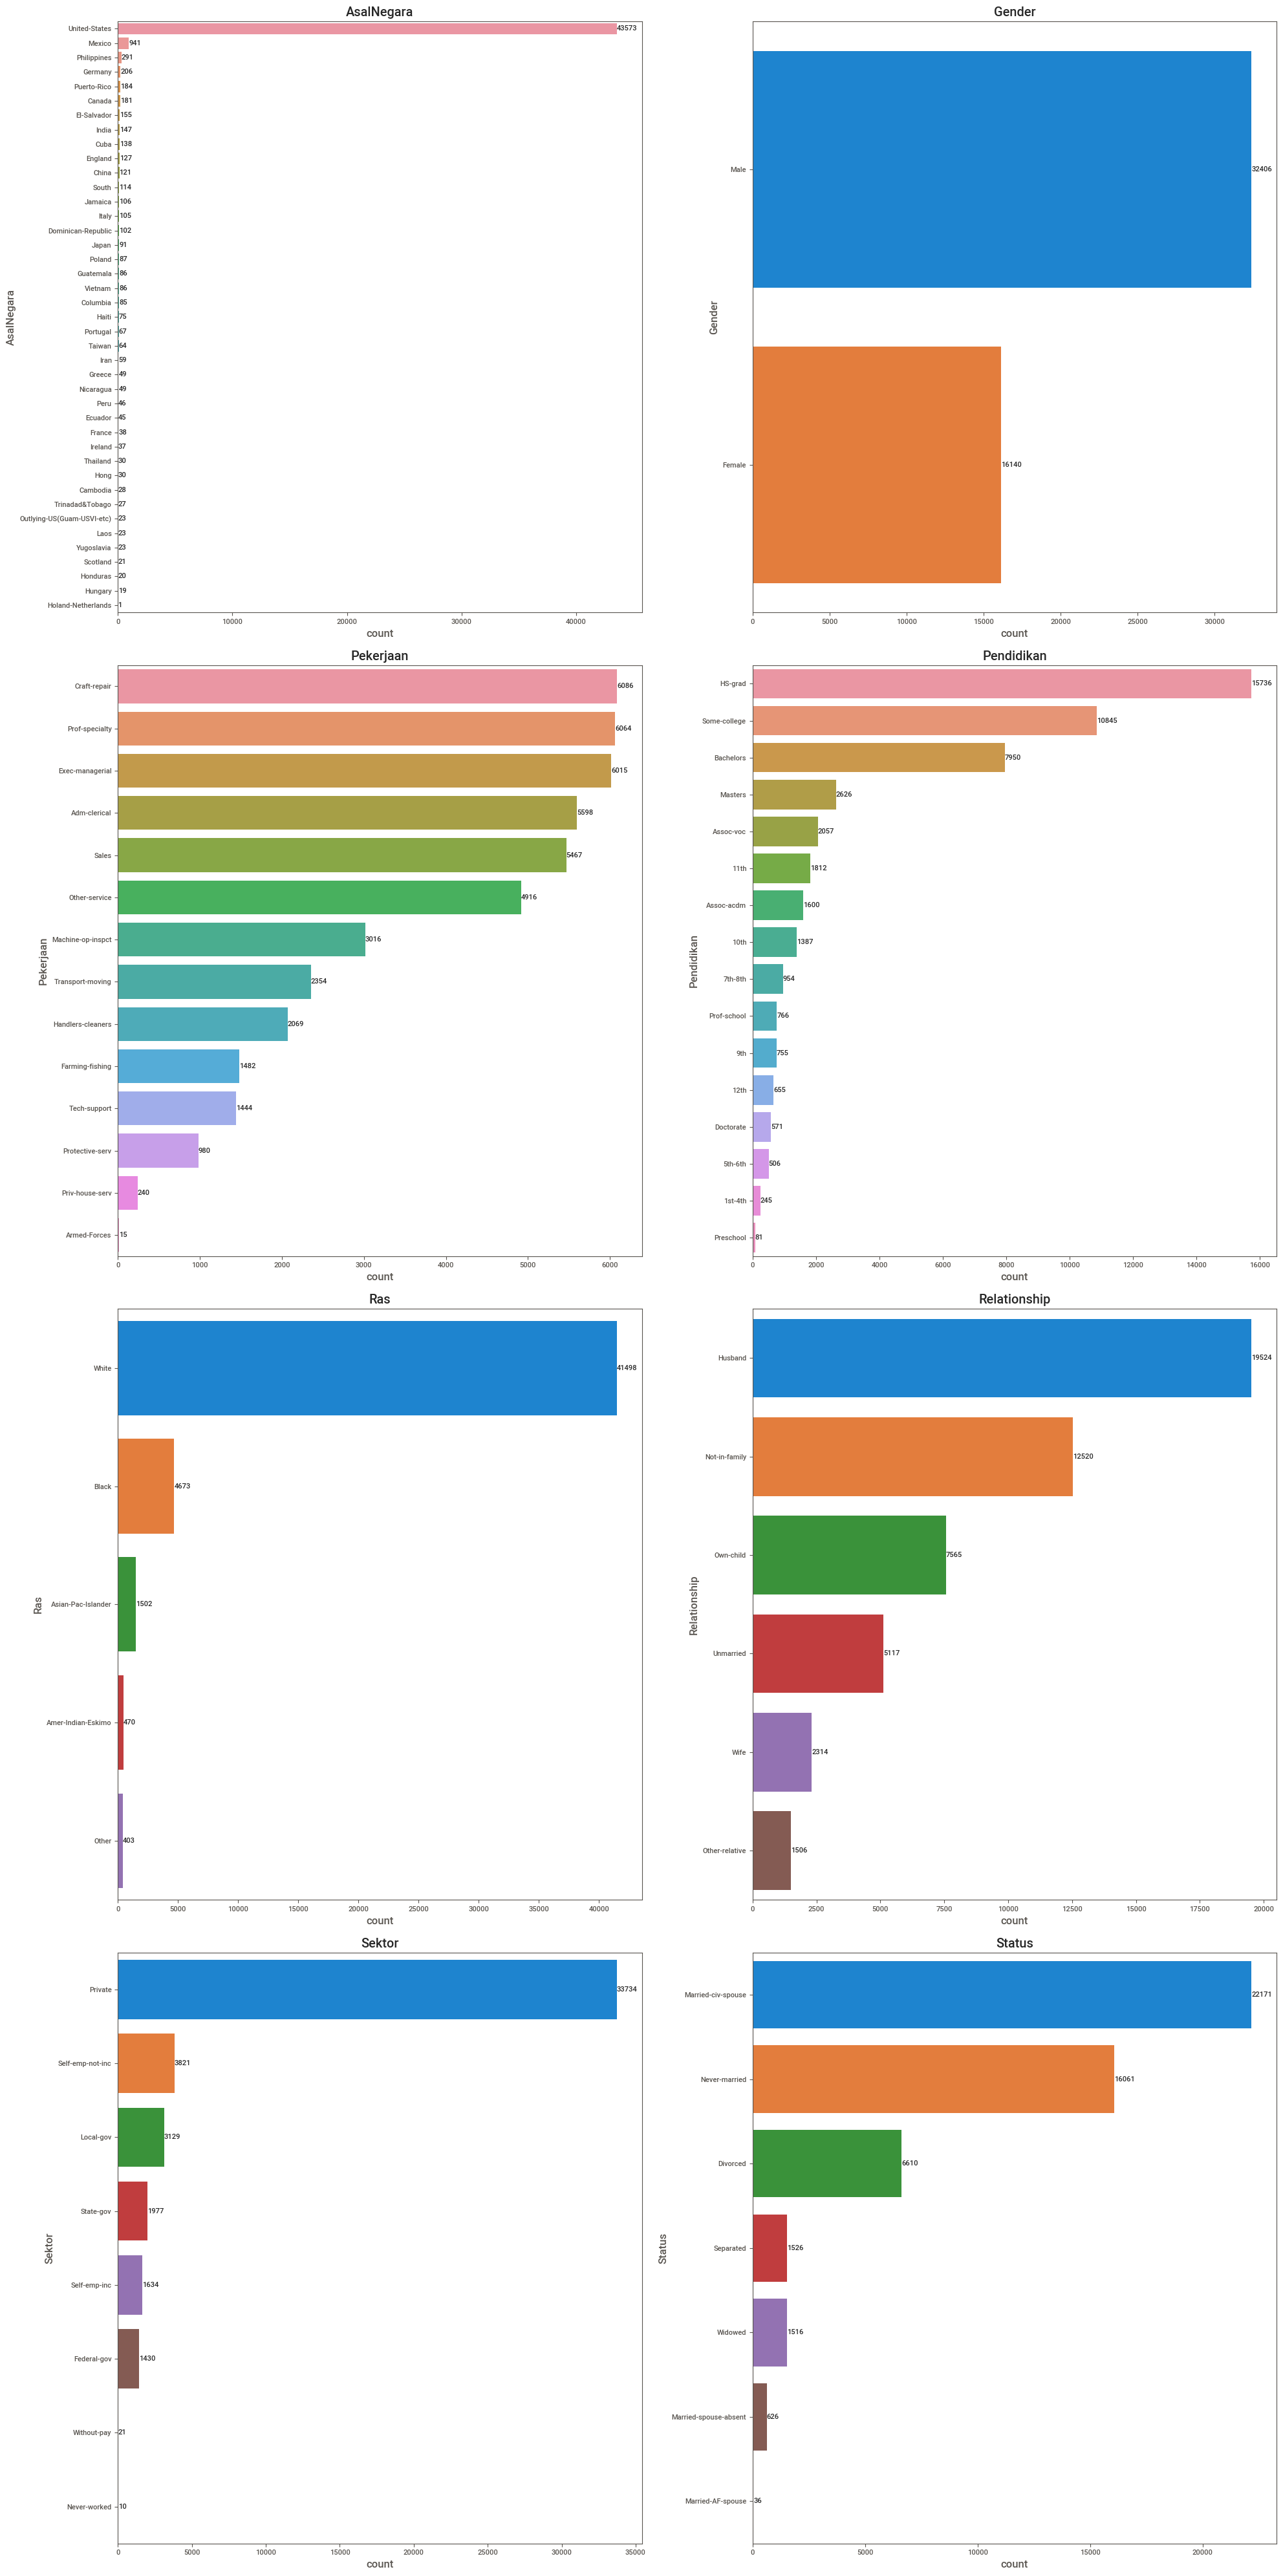

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dapatkan variabel kategorikal kecuali 'Penghasilan'
cat_vars = df.select_dtypes(include='category').columns.difference(['Penghasilan'])

# Buat figure dan grid sumbu
fig, axs = plt.subplots(len(cat_vars)//2 + len(cat_vars)%2, 2, figsize=(20, 40))

# Buat countplot untuk setiap variabel kategorikal
for i, var in enumerate(cat_vars):
    sns.countplot(data=df, y=var, order=df[var].value_counts(ascending=False).index, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(var)

    # Tambahkan nilai count di atas setiap bar
    for bar in axs[i//2, i%2].patches:
        axs[i//2, i%2].text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


<center><h1><strong><font color="red">Apa yang akan anda lakukan pada kelas minoritas pada contoh diatas?</font></strong></h1></center>

In [ ]:
#hasil dari memisahkan 2 yg minoritas. cari apaa mendapatkan insight yg menarik?
minoritas = df[df["Sektor"].isin(["Without-pay","Never-worked"])]
minoritas.describe(include='all')

Umur       Sektor         fnlwgt Pendidikan  KelasPendidikan  \
count   31.000000           31      31.000000         31        31.000000   
unique        NaN            2            NaN          6              NaN   
top           NaN  Without-pay            NaN    HS-grad              NaN   
freq          NaN           21            NaN         16              NaN   
mean    38.451613          NaN  183106.096774        NaN         8.483871   
std     21.052060          NaN   93727.278012        NaN         1.997848   
min     17.000000          NaN   27012.000000        NaN         4.000000   
25%     19.000000          NaN  134392.500000        NaN         8.000000   
50%     29.000000          NaN  172949.000000        NaN         9.000000   
75%     62.000000          NaN  214294.500000        NaN         9.000000   
max     74.000000          NaN  462294.000000        NaN        12.000000   

                    Status        Pekerjaan Relationship    Ras Gender  \
count                   31               21           31     31     31   
unique                   5                9            6      3      2   
top     Married-civ-spouse  Farming-fishing    Own-child  White   Male   
freq                    14                8           15     26     21   
mean                   NaN              NaN          NaN    NaN    NaN   
std                    NaN              NaN          NaN    NaN    NaN   
min                    NaN              NaN          NaN    NaN    NaN   
25%                    NaN              NaN          NaN    NaN    NaN   
50%                    NaN              NaN          NaN    NaN    NaN   
75%                    NaN              NaN          NaN    NaN    NaN   
max                    NaN              NaN          NaN    NaN    NaN   

               Gain         Loss  JamKerjaHarian     AsalNegara Penghasilan  
count     31.000000    31.000000       31.000000             31          31  
unique          NaN          NaN             NaN              2           2  
top             NaN          NaN             NaN  United-States       <=50K  
freq            NaN          NaN             NaN             30          29  
mean     220.322581    60.870968       32.322581            NaN         NaN  
std      891.135021   338.915205       15.629858            NaN         NaN  
min        0.000000     0.000000        4.000000            NaN         NaN  
25%        0.000000     0.000000       20.000000            NaN         NaN  
50%        0.000000     0.000000       35.000000            NaN         NaN  
75%        0.000000     0.000000       40.000000            NaN         NaN  
max     4416.000000  1887.000000       65.000000            NaN         NaN

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate - Numerik)</font></strong></h1></center>
<center><h2><strong><font color="green">Gunakan Visual Python (Seaborn), Hiraukan bagaimana code dibawah di generate</font></strong></h2></center>

 * Saya hanya mencotohkan satu variabel numerik.
 * <strong><font color="red">Latihan</font></strong> lanjutkan untuk variabel lainnya.

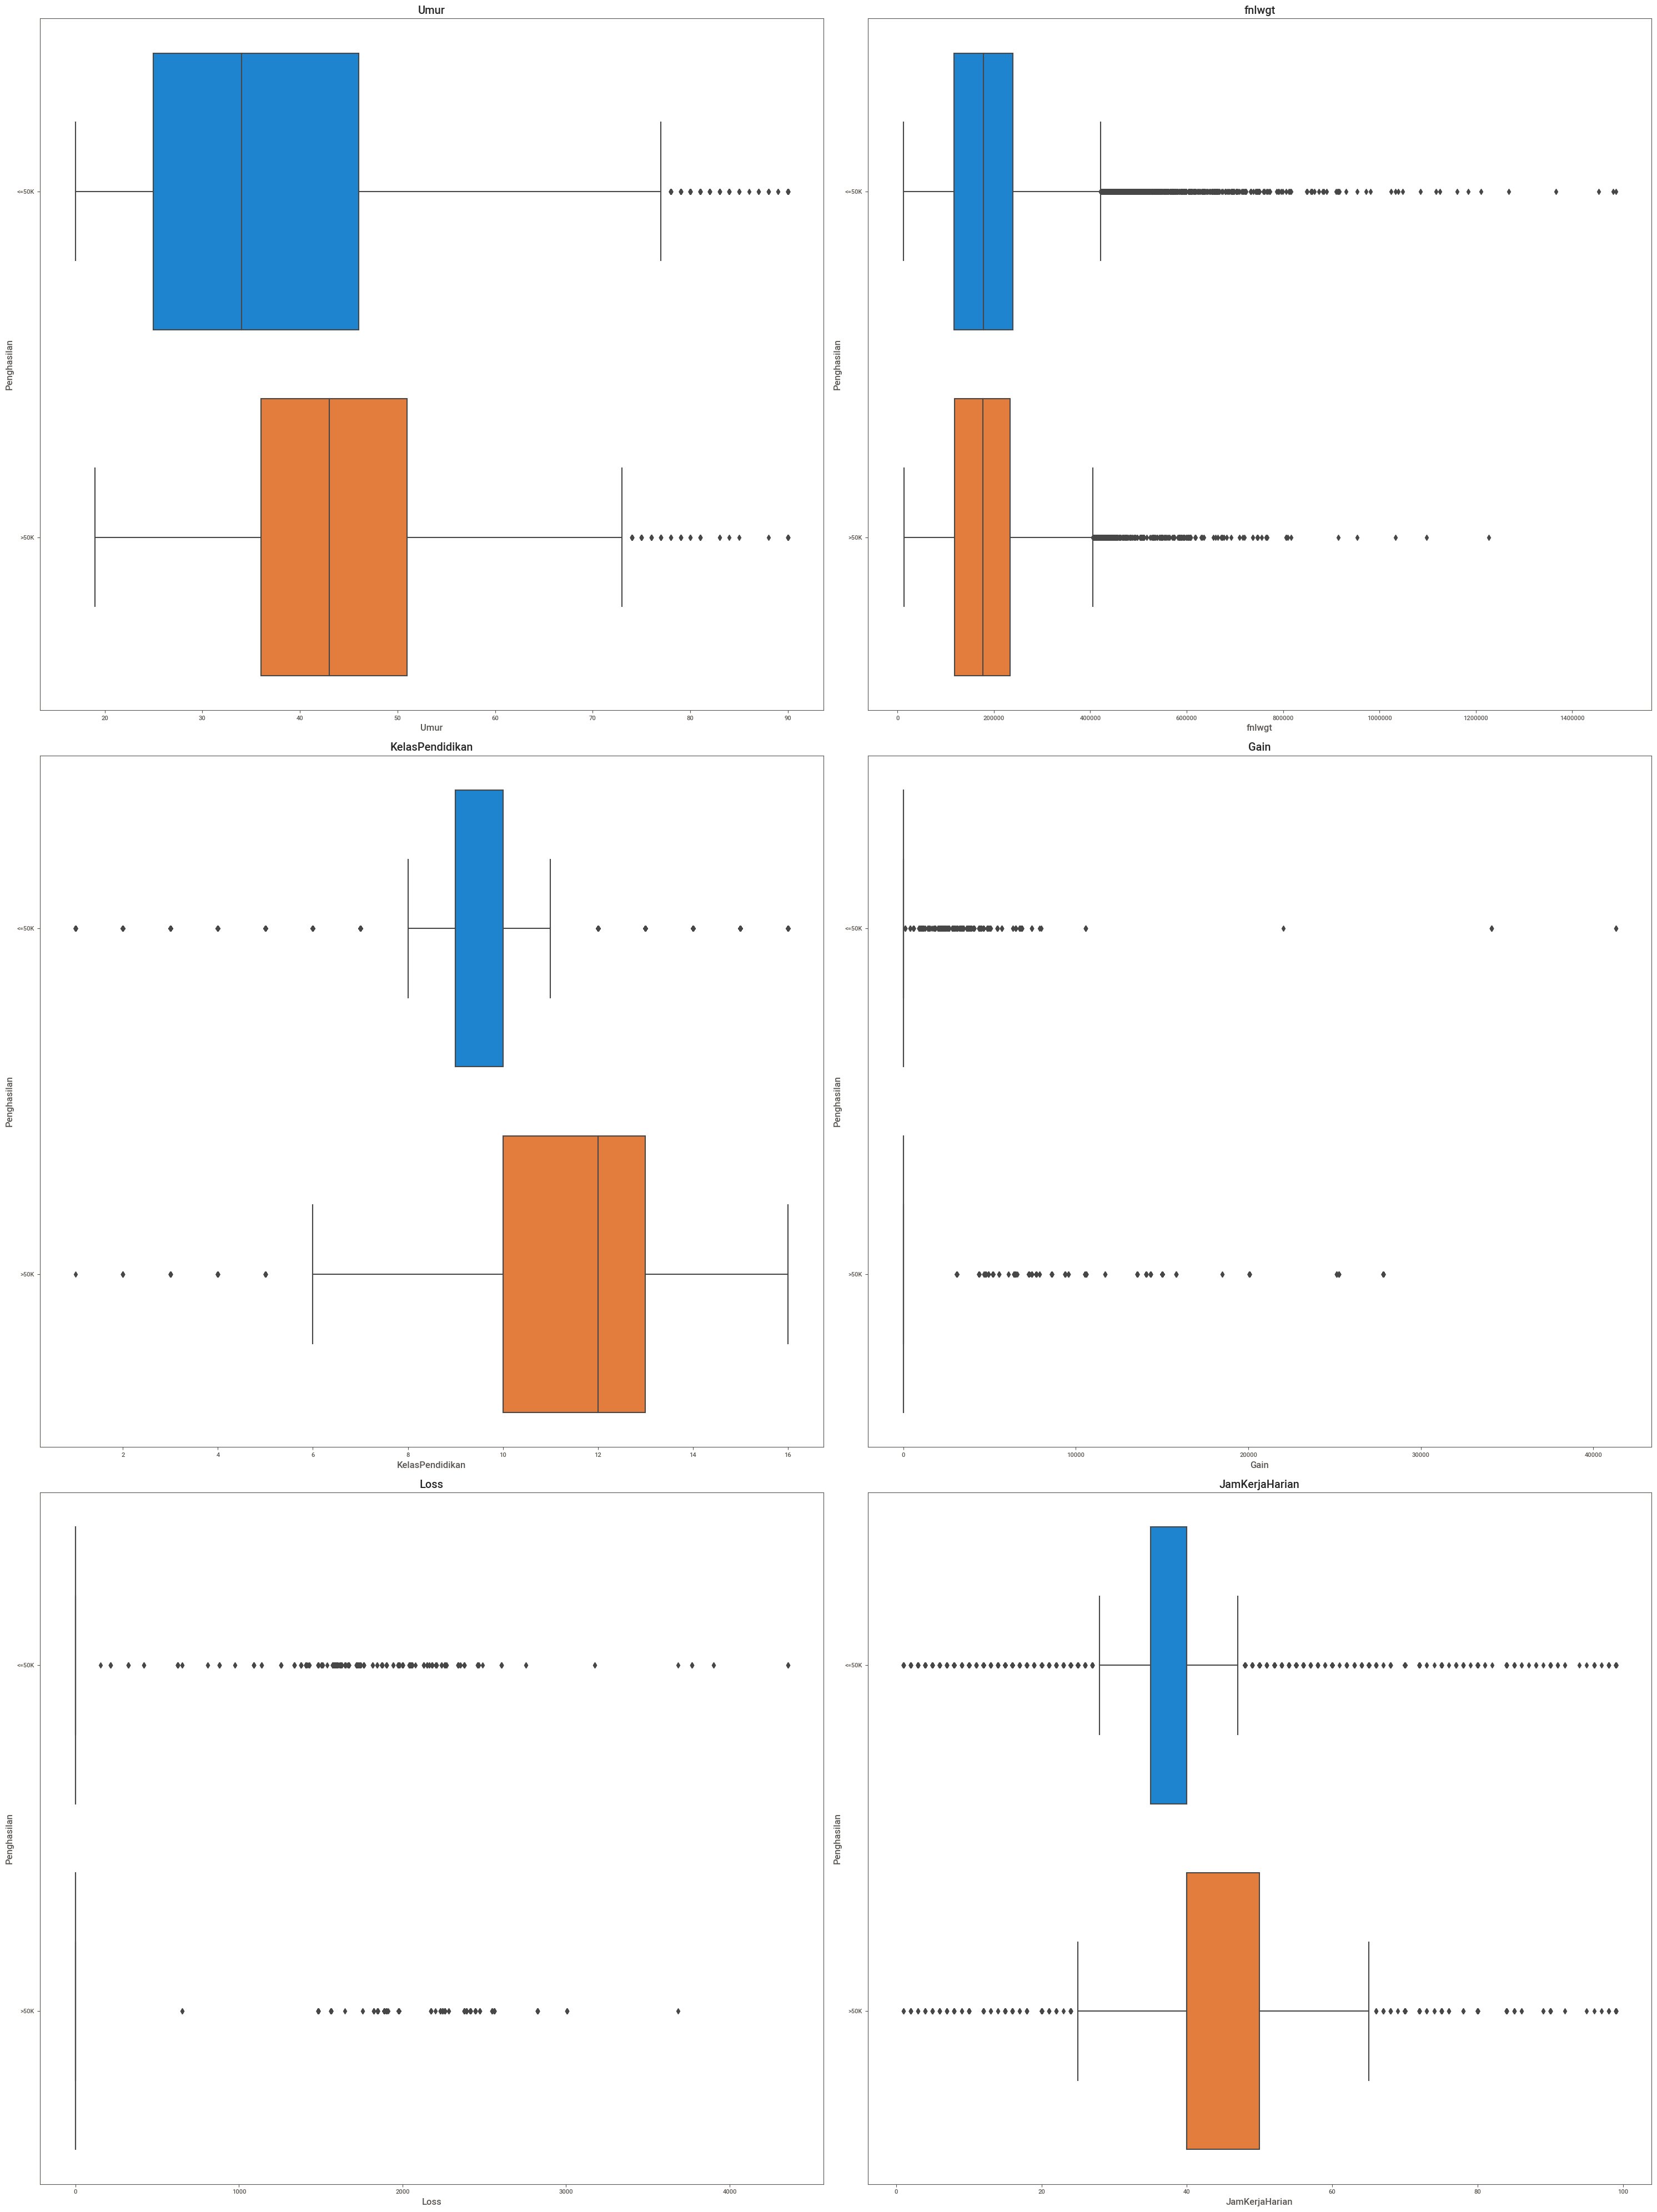

               Umur        fnlwgt  KelasPendidikan          Gain  \
count  48546.000000  4.854600e+04     48546.000000  48546.000000   
mean      38.612800  1.896897e+05        10.064001    583.035986   
std       13.710449  1.056436e+05         2.561993   2537.938037   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175550e+05         9.000000      0.000000   
50%       37.000000  1.782045e+05        10.000000      0.000000   
75%       48.000000  2.376708e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  41310.000000   

               Loss  JamKerjaHarian  
count  48546.000000    48546.000000  
mean      88.035842       40.375376  
std      404.173229       12.371053  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dapatkan variabel numerik
var_numerik = df.select_dtypes(include='number').columns

# Buat figure dan grid sumbu
fig, axs = plt.subplots(len(var_numerik)//2 + len(var_numerik)%2, 2, figsize=(30, 40))

# Buat boxplot untuk setiap variabel numerik
for i, var in enumerate(var_numerik):
    sns.boxplot(data=df, x=var, y='Penghasilan', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(var)

plt.tight_layout()
plt.show()

# Cetak statistik deskriptif
print(df[var_numerik].describe())


<center><h2><strong><font color="red">Apa yang akan anda lakukan?</font></strong></h2></center>

1. Membiarkan?
2. Filter?
3. Apa konsekuensi masing-masingnya?

<center><h3><strong><font color="green">Dibawah ini "Contoh" ... **KALAU** mau di filter</font></strong></h3></center>

Untuk variabel 'Umur', Q1=28.0, Q3=48.0, IQR=20.0


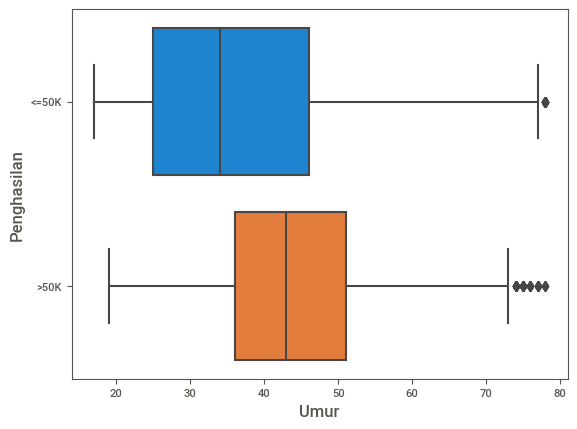

Shape setelah menghapus outliers: (48332, 15), shape sebelumnya: (48546, 15)
Untuk variabel 'fnlwgt', Q1=117555.0, Q3=237670.75, IQR=120115.75


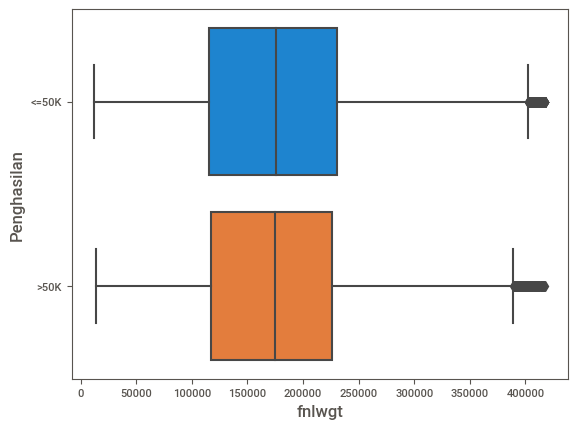

Shape setelah menghapus outliers: (47101, 15), shape sebelumnya: (48546, 15)
Untuk variabel 'KelasPendidikan', Q1=9.0, Q3=12.0, IQR=3.0


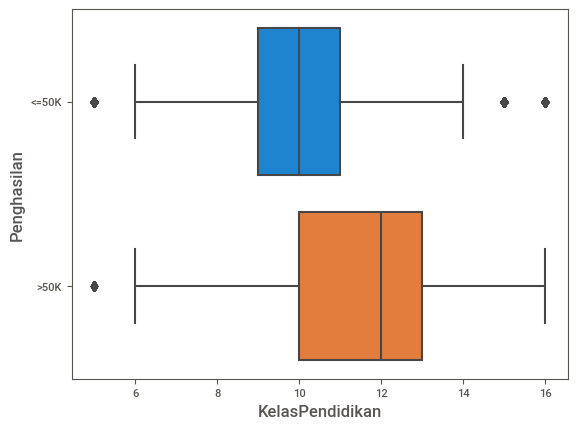

Shape setelah menghapus outliers: (46760, 15), shape sebelumnya: (48546, 15)
Untuk variabel 'Gain', Q1=0.0, Q3=0.0, IQR=0.0


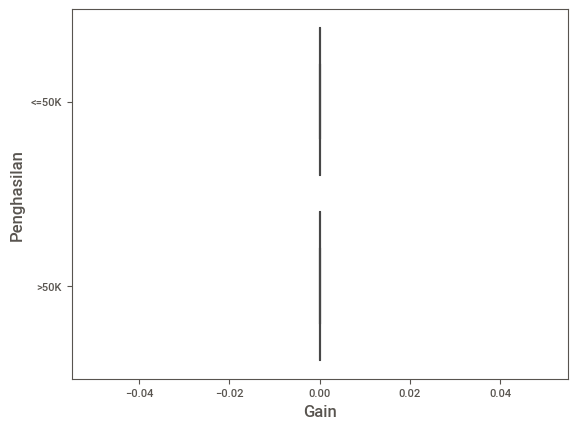

Shape setelah menghapus outliers: (44755, 15), shape sebelumnya: (48546, 15)
Untuk variabel 'Loss', Q1=0.0, Q3=0.0, IQR=0.0


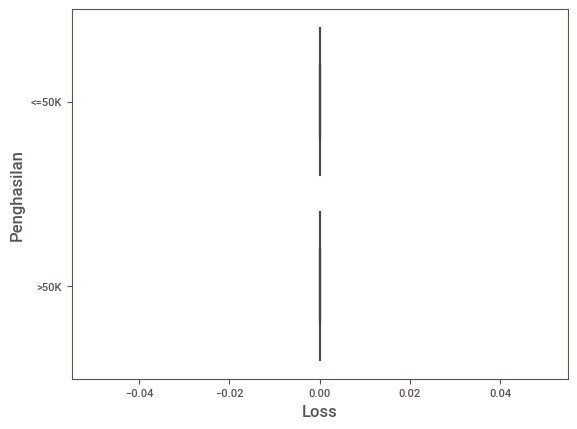

Shape setelah menghapus outliers: (46264, 15), shape sebelumnya: (48546, 15)
Untuk variabel 'JamKerjaHarian', Q1=40.0, Q3=45.0, IQR=5.0


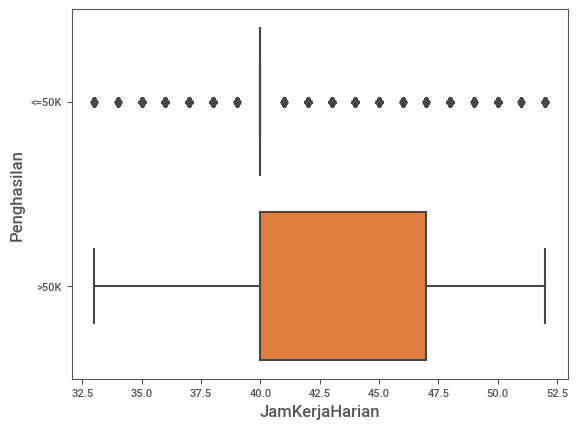

Shape setelah menghapus outliers: (35161, 15), shape sebelumnya: (48546, 15)


In [ ]:
var_numerik = df.select_dtypes(include='number').columns

for var in var_numerik:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1 #IQR is interquartile range.
    print("Untuk variabel '{}', Q1={}, Q3={}, IQR={}".format(var, Q1, Q3, IQR))

    DfNoOutliers = df.drop(df[(df[var] < Q1-1.5*IQR) | (df[var] > Q3+1.5*IQR)].index)
    p = sns.boxplot(x=var, y="Penghasilan", data=DfNoOutliers)
    plt.show()
    print("Shape setelah menghapus outliers: {}, shape sebelumnya: {}".format(DfNoOutliers.shape, df.shape))


### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 04: Memeriksa Outlier (Univariate) </font></strong></h1></center>

*Outlier adalah data yang valid, di dunia industri **wajib** dikonfirmasikan terlebih dahulu ke atasan atau data engineering.*

1.  Check outlier berdasarkan visualisasi seaborn untuk setiap variabel kategorik, diperoleh bahwa dengan saya **asumsikan** tidak ada outlier karena tidak ada outlier yang terlalu extreme di variabel kategorik, maka tidak perlu penanganan lebih lanjut agar nantinya model tetap akan mencerminkan data yang sesuai terjadi di dunia nyata.

2.  Check outlier berdasarkan visualisasi boxplot untuk setiap variabel numerik, diperoleh bahwa dengan saya **asumsikan** ada outlier, maka difilter menggunakan quartile.

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 05: Missing Values</font></strong></h1></center>
    


In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64


In [ ]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

persentase missing
Umur                       0.000000
Sektor                     5.747126
fnlwgt                     0.000000
Pendidikan                 0.000000
KelasPendidikan            0.000000
Status                     0.000000
Pekerjaan                  5.767725
Relationship               0.000000
Ras                        0.000000
Gender                     0.000000
Gain                       0.000000
Loss                       0.000000
JamKerjaHarian             0.000000
AsalNegara                 1.742677
Penghasilan                0.000000

<center><font color="blue">Missing Values Kategorik</font></center>

<center><h1><strong><font color="blue">Imputasi Sederhana Dengan Ukuran Pusat Data</font></strong></h1></center>

Syarat:

1. Missing tidak terlalu banyak
2. Imputasi Dengan Rata-Rata untuk Variabel Numerik yang berdistribusi (hampir) Normal
3. Imputasi Dengan Modus atau top untuk Variabel Kategorik yang berdistribusi (hampir) homogen/Univariate


In [ ]:
df.head(3)

Umur            Sektor  fnlwgt Pendidikan  KelasPendidikan  \
0    39         State-gov   77516  Bachelors               13   
1    50  Self-emp-not-inc   83311  Bachelors               13   
2    38           Private  215646    HS-grad                9   

               Status          Pekerjaan   Relationship    Ras Gender  Gain  \
0       Never-married       Adm-clerical  Not-in-family  White   Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband  White   Male     0   
2            Divorced  Handlers-cleaners  Not-in-family  White   Male     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K

In [ ]:
# Imputasi dengan nilai paling sering (top) untuk beberapa variabel
vars_to_impute = ['Sektor', 'Pekerjaan', 'AsalNegara']

# Cetak jumlah nilai null sebelum imputasi
print("Jumlah nilai null sebelum imputasi:")
print(df.isnull().sum())

# Imputasi dengan nilai paling sering (top)
for var in vars_to_impute:
    df[var].fillna(df[var].value_counts().idxmax(), inplace=True)

# Cetak jumlah nilai null setelah imputasi
print("\nJumlah nilai null setelah imputasi:")
print(df.isnull().sum())

Jumlah nilai null sebelum imputasi:
Umur                  0
Sektor             2790
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2800
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          846
Penghasilan           0
dtype: int64

Jumlah nilai null setelah imputasi:
Umur               0
Sektor             0
fnlwgt             0
Pendidikan         0
KelasPendidikan    0
Status             0
Pekerjaan          0
Relationship       0
Ras                0
Gender             0
Gain               0
Loss               0
JamKerjaHarian     0
AsalNegara         0
Penghasilan        0
dtype: int64


In [ ]:
df["Sektor"].unique()

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']

### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 05: Missing Value </font></strong></h1></center>

**Saya asumsikan semua missing value bersifat random dan memenuhi  syarat imputasi.**

1.  Check missing value untuk setiap variabel kategorik, diperoleh bahwa ada missing value yang terlihat pada variabel kategorik "Sektor", "Pekerjaan" dan "Asal negara" dikarenakan memenuhi 3 syarat untuk imputasi dan memiliki persentase yang relatif kecil, maka diganti dengan dengan modus atau top pada variabel tersebut.

2. Check missing value untuk setiap variabel numerik, diperoleh bahwa tidak ada missing value yang terlihat pada variabel numerik.

##<center><h1><strong><font color="blue">Penelaahan Data (EDA) 06: Transformasi</font></strong></h1></center>




One-Hot-Encoding

In [ ]:
df.head()

Umur            Sektor  fnlwgt Pendidikan  KelasPendidikan  \
0    39         State-gov   77516  Bachelors               13   
1    50  Self-emp-not-inc   83311  Bachelors               13   
2    38           Private  215646    HS-grad                9   
3    53           Private  234721       11th                7   
4    28           Private  338409  Bachelors               13   

               Status          Pekerjaan   Relationship    Ras  Gender  Gain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male     0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male     0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male     0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K  
3     0              40  United-States       <=50K  
4     0              40           Cuba       <=50K

In [ ]:
df['Ras'].unique()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [ ]:
df2 = pd.get_dummies(df['Ras'], prefix='')
df2.head()

_Amer-Indian-Eskimo  _Asian-Pac-Islander  _Black  _Other  _White
0                    0                    0       0       0       1
1                    0                    0       0       0       1
2                    0                    0       0       0       1
3                    0                    0       1       0       0
4                    0                    0       1       0       0

<center><h1><strong><font color="blue">Transformasi di seluruh Variabel Kategorik</font></strong></h1></center>

In [ ]:
print(df.shape)
for col in catVar.columns:
    if col != 'Penghasilan': #kecuali variabel target
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(48546, 15)
(48546, 106)


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Federal-gov  _Local-gov  _Never-worked  ...  _Portugal  _Puerto-Rico  \
0             0           0              0  ...          0             0   
1             0           0              0  ...          0             0   
2             0           0              0  ...          0             0   
3             0           0              0  ...          0             0   
4             0           0              0  ...          0             0   

   _Scotland  _South  _Taiwan  _Thailand  _Trinadad&Tobago  _United-States  \
0          0       0        0          0                 0               1   
1          0       0        0          0                 0               1   
2          0       0        0          0                 0               1   
3          0       0        0          0                 0               1   
4          0       0        0          0                 0               0   

   _Vietnam  _Yugoslavia  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0  

[5 rows x 106 columns]

In [ ]:
# Saving the preprocessed Data for future use/analysis
df.to_csv("data/adult_PreProcessed.csv", encoding='utf8', index=False)

### <h2><strong><font color="red"> Interpretasi Penelaahan Data (EDA) 06: Transformasi </font></strong></h1></center>

1.  Untuk setiap variabel kategorik ditransformasi dengan One-Hot-Encoding menjadi bentuk binary

In [ ]:
# Cek duplikasi data dan missing value
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()

(48546, 106)
jumlah data yang duplikat 1


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
46708    30  288419                3     0     0              40       <=50K   

       _Federal-gov  _Local-gov  _Never-worked  ...  _Portugal  _Puerto-Rico  \
46708             0           0              0  ...          0             0   

       _Scotland  _South  _Taiwan  _Thailand  _Trinadad&Tobago  \
46708          0       0        0          0                 0   

       _United-States  _Vietnam  _Yugoslavia  
46708               0         0            0  

[1 rows x 106 columns]

In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print("jumlah data yang duplikat", df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

jumlah data yang duplikat 0
(48545, 106)


In [ ]:
print(df.isnull().sum())

Umur                0
fnlwgt              0
KelasPendidikan     0
Gain                0
Loss                0
                   ..
_Thailand           0
_Trinadad&Tobago    0
_United-States      0
_Vietnam            0
_Yugoslavia         0
Length: 106, dtype: int64


                                             |          | [  0%]   00:00 -> (? left)


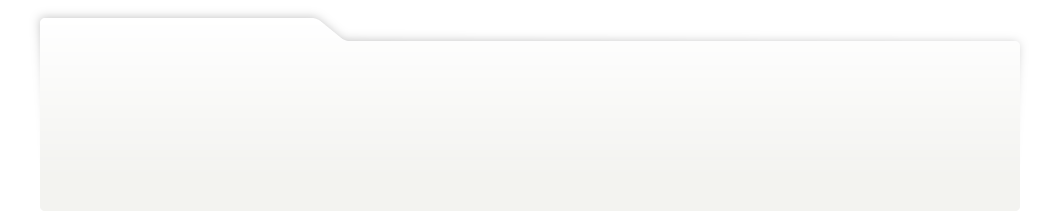
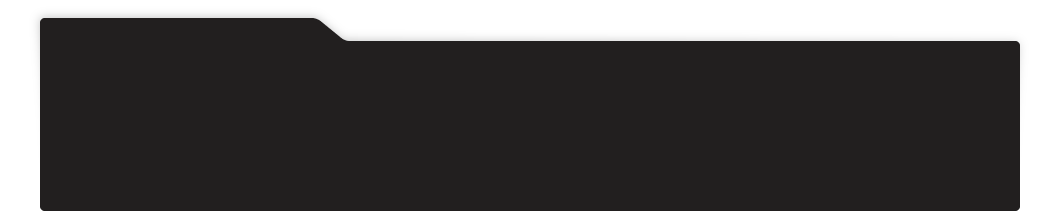
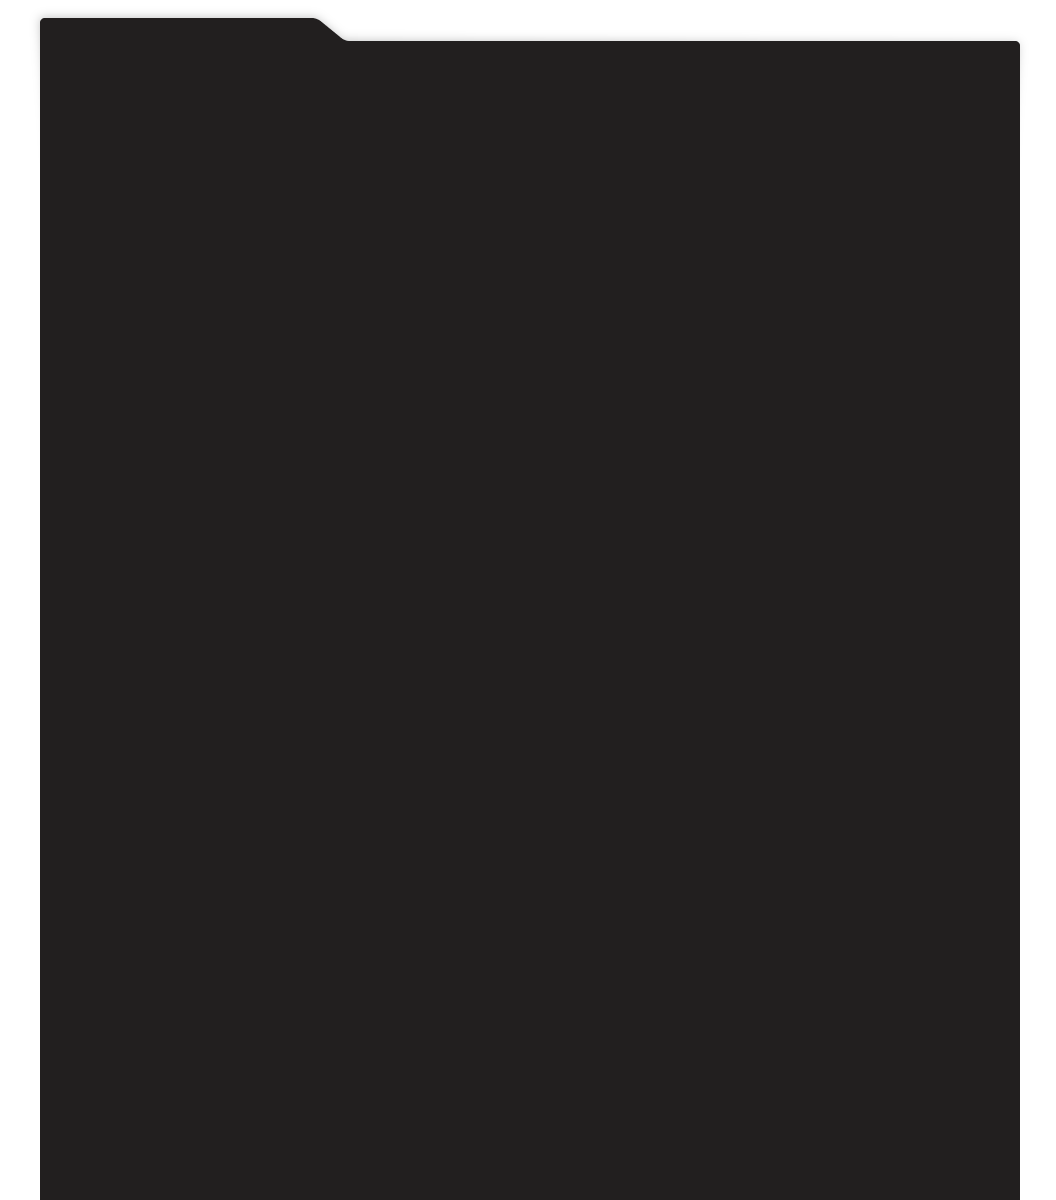
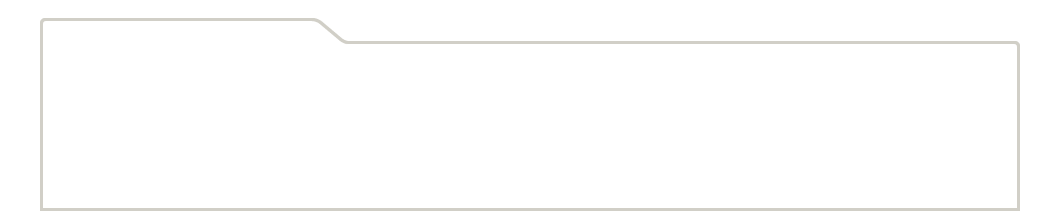
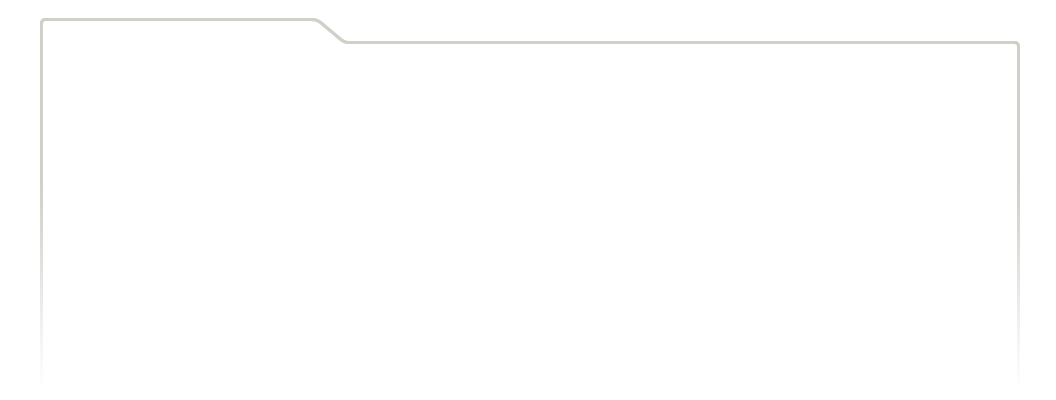
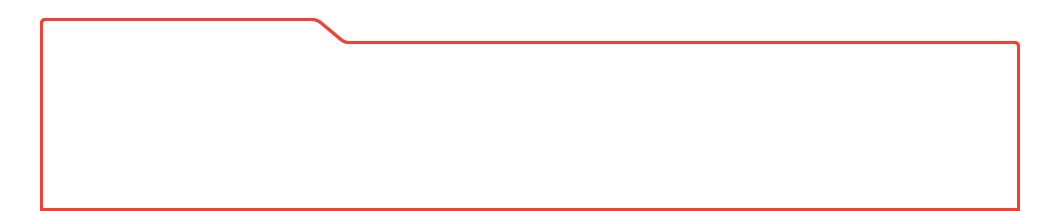
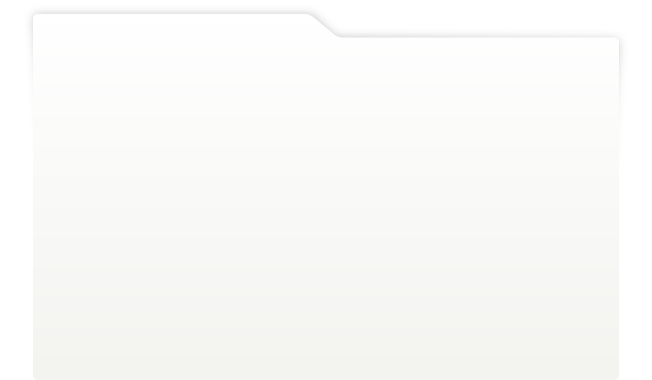
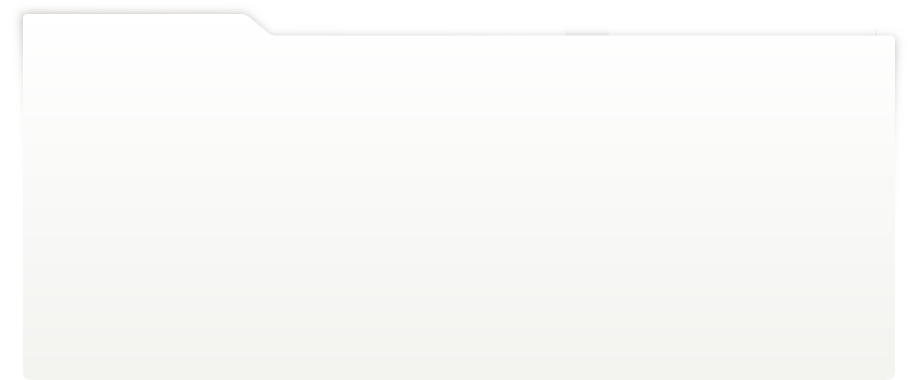
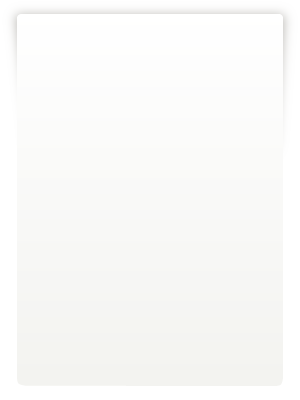
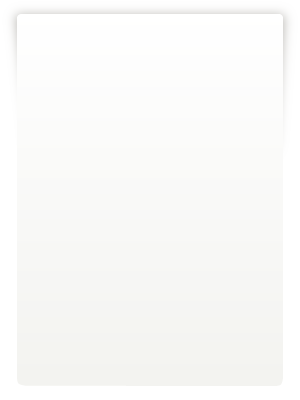
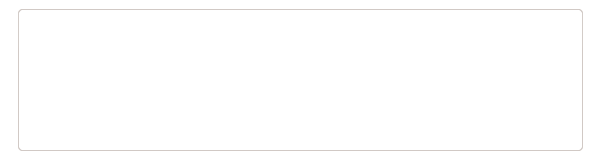
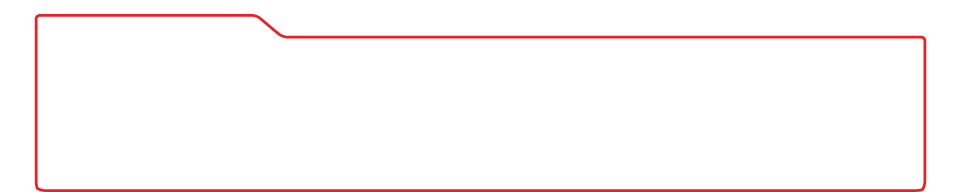
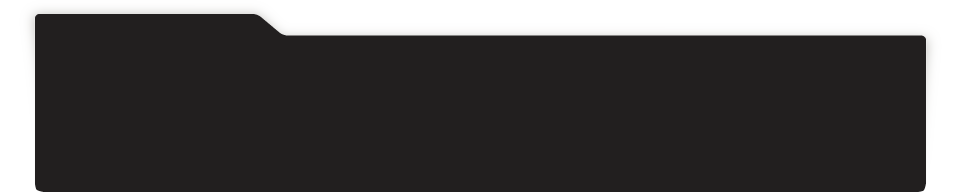
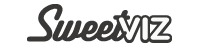
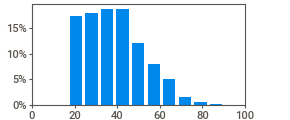
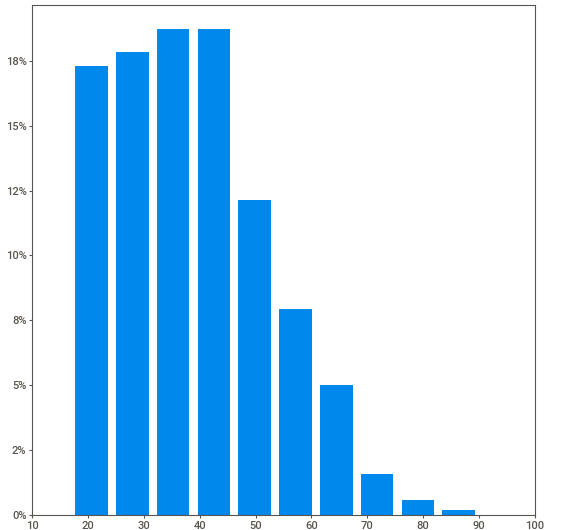
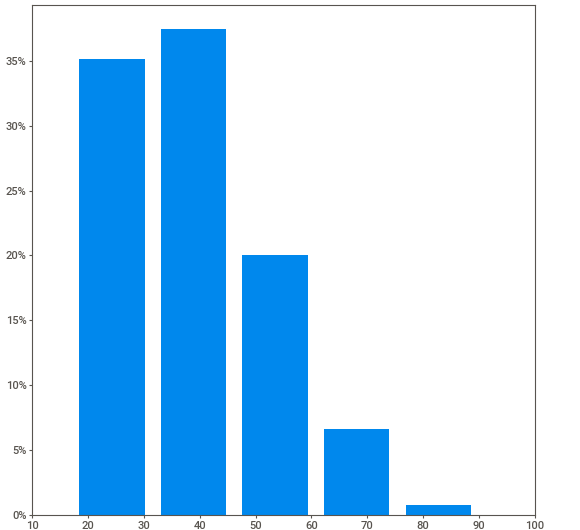
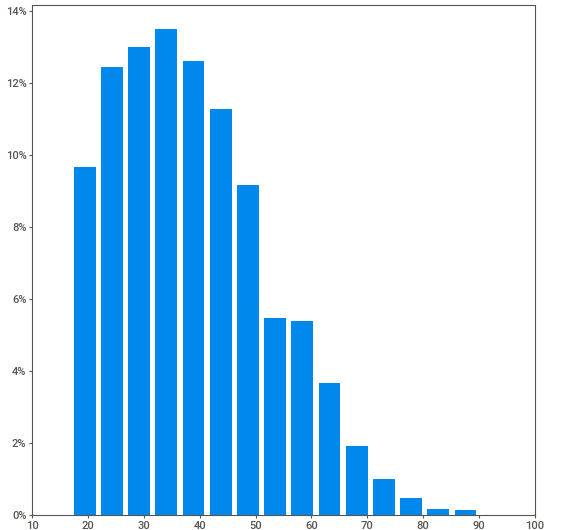
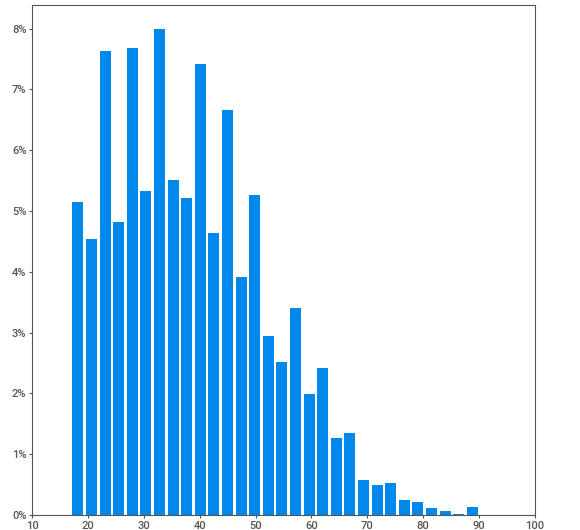
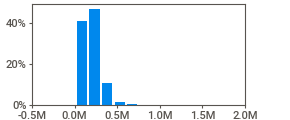
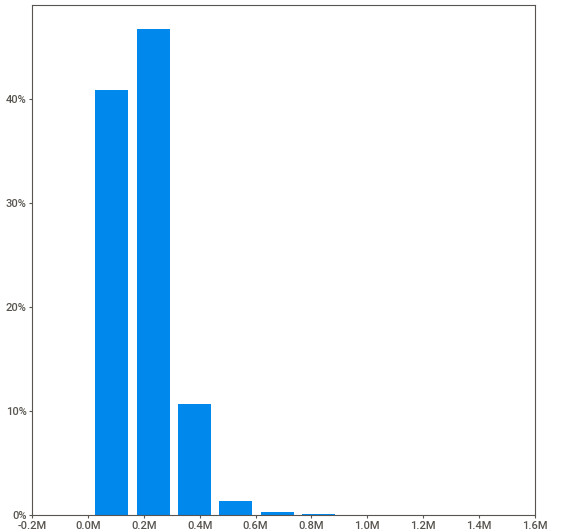
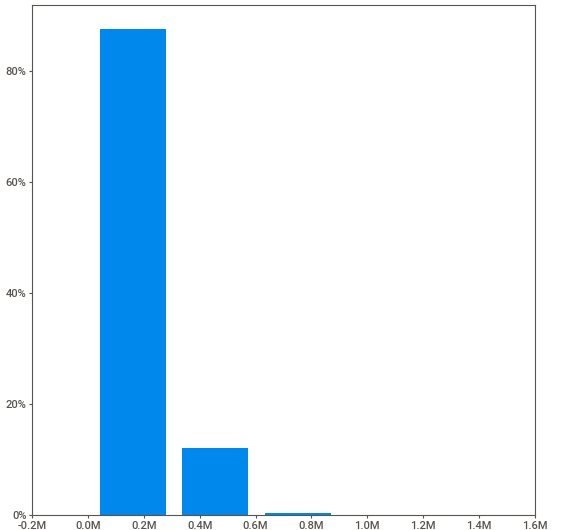
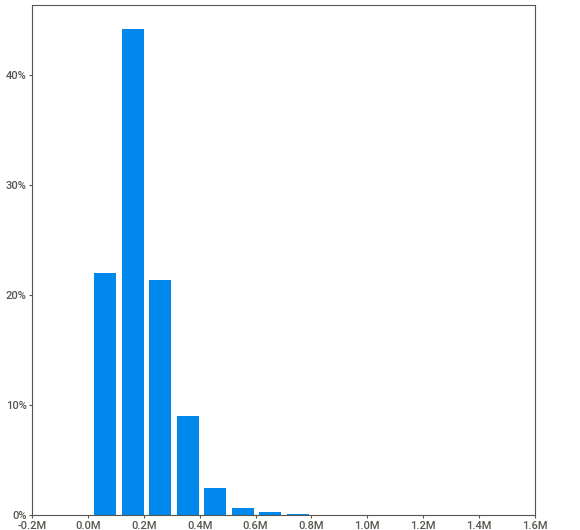
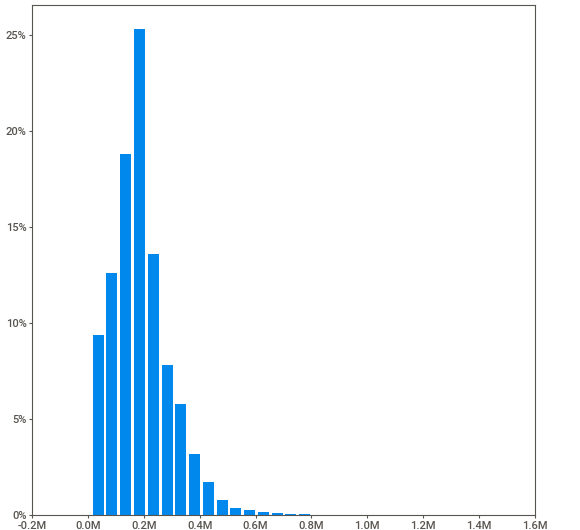
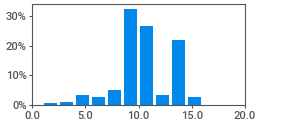
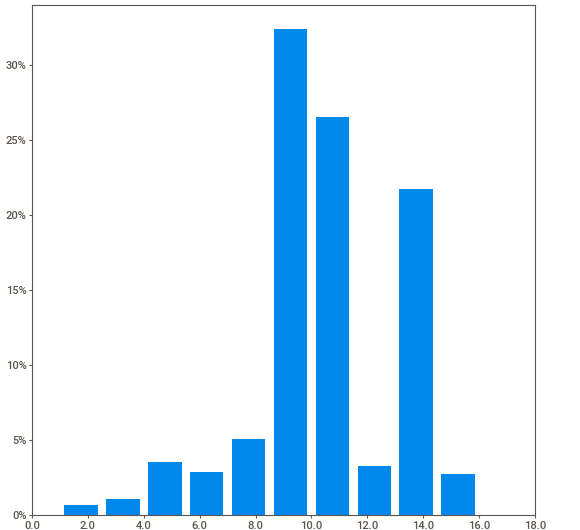
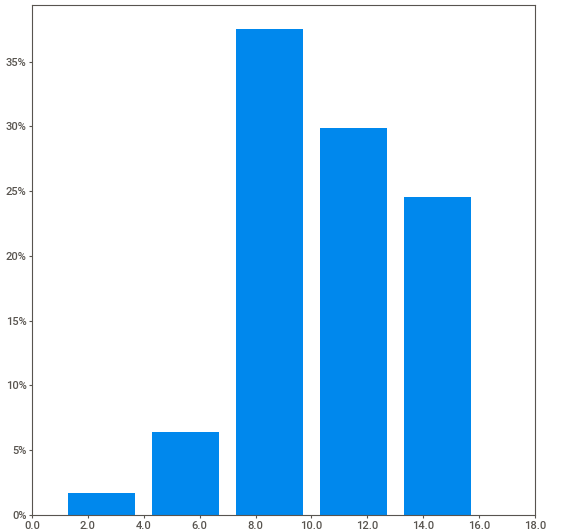
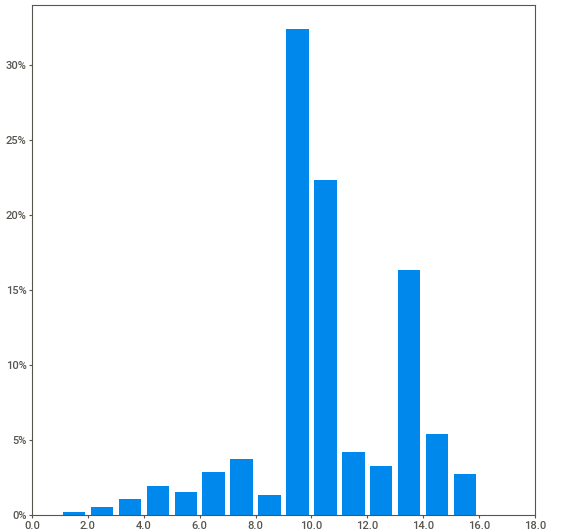
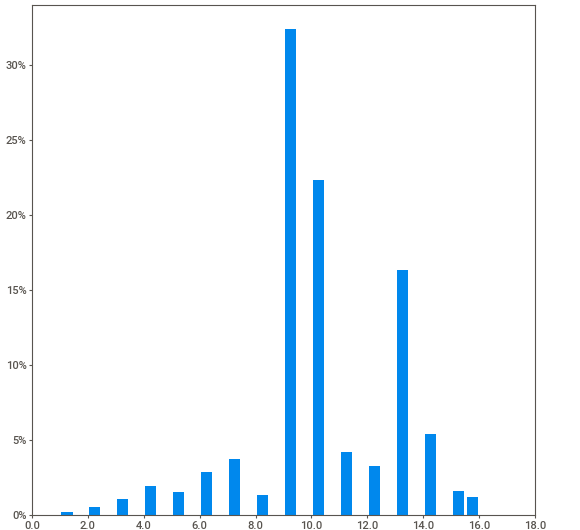
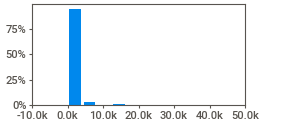
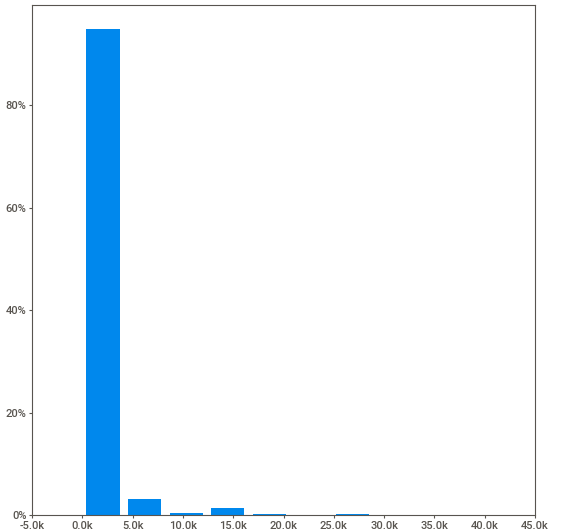
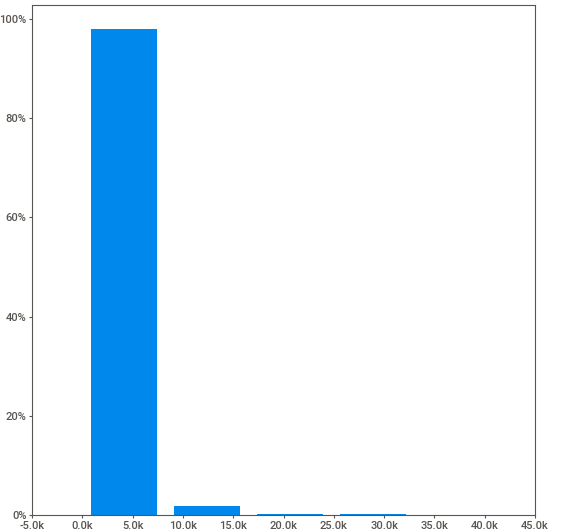
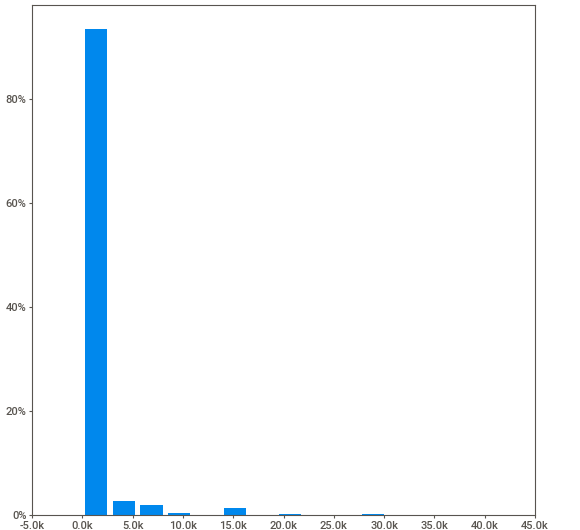
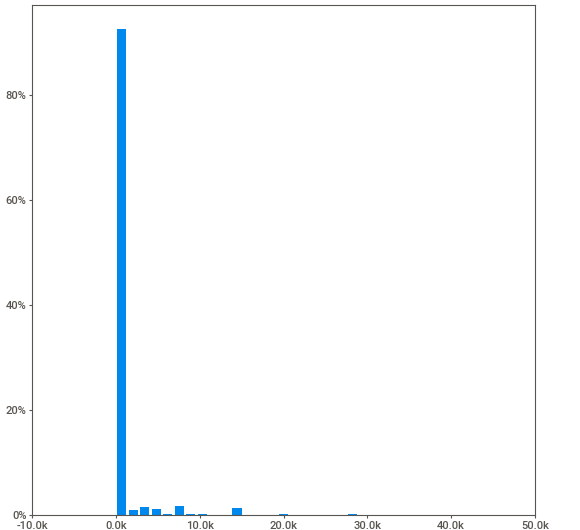
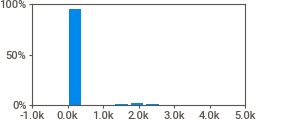
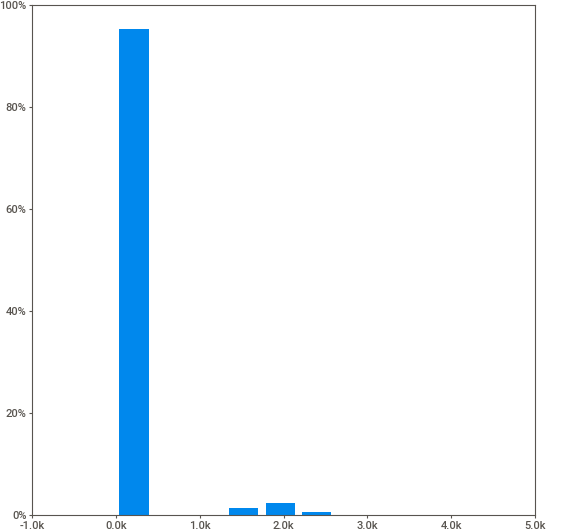
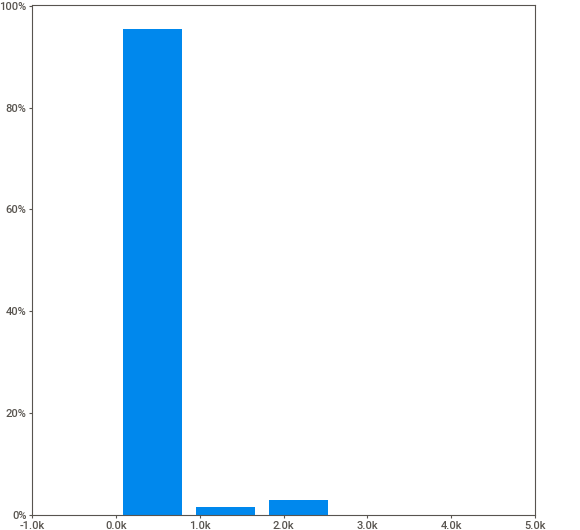
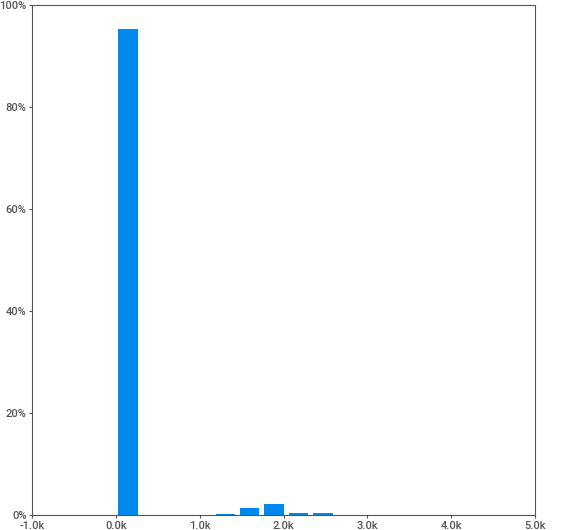
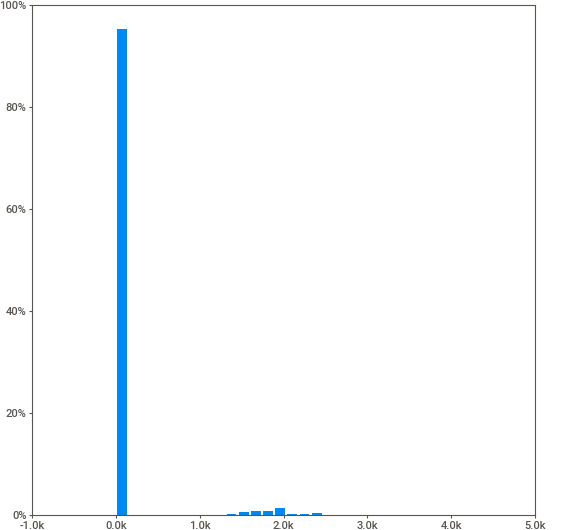
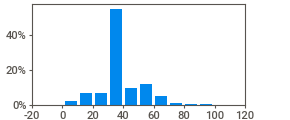
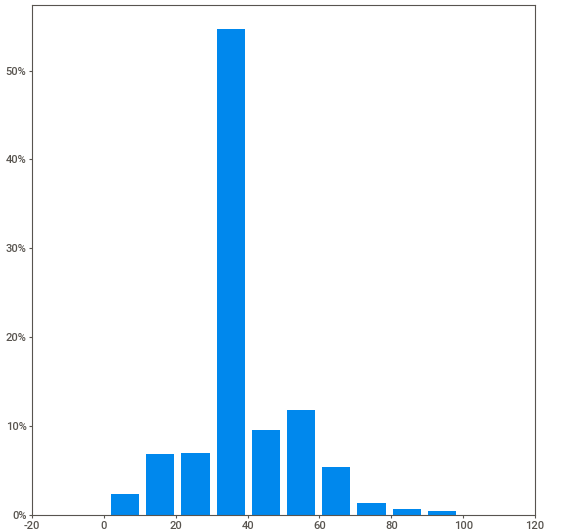
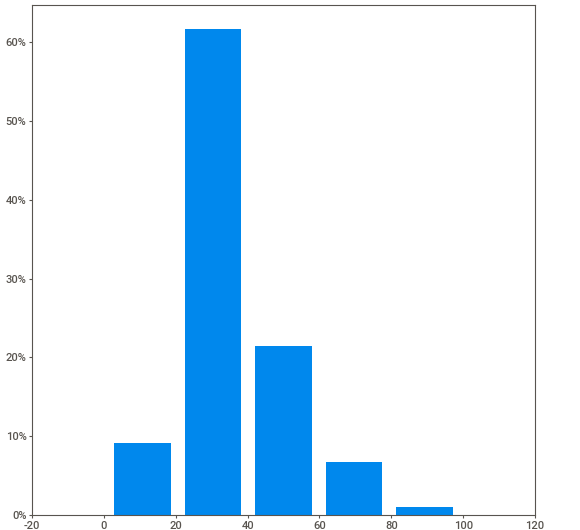
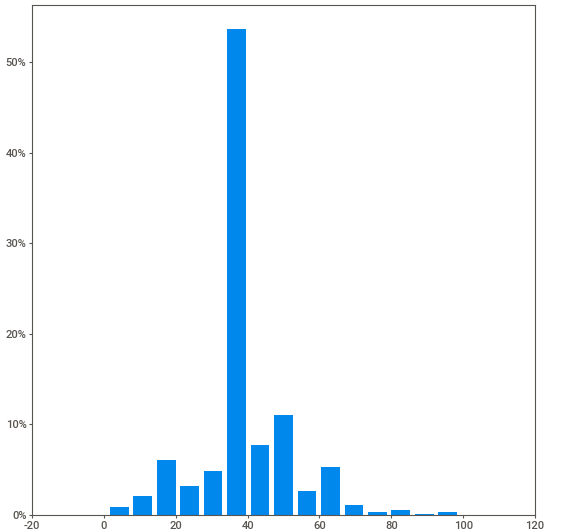
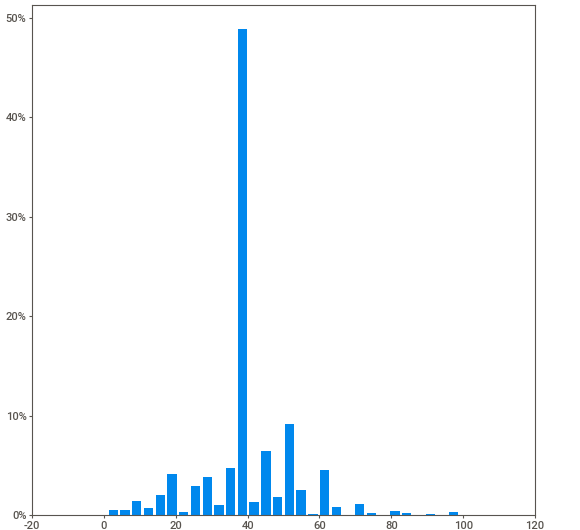
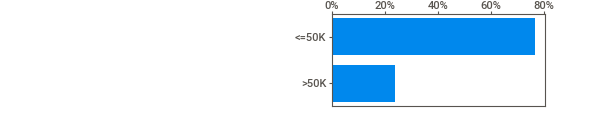
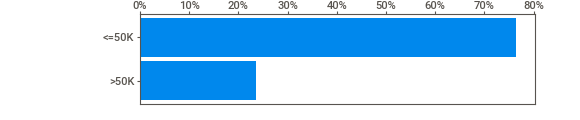
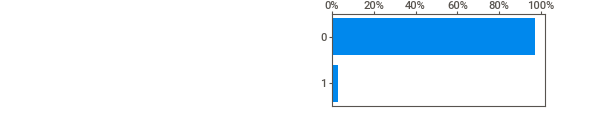
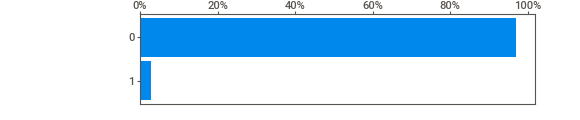
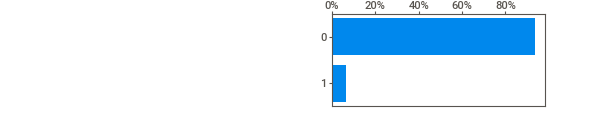
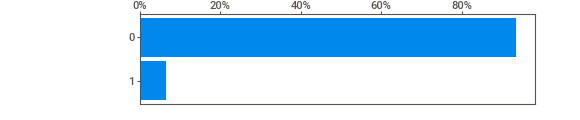
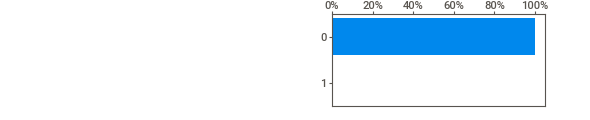
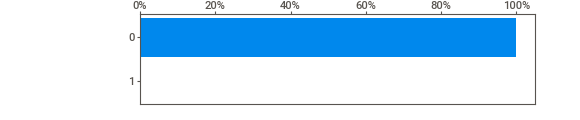
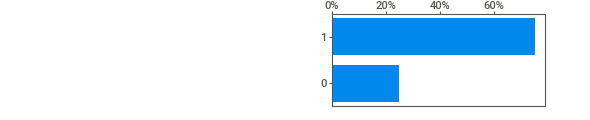
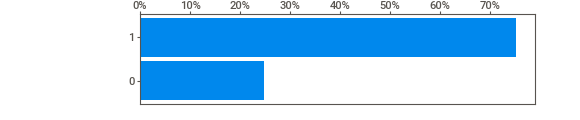
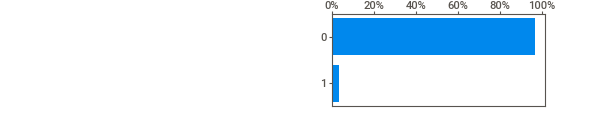
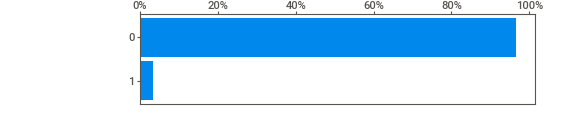
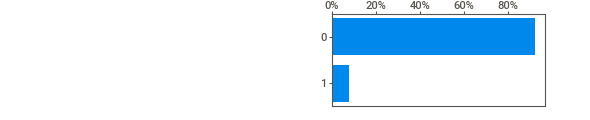
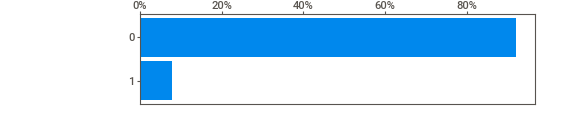
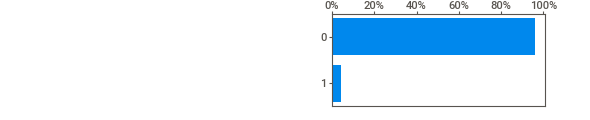
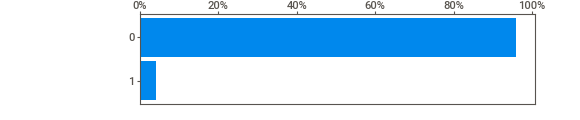
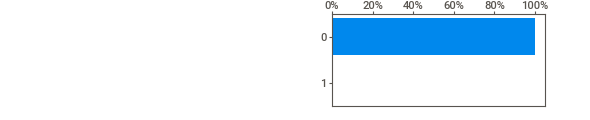
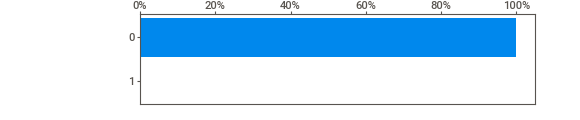
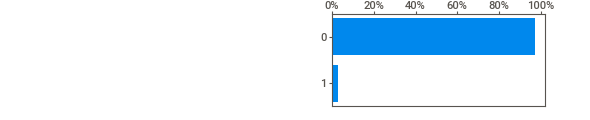
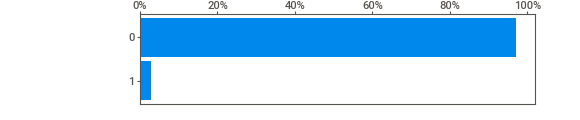
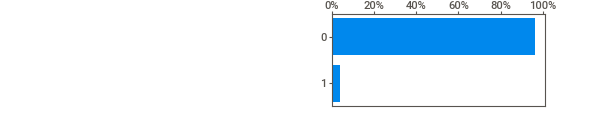
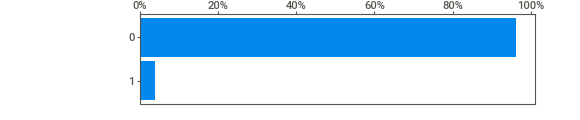
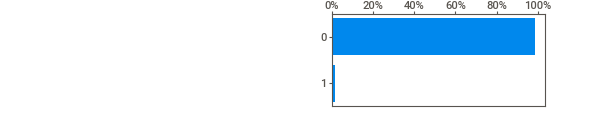
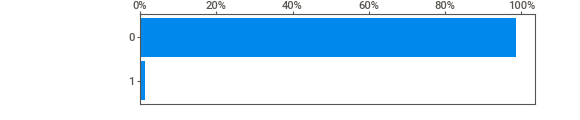
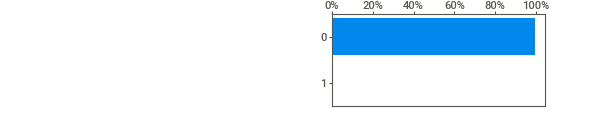
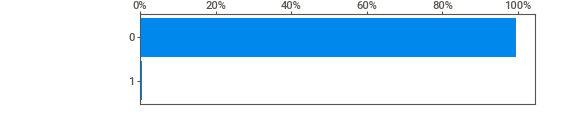
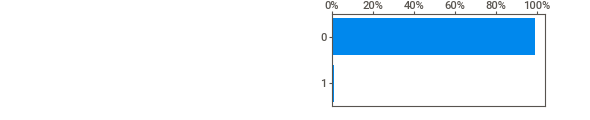
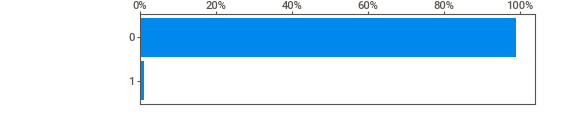
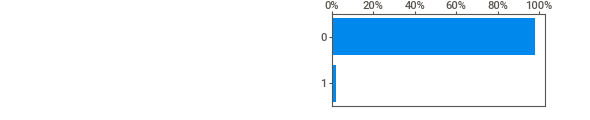
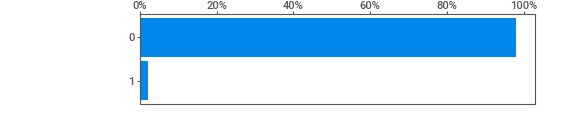
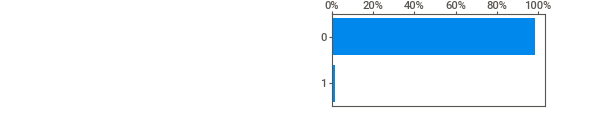
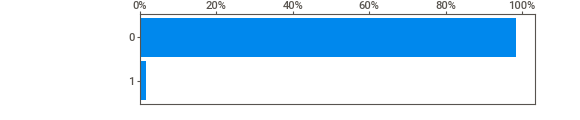
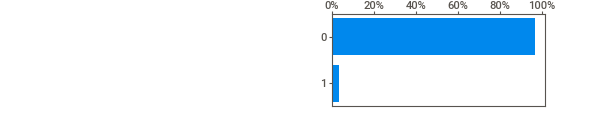
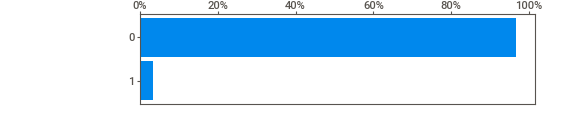
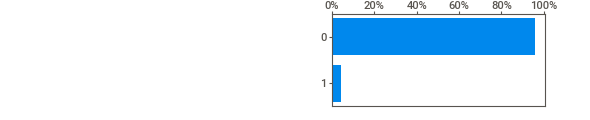
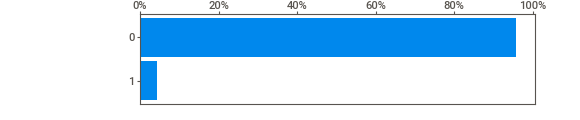
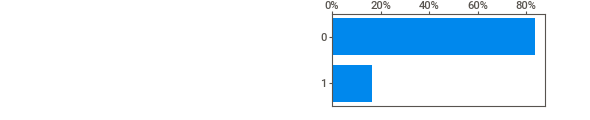
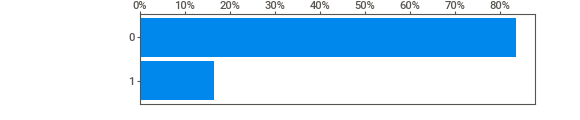
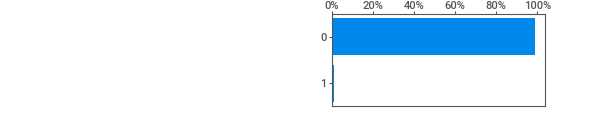
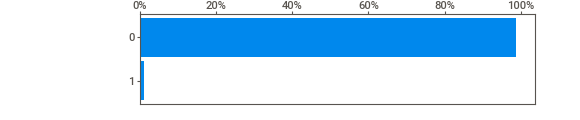
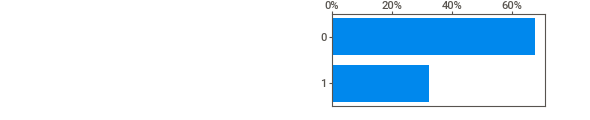
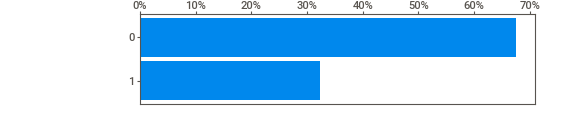
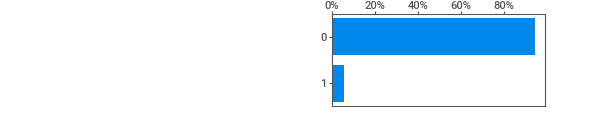
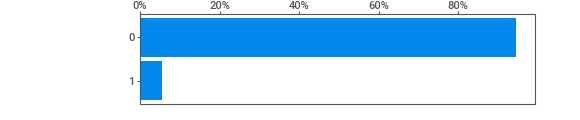
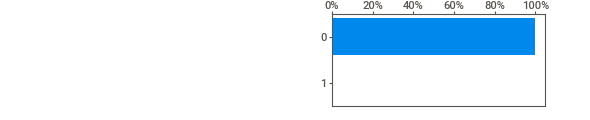
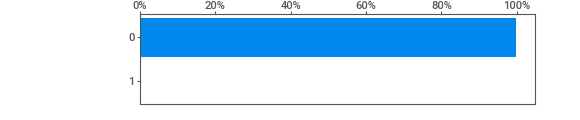
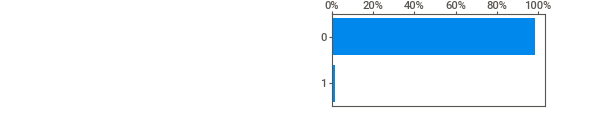
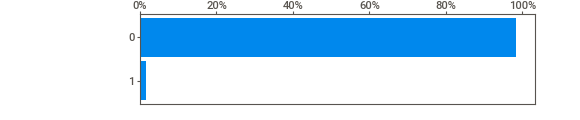
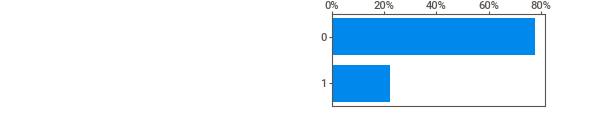
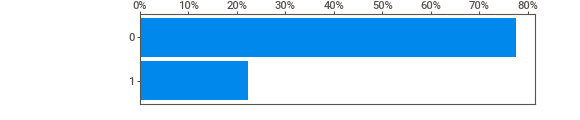
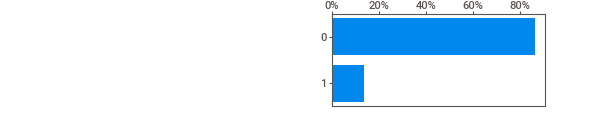
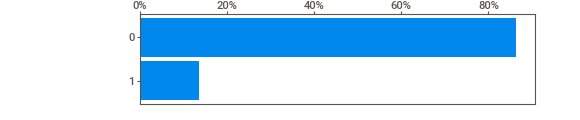
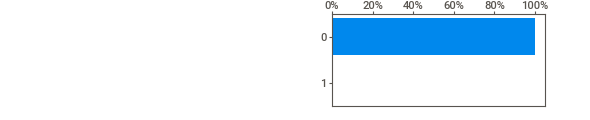
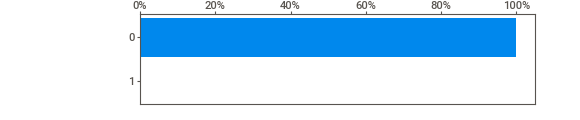
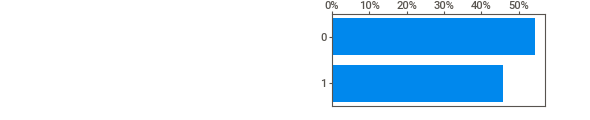
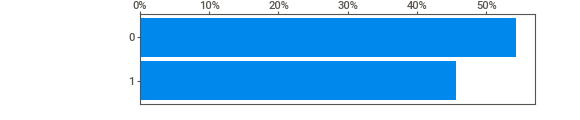
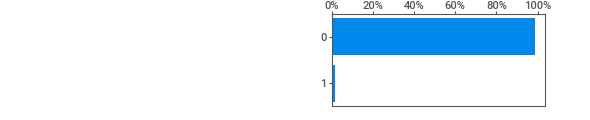
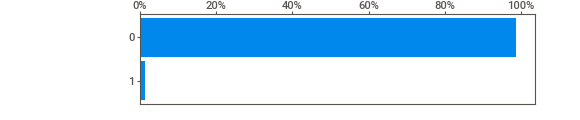
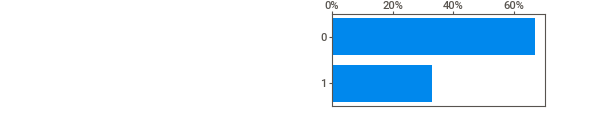
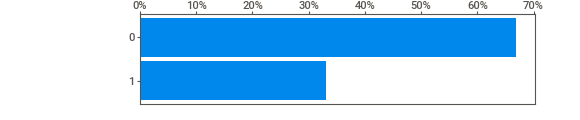
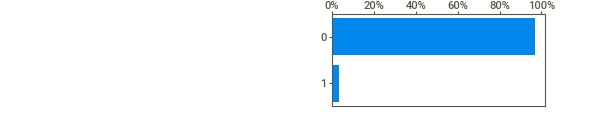
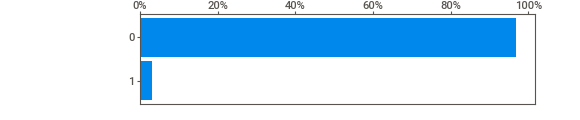
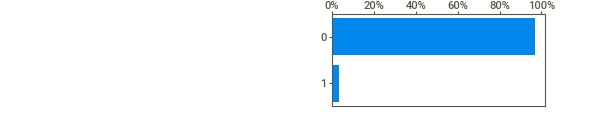
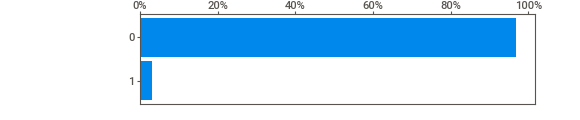
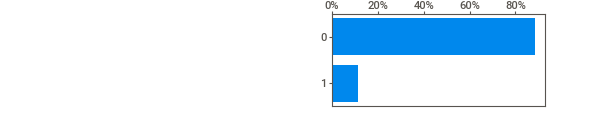
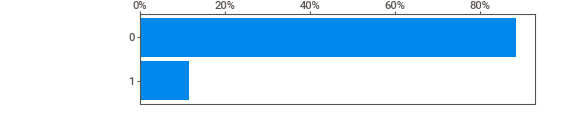
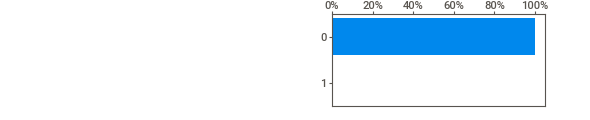
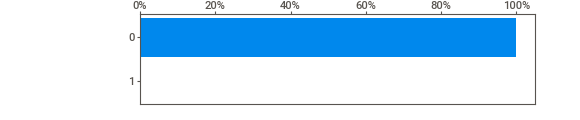
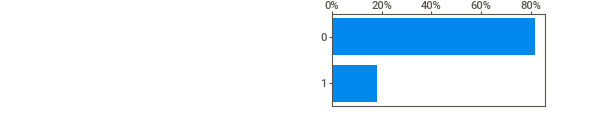
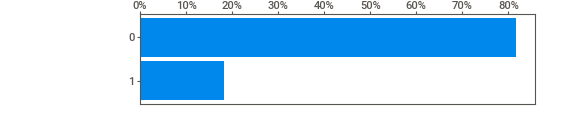
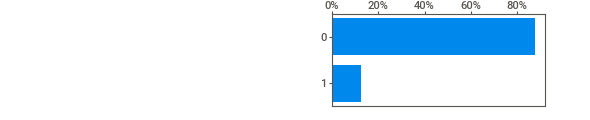
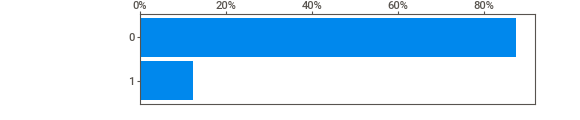
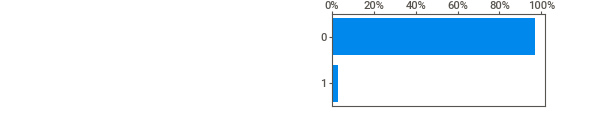
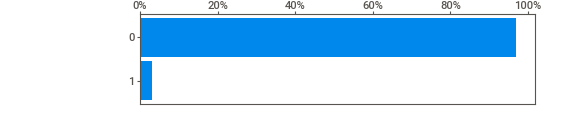
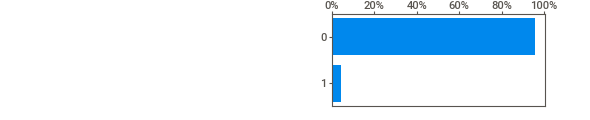
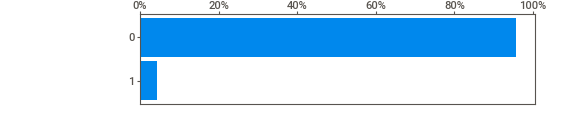
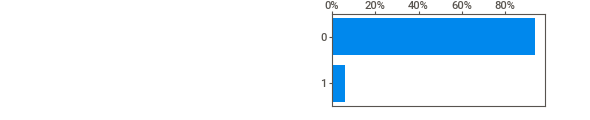
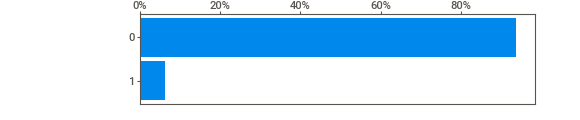
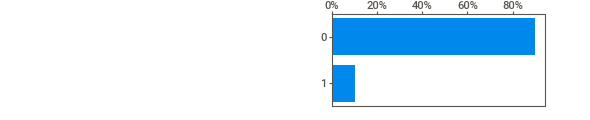
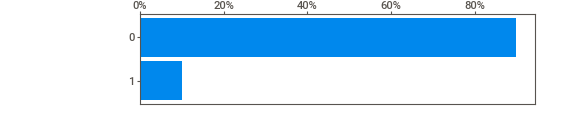
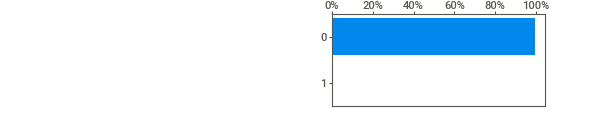
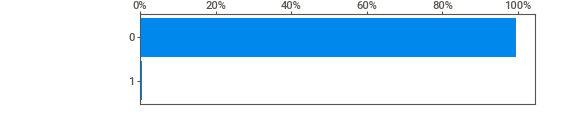
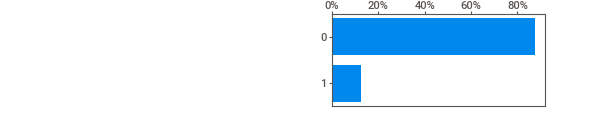
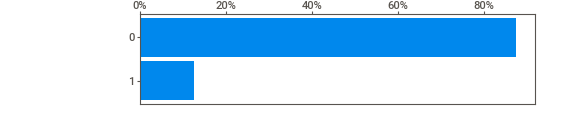
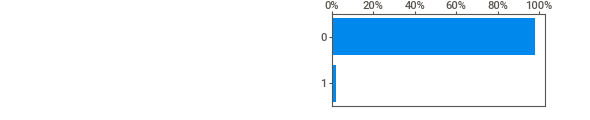
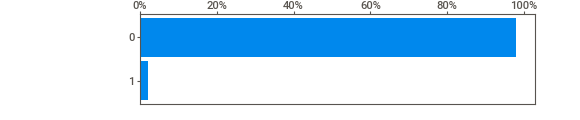
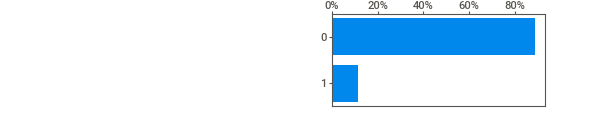
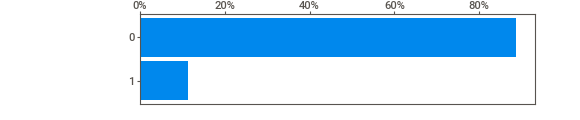
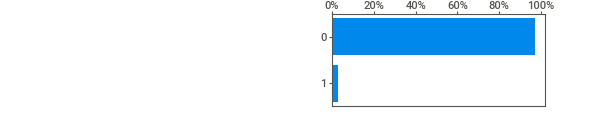
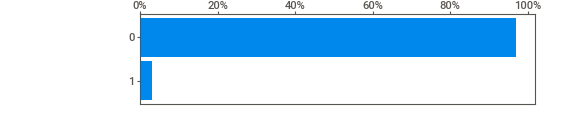
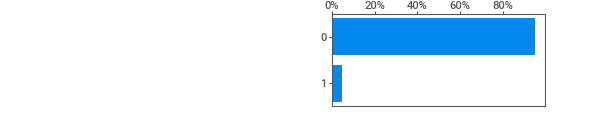
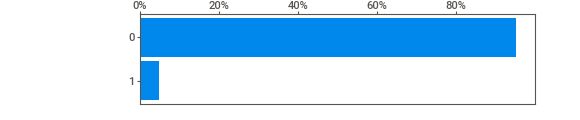
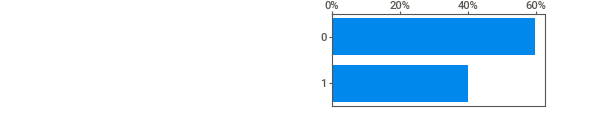
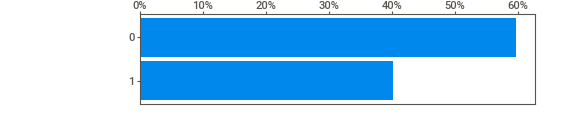
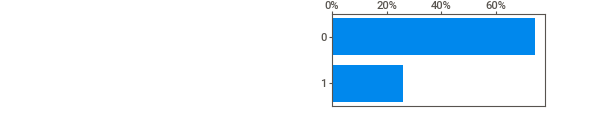
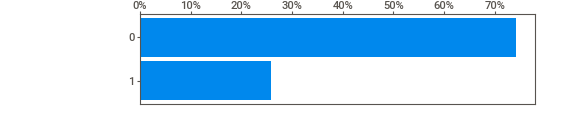
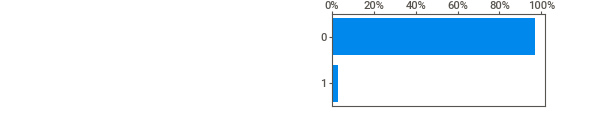
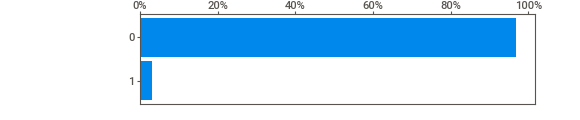
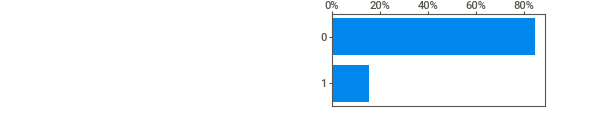
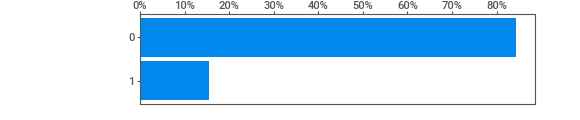
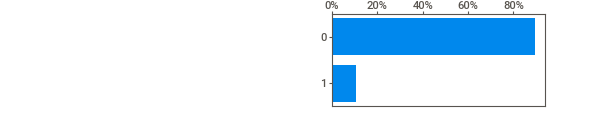
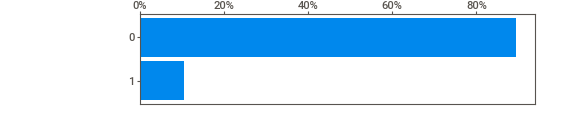
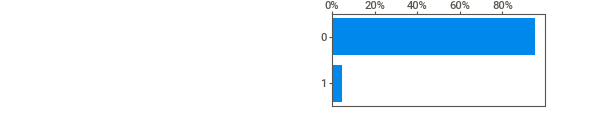
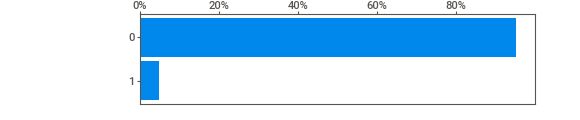
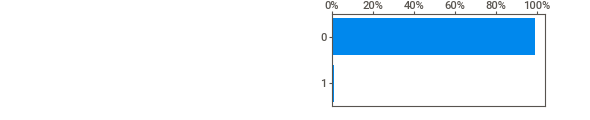
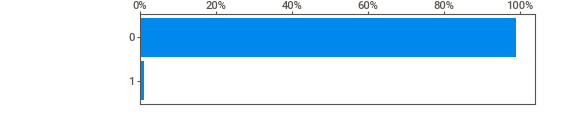
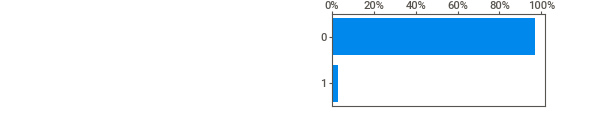
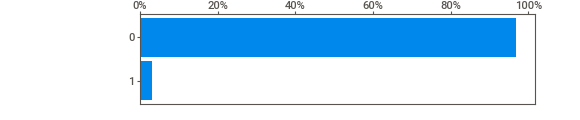
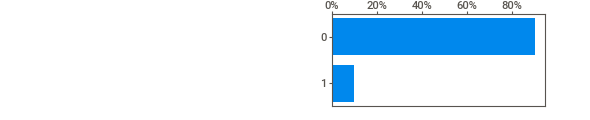
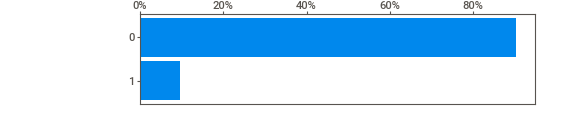
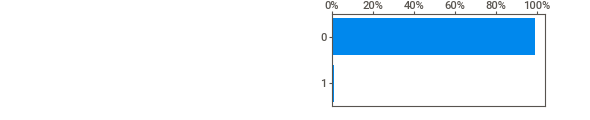
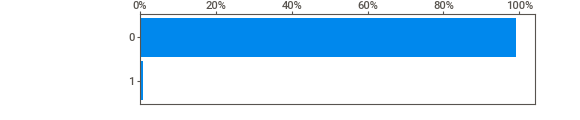
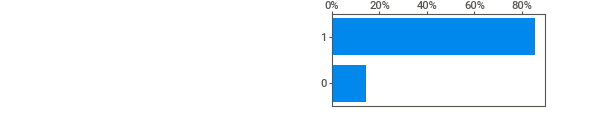
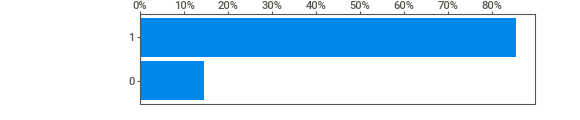
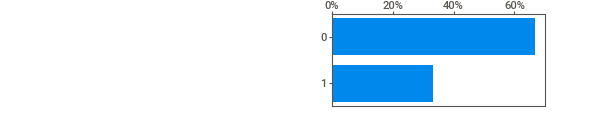
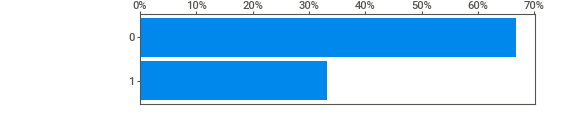
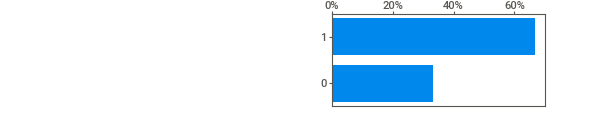
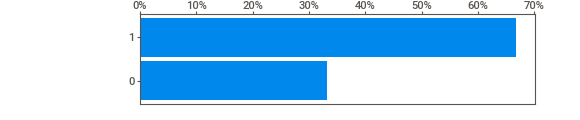
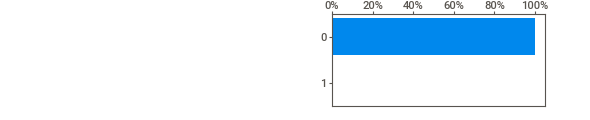
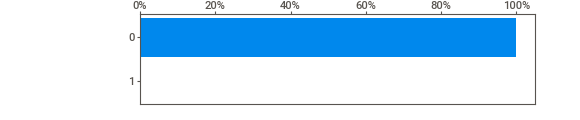
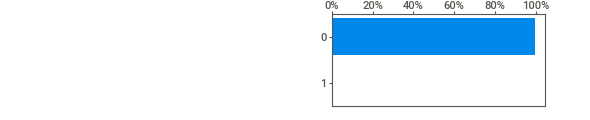
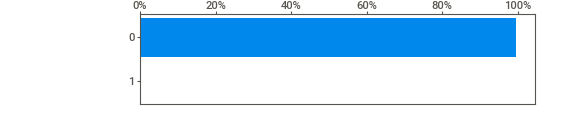
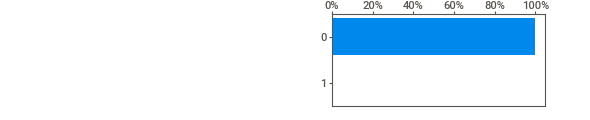
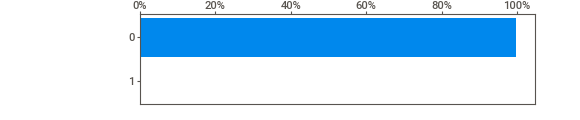
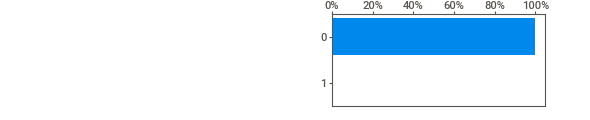
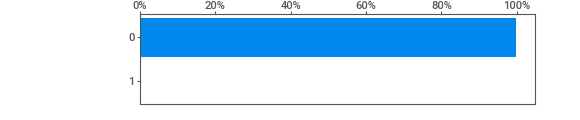
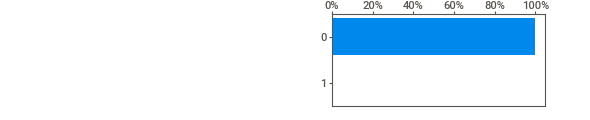
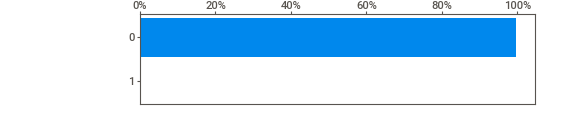
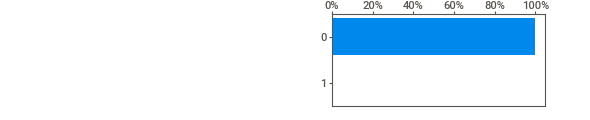
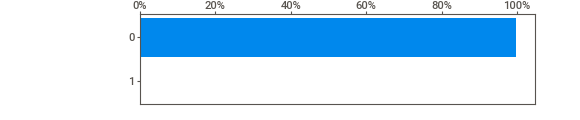
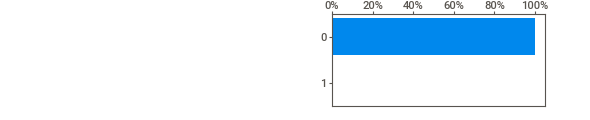
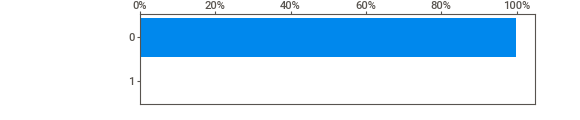
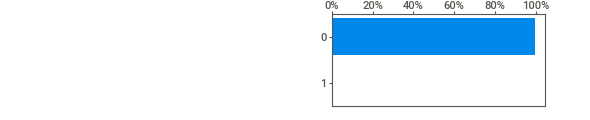
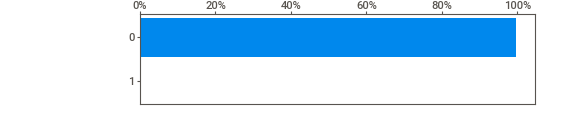
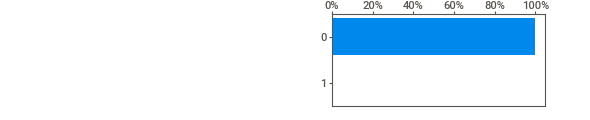
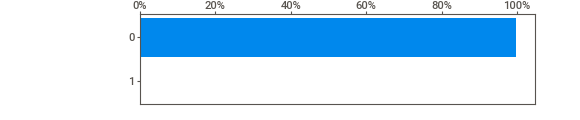
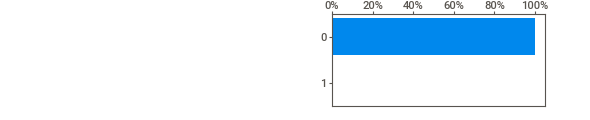
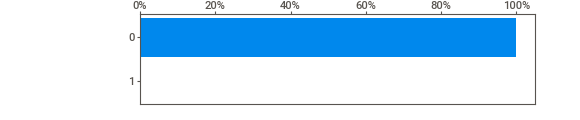
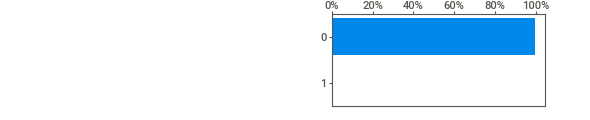
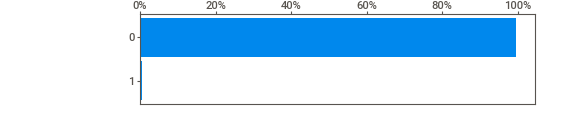
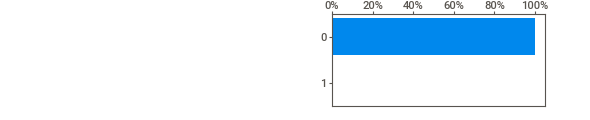
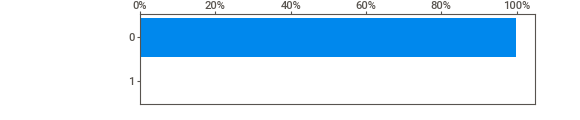
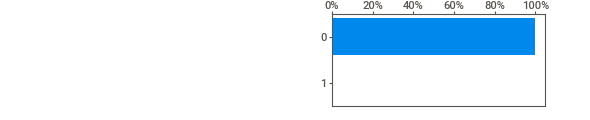
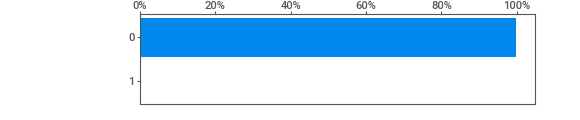
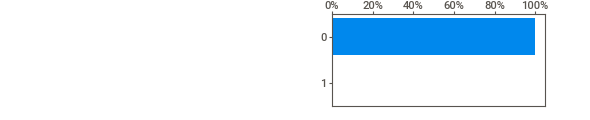
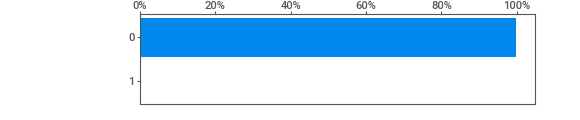
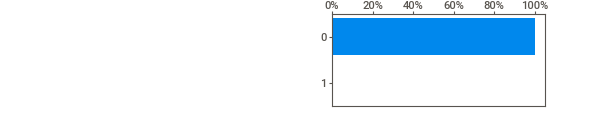
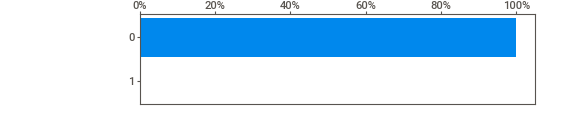
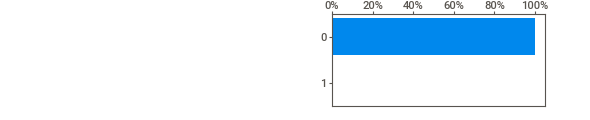
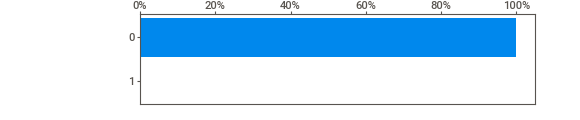
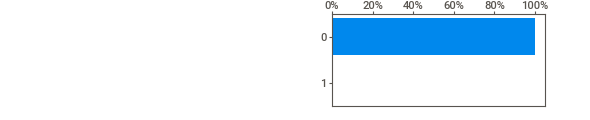
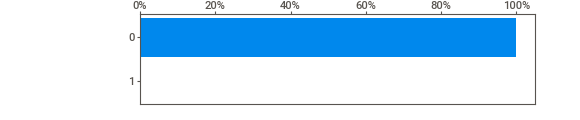
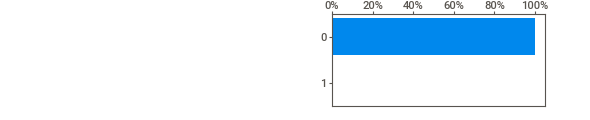
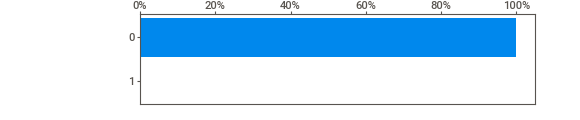
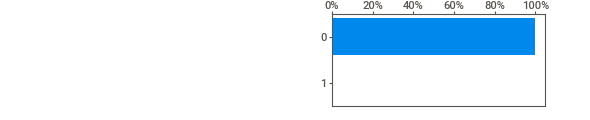
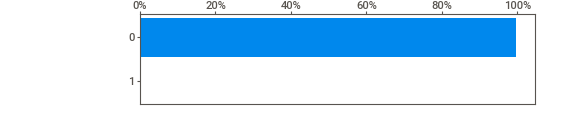
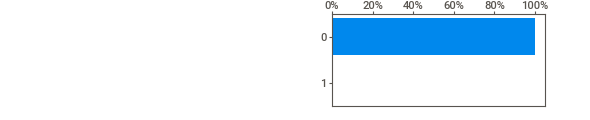
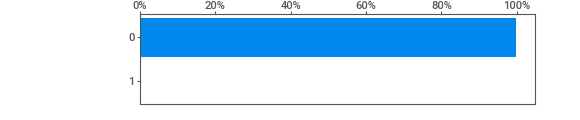
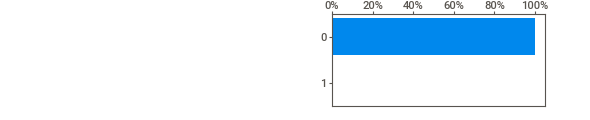
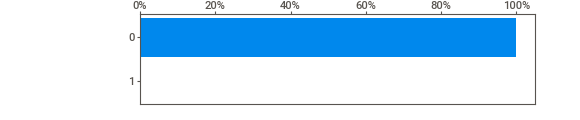
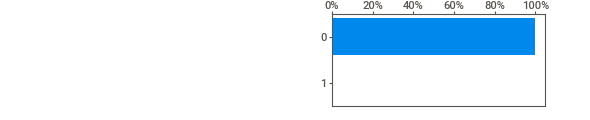
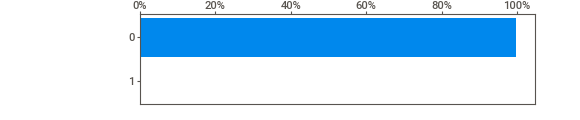
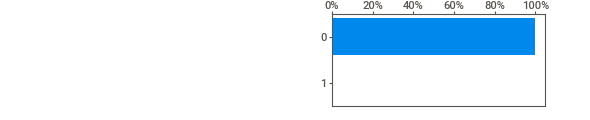
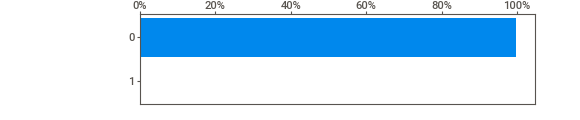
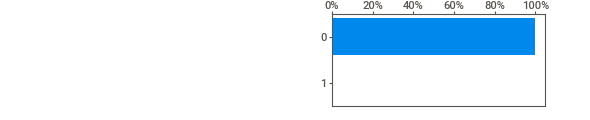
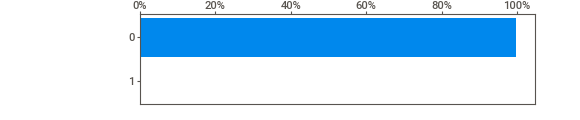
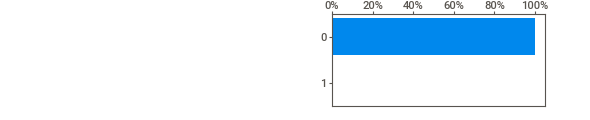
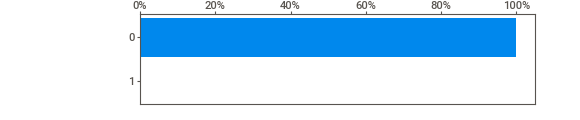
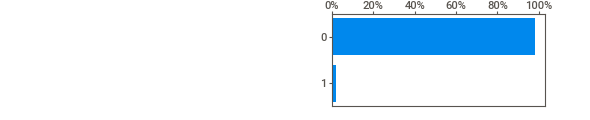
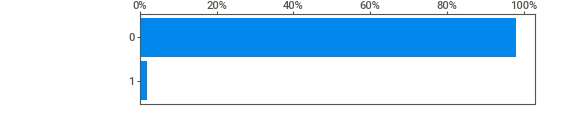
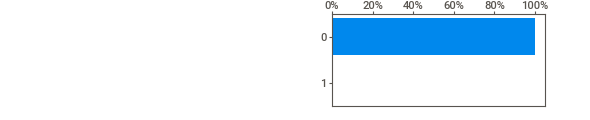
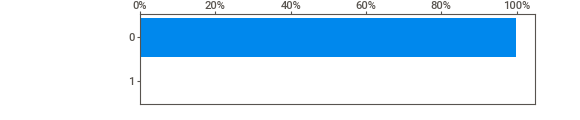
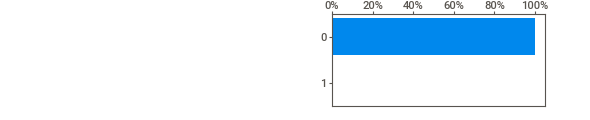
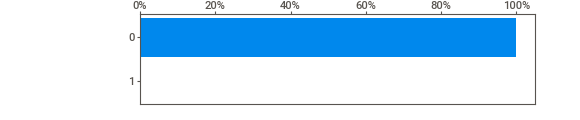
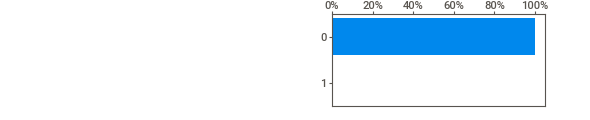
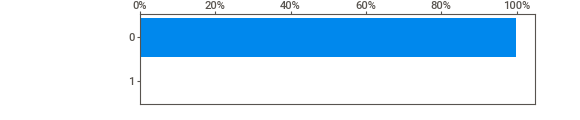
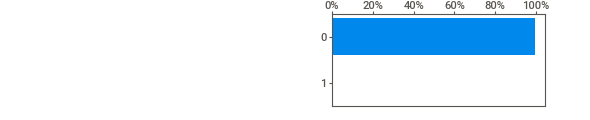
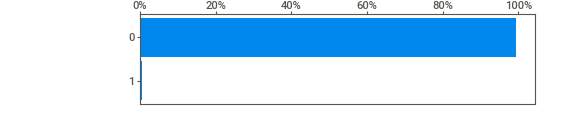
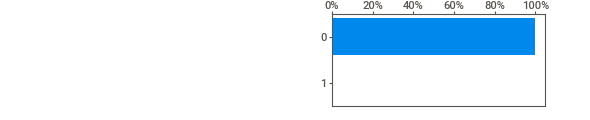
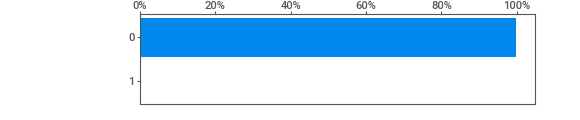
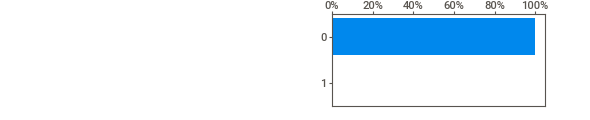
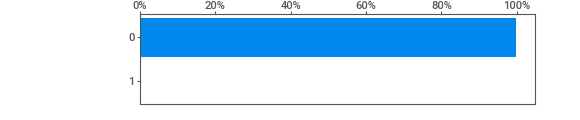
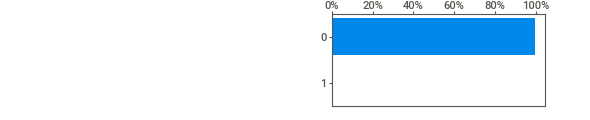
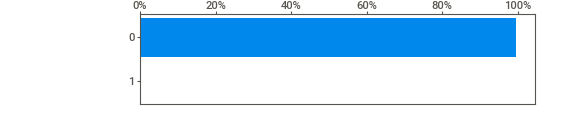
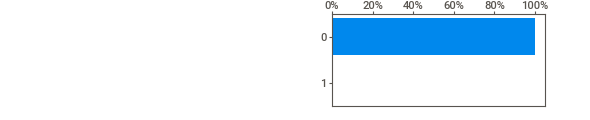
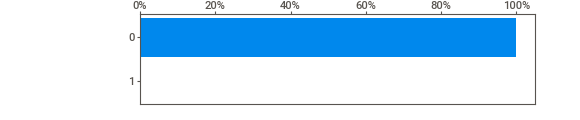
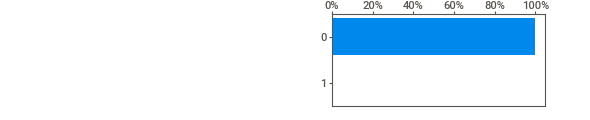
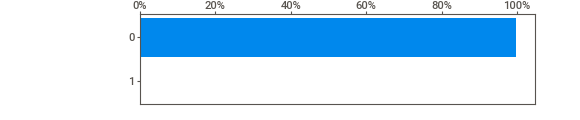
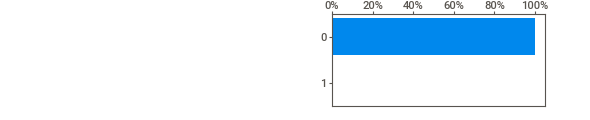
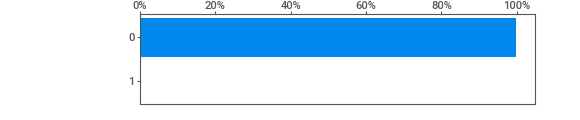
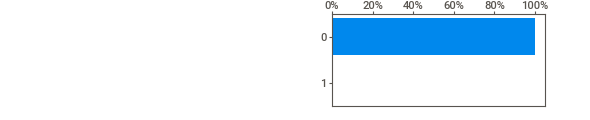
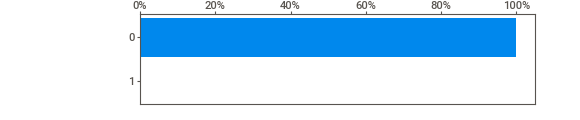
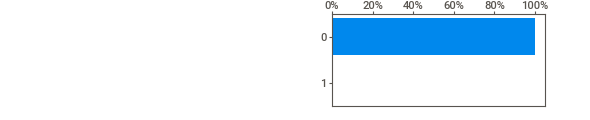
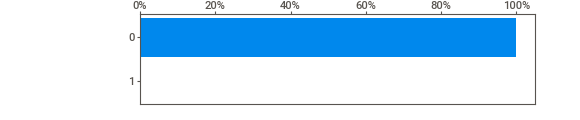
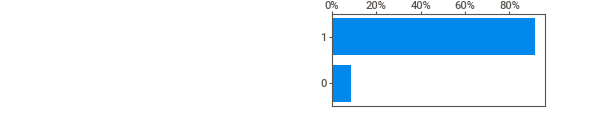
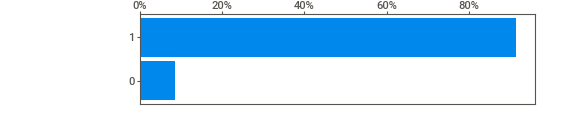
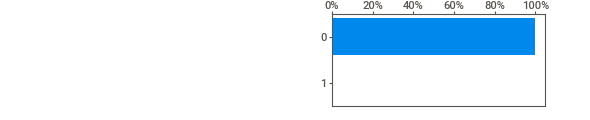
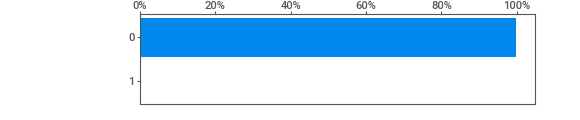
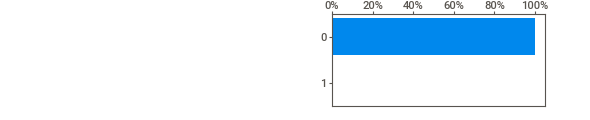
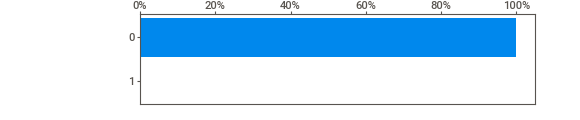
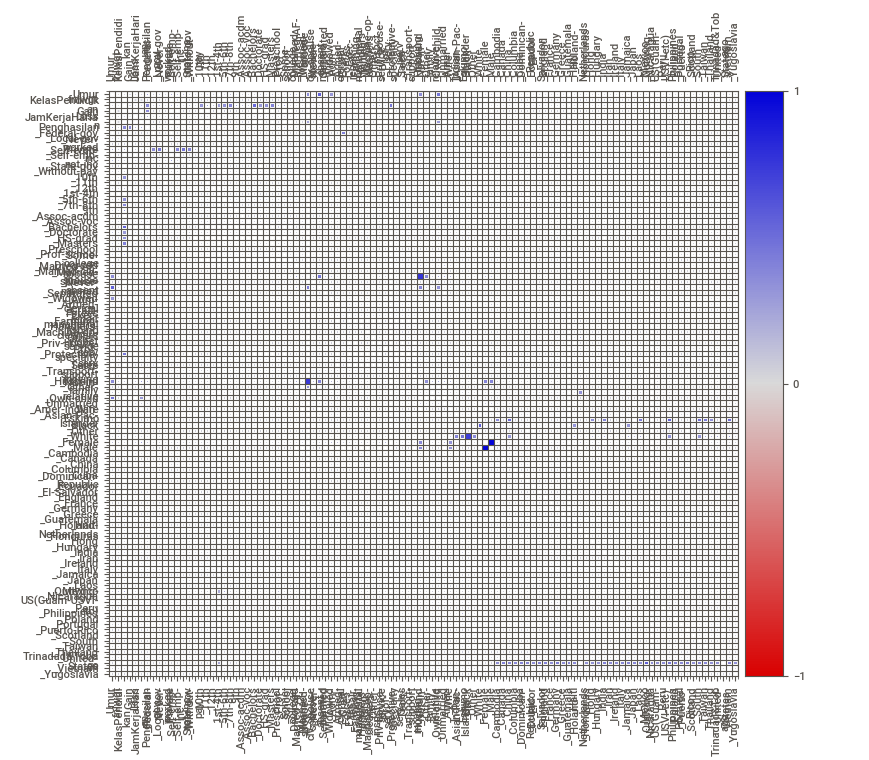
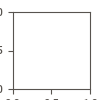

In [ ]:
#report EDA
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([df, 'laporan data penghasilan'])
report.show_notebook()
report

**Laporan Penelaahan Data**

**Tujuan**

Tujuan dari laporan ini adalah untuk memahami karakteristik data dan menemukan pola atau tren yang signifikan.

**Data**

Data yang digunakan adalah data sensus penghasilan di US tahun 1994. Data ini terdiri dari 48.842 observasi dan 14 variabel. Variabel target adalah Apakah Penghasilan <=$50k atau lebih, sedangkan variabel prediktornya adalah Umur, Sektor, fnlwgt, Pendidikan, KelasPendidikan,Status Pekerjaan, Relationship, Ras, Gender, Gain, Loss, JamKerjaHarian, AsalNegara, dan Penghasilan.

**Hasil**

Berdasarkan output yang diberikan, dapat disimpulkan bahwa faktor-faktor yang berpengaruh terhadap penghasilan adalah:

* **Faktor kategorikal:**
    * **Status pernikahan:** orang yang sudah menikah cenderung berpenghasilan lebih tinggi.
    * **Jenis kelamin:** laki-laki cenderung berpenghasilan lebih tinggi.
    * **Status hubungan keluarga:** orang yang memiliki tanggungan keluarga cenderung berpenghasilan lebih tinggi.
    * **Profesi:** orang yang bekerja di sektor jasa, keuangan, dan manufaktur cenderung berpenghasilan lebih tinggi.

* **Faktor numerik:**
    * **Pendidikan:** orang yang memiliki pendidikan tinggi cenderung berpenghasilan lebih tinggi.
    * **Umur:** semakin tua, semakin besar kemungkinan berpenghasilan lebih tinggi.
    * **Jam kerja:** orang yang bekerja di jam kerja yang lebih panjang cenderung berpenghasilan lebih tinggi.

**Kesimpulan**

Berdasarkan hasil eksplorasi data, dapat disimpulkan bahwa faktor-faktor yang berpengaruh terhadap penghasilan adalah:

* **Faktor kategorikal:**
    * **Status pernikahan:** orang yang sudah menikah cenderung berpenghasilan lebih tinggi.
    * **Jenis kelamin:** laki-laki cenderung berpenghasilan lebih tinggi.
    * **Status hubungan keluarga:** orang yang memiliki tanggungan keluarga cenderung berpenghasilan lebih tinggi.
    * **Profesi:** orang yang bekerja di sektor jasa, keuangan, dan manufaktur cenderung berpenghasilan lebih tinggi.

* **Faktor numerik:**
    * **Pendidikan:** orang yang memiliki pendidikan tinggi cenderung berpenghasilan lebih tinggi.
    * **Umur:** semakin tua, semakin besar kemungkinan berpenghasilan lebih tinggi.
    * **Jam kerja:** orang yang bekerja di jam kerja yang lebih panjang cenderung berpenghasilan lebih tinggi.

**Rekomendasi**

Berdasarkan hasil eksplorasi data, dapat dilakukan beberapa rekomendasi, yaitu:

* **Pengembangan model data:** model data dapat dikembangkan untuk memprediksi apakah seseorang akan berpenghasilan lebih dari $50k. Model data ini dapat digunakan untuk berbagai tujuan, seperti:
    * Memberikan saran kepada individu tentang bagaimana meningkatkan penghasilan mereka.
    * Membantu pemerintah untuk menyusun kebijakan yang dapat meningkatkan penghasilan masyarakat.
* **Penelitian lebih lanjut:** penelitian lebih lanjut dapat dilakukan untuk memahami lebih lanjut faktor-faktor yang berpengaruh terhadap penghasilan.

#<h1><strong><font color="blue">Model Klasifikasi</font></strong></h1></center>


In [ ]:
# Loading Data Preprocessed (Belum Lengkap!)
file_ = 'data/adult_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/dellaar/data/main/adult_PreProcessed.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  48546 , Kolom (jumlah variabel) =  106


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Federal-gov  _Local-gov  _Never-worked  ...  _Portugal  _Puerto-Rico  \
0             0           0              0  ...          0             0   
1             0           0              0  ...          0             0   
2             0           0              0  ...          0             0   
3             0           0              0  ...          0             0   
4             0           0              0  ...          0             0   

   _Scotland  _South  _Taiwan  _Thailand  _Trinadad&Tobago  _United-States  \
0          0       0        0          0                 0               1   
1          0       0        0          0                 0               1   
2          0       0        0          0                 0               1   
3          0       0        0          0                 0               1   
4          0       0        0          0                 0               0   

   _Vietnam  _Yugoslavia  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0  

[5 rows x 106 columns]

In [ ]:
predictor = df.loc[:, ~df.columns.isin(['Penghasilan'])]
target = df['Penghasilan']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(33982, 105) (33982,)
(14564, 105) (14564,)


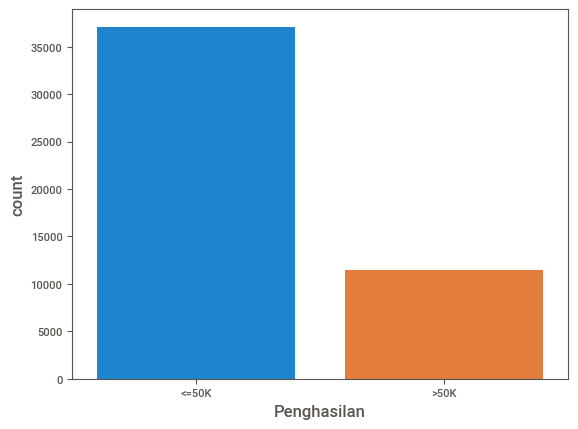

Counter({'<=50K': 37109, '>50K': 11437})
<50k =  76.44090141309273 % 50k =  23.559098586907265 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='Penghasilan')
plt.show()

D = Counter(df['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(df['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(df['Penghasilan'])) ,'%')

##<center><h1><strong><font color="blue">Model Regresi Logistik</font></strong></h1></center>
    


In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[10758   316]
 [ 2607   883]]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     11074
        >50K       0.74      0.25      0.38      3490

    accuracy                           0.80     14564
   macro avg       0.77      0.61      0.63     14564
weighted avg       0.79      0.80      0.76     14564



interpretasi model regresi logistik:
Berdasarkan output yang diberikan, berikut adalah interpretasinya:

1. **Confusion Matrix**:
   - True Negative (TN): 10758, yaitu jumlah individu yang benar-benar memiliki penghasilan <=50K dan diprediksi model juga <=50K.
   - False Positive (FP): 316, yaitu jumlah individu yang sebenarnya memiliki penghasilan <=50K tetapi model memprediksi >50K.
   - False Negative (FN): 2607, yaitu jumlah individu yang sebenarnya memiliki penghasilan >50K tetapi model memprediksi <=50K.
   - True Positive (TP): 883, yaitu jumlah individu yang benar-benar memiliki penghasilan >50K dan model juga memprediksi >50K.

2. **Classification Report**:
   - Precision: Proporsi prediksi positif yang benar. Untuk kelas <=50K, precision adalah 0.80 dan untuk kelas >50K, precision adalah 0.74.
   - Recall: Proporsi positif aktual yang diidentifikasi dengan benar. Untuk kelas <=50K, recall adalah 0.97 dan untuk kelas >50K, recall adalah 0.25.
   - F1-score: Rata-rata harmonik dari precision dan recall. Untuk kelas <=50K, F1-score adalah 0.88 dan untuk kelas >50K, F1-score adalah 0.38.
   - Accuracy: Proporsi prediksi yang benar dari total kasus, dalam hal ini adalah 0.80.

Dari hasil ini, tampak bahwa model lebih baik dalam memprediksi individu dengan penghasilan <=50K dibandingkan dengan individu yang penghasilannya >50K. Hal ini ditunjukkan oleh nilai recall dan F1-score yang lebih tinggi untuk kelas <=50K.

Rekomendasi untuk perusahaan adalah untuk melakukan peningkatan pada model, terutama dalam memprediksi individu dengan penghasilan >50K. Hal ini dapat dilakukan dengan teknik seperti resampling data, menggunakan algoritma lain, atau melakukan penyesuaian pada fitur yang digunakan. Selain itu, perusahaan juga perlu mempertimbangkan trade-off antara precision dan recall tergantung pada tujuan bisnisnya. Misalnya, jika tujuan adalah untuk menargetkan individu dengan penghasilan >50K, maka perusahaan mungkin ingin meningkatkan recall untuk kelas ini.

# <center><font color="blue">Cross Validation</font></center>

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.80 (+/- 0.01), Waktu = 10.206 detik


RegLog    0.792542
dtype: float64

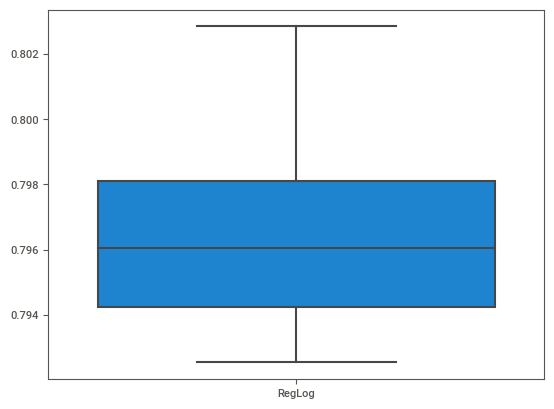

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

##<center><h1><strong><font color="blue">Model Decision Tree</font></strong></h1></center>
    


In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[9730 1344]
 [1244 2246]]
              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.88     11074
        >50K       0.63      0.64      0.63      3490

    accuracy                           0.82     14564
   macro avg       0.76      0.76      0.76     14564
weighted avg       0.82      0.82      0.82     14564



Berdasarkan output yang diberikan, berikut adalah interpretasinya:

1. **Confusion Matrix**:
   - True Negative (TN): 9730, yaitu jumlah individu yang benar-benar memiliki penghasilan <=50K dan diprediksi model juga <=50K.
   - False Positive (FP): 1344, yaitu jumlah individu yang sebenarnya memiliki penghasilan <=50K tetapi model memprediksi >50K.
   - False Negative (FN): 1244, yaitu jumlah individu yang sebenarnya memiliki penghasilan >50K tetapi model memprediksi <=50K.
   - True Positive (TP): 2246, yaitu jumlah individu yang benar-benar memiliki penghasilan >50K dan model juga memprediksi >50K.

2. **Classification Report**:
   - Precision: Proporsi prediksi positif yang benar. Untuk kelas <=50K, precision adalah 0.89 dan untuk kelas >50K, precision adalah 0.63.
   - Recall: Proporsi positif aktual yang diidentifikasi dengan benar. Untuk kelas <=50K, recall adalah 0.88 dan untuk kelas >50K, recall adalah 0.64.
   - F1-score: Rata-rata harmonik dari precision dan recall. Untuk kelas <=50K, F1-score adalah 0.88 dan untuk kelas >50K, F1-score adalah 0.63.
   - Accuracy: Proporsi prediksi yang benar dari total kasus, dalam hal ini adalah 0.82.

Dari hasil ini, tampak bahwa model lebih baik dalam memprediksi individu dengan penghasilan <=50K dibandingkan dengan individu yang penghasilannya >50K. Hal ini ditunjukkan oleh nilai precision, recall, dan F1-score yang lebih tinggi untuk kelas <=50K.

Rekomendasi untuk perusahaan adalah untuk melakukan peningkatan pada model, terutama dalam memprediksi individu dengan penghasilan >50K. Hal ini dapat dilakukan dengan teknik seperti resampling data, menggunakan algoritma lain, atau melakukan penyesuaian pada fitur yang digunakan. Selain itu, perusahaan juga perlu mempertimbangkan trade-off antara precision dan recall tergantung pada tujuan bisnisnya. Misalnya, jika tujuan adalah untuk menargetkan individu dengan penghasilan >50K, maka perusahaan mungkin ingin meningkatkan recall untuk kelas ini.

In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([1.07890153e-01, 1.93274785e-01, 1.05843175e-01, 1.02757417e-01,
       4.01186043e-02, 6.89703118e-02, 4.93111190e-03, 6.81033023e-03,
       0.00000000e+00, 9.06053002e-03, 4.58919366e-03, 9.06249621e-03,
       3.80148435e-03, 0.00000000e+00, 2.63116666e-04, 4.52160146e-04,
       3.03260052e-04, 4.74637079e-06, 2.49961661e-04, 6.74519412e-04,
       4.61917434e-04, 1.90004381e-03, 2.98988834e-03, 8.08246351e-04,
       9.91592901e-04, 6.48392881e-03, 4.67376572e-04, 0.00000000e+00,
       1.10370740e-03, 2.50790175e-03, 2.10918676e-03, 4.60907873e-04,
       1.92977714e-01, 8.74989211e-04, 1.63958709e-03, 1.18085203e-03,
       6.89232391e-04, 4.37651607e-03, 0.00000000e+00, 8.63733060e-03,
       9.56160700e-03, 3.09253574e-03, 3.34531579e-03, 3.64134605e-03,
       4.55112397e-03, 1.06318178e-04, 9.60136965e-03, 3.22523565e-03,
       8.52822377e-03, 4.63335703e-03, 5.49449246e-03, 2.17309144e-03,
       2.03147235e-03, 1.31527633e-03, 1.54211081e-03, 9.15417331e-04,
      

# <center><font color="blue">Cross Validation</font></center>

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.82 (+/- 0.01), Waktu = 8.487 detik


RegLog     0.792542
DecTree    0.808611
dtype: float64

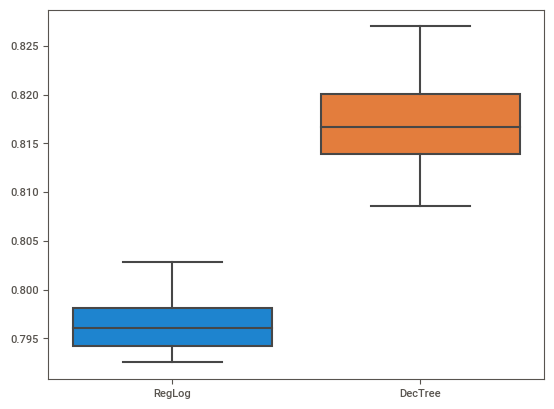

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

## <center><font color="blue">Hyperparameter Optimization</font></center>

In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8493025044892655
{'solver': 'newton-cg'}


In [ ]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8569534092445913
{'max_depth': 9, 'criterion': 'entropy'}


### Model Selection

Accuracy RL: 0.85 (+/- 0.00)
Accuracy DT: 0.86 (+/- 0.00)


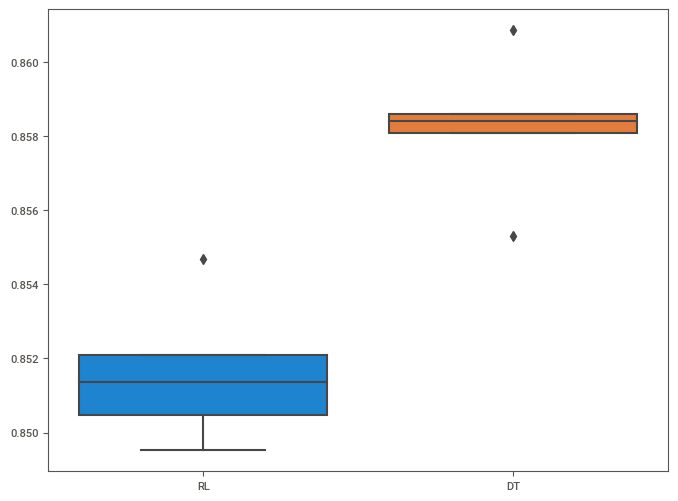

In [ ]:
kCV = 5
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)